<a href="https://colab.research.google.com/github/trndnhan/UTI-Analysis-and-Binary-Classification/blob/main/notebooks/5_Modeling_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries & data import

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
pip install vapeplot

  Preparing metadata (setup.py) ... done
  Created wheel for vapeplot: filename=vapeplot-0.0.8-py3-none-any.whl size=11012 sha256=863911bcc1967db8cebdbf0e45fe818ffcfdecc982f6fb4ce034c690db069cfc
  Stored in directory: /root/.cache/pip/wheels/aa/ee/f8/9c3f6e025c82c4621a7e962d57d3a51f8d557a9b3b6b3f84ba
Successfully built vapeplot


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from torch.utils.data import DataLoader, TensorDataset
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import vapeplot
%matplotlib inline
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
vapeplot.set_palette('mallsoft')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Work/Data/transformed_urinalysis_tests.csv')
df

,Age,WBC,RBC,Gender,Color,Transparency,Glucose,Protein,pH,Specific_Gravity,Epithelial_Cells,Mucous_Threads,Amorphous_Urates,Bacteria,Diagnosis
0,1.358974,0.166667,0.0,0,4,0,4,4,0,1,4,6,3,4,0
1,-0.358974,0.166667,0.0,1,2,3,4,0,0,5,6,0,0,2,0
2,-0.282051,0.000000,0.0,1,4,3,4,5,0,5,6,0,2,6,0
3,1.384615,1.666667,298.0,1,1,1,4,0,1,3,6,6,3,0,0
4,0.153846,0.333333,0.0,0,9,2,4,5,1,4,6,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.576923,0.000000,-1.0,1,9,0,4,4,1,2,6,0,3,6,0
1431,0.487179,-0.166667,0.0,1,9,0,4,4,2,1,6,3,3,6,0
1432,0.615385,0.500000,0.0,0,2,0,4,5,1,5,2,2,3,6,0
1433,0.871795,-0.166667,0.0,0,2,0,4,5,0,5,5,5,3,0,0


In [ ]:
x = df.loc[:, df.columns != 'Diagnosis']
y = df['Diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
x_train, y_train = pipeline.fit_resample(x_train, y_train)

# CatBoost

In [ ]:
CBmodel = CatBoostClassifier()
CBmodel.fit(x_train, y_train)

y_pred_train = CBmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = CBmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

Learning rate set to 0.006367
0:	learn: 0.6867903	total: 48ms	remaining: 48s
1:	learn: 0.6823751	total: 49.1ms	remaining: 24.5s
2:	learn: 0.6768174	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6712484	total: 52.3ms	remaining: 13s
4:	learn: 0.6677408	total: 53.7ms	remaining: 10.7s
5:	learn: 0.6631729	total: 55.1ms	remaining: 9.13s
6:	learn: 0.6585000	total: 56.6ms	remaining: 8.02s
7:	learn: 0.6535239	total: 57.5ms	remaining: 7.13s
8:	learn: 0.6498312	total: 58.8ms	remaining: 6.48s
9:	learn: 0.6459219	total: 60.2ms	remaining: 5.96s
10:	learn: 0.6416618	total: 61.4ms	remaining: 5.52s
11:	learn: 0.6378709	total: 62.4ms	remaining: 5.14s
12:	learn: 0.6328222	total: 64.5ms	remaining: 4.89s
13:	learn: 0.6294742	total: 66.7ms	remaining: 4.69s
14:	learn: 0.6252764	total: 68ms	remaining: 4.46s
15:	learn: 0.6213017	total: 69.1ms	remaining: 4.25s
16:	learn: 0.6177261	total: 71.5ms	remaining: 4.13s
17:	learn: 0.6134488	total: 73.4ms	remaining: 4s
18:	learn: 0.6102375	total: 74ms	remaining: 3.82s
19:	l

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 10, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_state': 42
    }

    model = CatBoostClassifier(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 14:09:44,766] A new study created in memory with name: no-name-318b3a7c-628b-4478-b144-f28ee86d87e3


0:	learn: 0.5698794	total: 52.5ms	remaining: 39.7s
1:	learn: 0.4963538	total: 56.2ms	remaining: 21.3s
2:	learn: 0.4513241	total: 61.8ms	remaining: 15.6s
3:	learn: 0.4071806	total: 67.3ms	remaining: 12.7s
4:	learn: 0.3663859	total: 73.9ms	remaining: 11.1s
5:	learn: 0.3538650	total: 76.7ms	remaining: 9.61s
6:	learn: 0.3169742	total: 80.9ms	remaining: 8.68s
7:	learn: 0.2855552	total: 93.5ms	remaining: 8.77s
8:	learn: 0.2533782	total: 99.5ms	remaining: 8.28s
9:	learn: 0.2228901	total: 104ms	remaining: 7.82s
10:	learn: 0.2127994	total: 110ms	remaining: 7.44s
11:	learn: 0.2016943	total: 116ms	remaining: 7.24s
12:	learn: 0.1892464	total: 122ms	remaining: 7.02s
13:	learn: 0.1746671	total: 128ms	remaining: 6.81s
14:	learn: 0.1610169	total: 133ms	remaining: 6.6s
15:	learn: 0.1541655	total: 139ms	remaining: 6.42s
16:	learn: 0.1395971	total: 144ms	remaining: 6.26s
17:	learn: 0.1302780	total: 149ms	remaining: 6.13s
18:	learn: 0.1251551	total: 154ms	remaining: 6s
19:	learn: 0.1168106	total: 160ms	re

[I 2024-04-09 14:09:47,385] Trial 0 finished with value: 0.9163763066202091 and parameters: {'iterations': 758, 'depth': 8, 'learning_rate': 0.05361840656264868, 'l2_leaf_reg': 0.023187519872402546, 'border_count': 144}. Best is trial 0 with value: 0.9163763066202091.
[I 2024-04-09 14:09:47,546] Trial 1 finished with value: 0.9128919860627178 and parameters: {'iterations': 119, 'depth': 6, 'learning_rate': 0.1363435199857345, 'l2_leaf_reg': 0.049064961631343926, 'border_count': 243}. Best is trial 0 with value: 0.9163763066202091.


0:	learn: 0.6094021	total: 681us	remaining: 80.4ms
1:	learn: 0.5553978	total: 1.85ms	remaining: 108ms
2:	learn: 0.5054724	total: 3.45ms	remaining: 133ms
3:	learn: 0.4728116	total: 4.25ms	remaining: 122ms
4:	learn: 0.4384699	total: 5.07ms	remaining: 116ms
5:	learn: 0.4065827	total: 6.24ms	remaining: 118ms
6:	learn: 0.3865921	total: 7.04ms	remaining: 113ms
7:	learn: 0.3645945	total: 7.89ms	remaining: 109ms
8:	learn: 0.3418614	total: 8.69ms	remaining: 106ms
9:	learn: 0.3250386	total: 9.59ms	remaining: 105ms
10:	learn: 0.3095970	total: 10.4ms	remaining: 102ms
11:	learn: 0.2982885	total: 11.2ms	remaining: 100ms
12:	learn: 0.2899217	total: 12.1ms	remaining: 98.3ms
13:	learn: 0.2799459	total: 12.8ms	remaining: 96.1ms
14:	learn: 0.2700210	total: 13.7ms	remaining: 94.7ms
15:	learn: 0.2578235	total: 14.4ms	remaining: 92.9ms
16:	learn: 0.2477094	total: 15.2ms	remaining: 91.2ms
17:	learn: 0.2408839	total: 16ms	remaining: 89.5ms
18:	learn: 0.2301898	total: 16.8ms	remaining: 88.2ms
19:	learn: 0.2222

[I 2024-04-09 14:09:51,386] Trial 2 finished with value: 0.9303135888501742 and parameters: {'iterations': 427, 'depth': 10, 'learning_rate': 0.05566213742356802, 'l2_leaf_reg': 0.16913685934765718, 'border_count': 163}. Best is trial 2 with value: 0.9303135888501742.


414:	learn: 0.0006998	total: 3.33s	remaining: 96.2ms
415:	learn: 0.0006998	total: 3.34s	remaining: 88.3ms
416:	learn: 0.0006998	total: 3.35s	remaining: 80.2ms
417:	learn: 0.0006998	total: 3.35s	remaining: 72.2ms
418:	learn: 0.0006997	total: 3.36s	remaining: 64.2ms
419:	learn: 0.0006997	total: 3.37s	remaining: 56.1ms
420:	learn: 0.0006996	total: 3.38s	remaining: 48.2ms
421:	learn: 0.0006996	total: 3.39s	remaining: 40.2ms
422:	learn: 0.0006996	total: 3.4s	remaining: 32.1ms
423:	learn: 0.0006996	total: 3.4s	remaining: 24.1ms
424:	learn: 0.0006996	total: 3.4s	remaining: 16ms
425:	learn: 0.0006996	total: 3.41s	remaining: 8.01ms
426:	learn: 0.0006996	total: 3.43s	remaining: 0us
0:	learn: 0.6746702	total: 775us	remaining: 648ms
1:	learn: 0.6574304	total: 1.48ms	remaining: 615ms
2:	learn: 0.6423960	total: 2.13ms	remaining: 593ms
3:	learn: 0.6269226	total: 2.76ms	remaining: 574ms
4:	learn: 0.6103286	total: 3.4ms	remaining: 565ms
5:	learn: 0.5944922	total: 4.08ms	remaining: 564ms
6:	learn: 0.580

[I 2024-04-09 14:09:53,150] Trial 3 finished with value: 0.9233449477351916 and parameters: {'iterations': 836, 'depth': 4, 'learning_rate': 0.025340005502288578, 'l2_leaf_reg': 1.0399648325127835, 'border_count': 72}. Best is trial 2 with value: 0.9303135888501742.


810:	learn: 0.0215828	total: 1.27s	remaining: 39.3ms
811:	learn: 0.0215554	total: 1.28s	remaining: 37.7ms
812:	learn: 0.0214740	total: 1.28s	remaining: 36.1ms
813:	learn: 0.0214268	total: 1.28s	remaining: 34.5ms
814:	learn: 0.0213950	total: 1.28s	remaining: 32.9ms
815:	learn: 0.0213487	total: 1.28s	remaining: 31.4ms
816:	learn: 0.0212991	total: 1.28s	remaining: 29.9ms
817:	learn: 0.0212220	total: 1.29s	remaining: 28.4ms
818:	learn: 0.0211564	total: 1.29s	remaining: 26.8ms
819:	learn: 0.0211107	total: 1.3s	remaining: 25.3ms
820:	learn: 0.0210676	total: 1.3s	remaining: 23.7ms
821:	learn: 0.0210384	total: 1.3s	remaining: 22.2ms
822:	learn: 0.0209994	total: 1.3s	remaining: 20.6ms
823:	learn: 0.0209674	total: 1.31s	remaining: 19ms
824:	learn: 0.0209353	total: 1.31s	remaining: 17.5ms
825:	learn: 0.0209140	total: 1.31s	remaining: 15.9ms
826:	learn: 0.0208631	total: 1.32s	remaining: 14.3ms
827:	learn: 0.0207870	total: 1.32s	remaining: 12.7ms
828:	learn: 0.0207425	total: 1.32s	remaining: 11.1ms

[I 2024-04-09 14:09:55,510] Trial 4 finished with value: 0.9094076655052264 and parameters: {'iterations': 249, 'depth': 8, 'learning_rate': 0.21533184283840442, 'l2_leaf_reg': 0.1871064337365789, 'border_count': 131}. Best is trial 2 with value: 0.9303135888501742.


235:	learn: 0.0007919	total: 1.66s	remaining: 91.7ms
236:	learn: 0.0007919	total: 1.68s	remaining: 85.2ms
237:	learn: 0.0007919	total: 1.69s	remaining: 78.1ms
238:	learn: 0.0007918	total: 1.71s	remaining: 71.4ms
239:	learn: 0.0007919	total: 1.71s	remaining: 64.2ms
240:	learn: 0.0007918	total: 1.72s	remaining: 57.1ms
241:	learn: 0.0007919	total: 1.72s	remaining: 49.9ms
242:	learn: 0.0007780	total: 1.73s	remaining: 42.7ms
243:	learn: 0.0007612	total: 1.74s	remaining: 35.6ms
244:	learn: 0.0007613	total: 1.75s	remaining: 28.5ms
245:	learn: 0.0007612	total: 1.75s	remaining: 21.4ms
246:	learn: 0.0007612	total: 1.75s	remaining: 14.2ms
247:	learn: 0.0007612	total: 1.76s	remaining: 7.1ms
248:	learn: 0.0007611	total: 1.77s	remaining: 0us
0:	learn: 0.6596605	total: 4.2ms	remaining: 3.71s
1:	learn: 0.6310087	total: 8.36ms	remaining: 3.7s
2:	learn: 0.6198109	total: 8.99ms	remaining: 2.65s
3:	learn: 0.6036127	total: 13.8ms	remaining: 3.04s
4:	learn: 0.5808563	total: 20.3ms	remaining: 3.58s
5:	learn:

[I 2024-04-09 14:10:00,183] Trial 5 finished with value: 0.926829268292683 and parameters: {'iterations': 886, 'depth': 10, 'learning_rate': 0.018265642268356405, 'l2_leaf_reg': 0.2102882650893919, 'border_count': 90}. Best is trial 2 with value: 0.9303135888501742.


0:	learn: 0.3515793	total: 15.2ms	remaining: 10.8s
1:	learn: 0.2234285	total: 31ms	remaining: 11s
2:	learn: 0.1571204	total: 46.8ms	remaining: 11.1s
3:	learn: 0.1006460	total: 61ms	remaining: 10.8s
4:	learn: 0.0656126	total: 74.4ms	remaining: 10.5s
5:	learn: 0.0441254	total: 93.7ms	remaining: 11s
6:	learn: 0.0393672	total: 95.7ms	remaining: 9.64s
7:	learn: 0.0296843	total: 111ms	remaining: 9.79s
8:	learn: 0.0239411	total: 135ms	remaining: 10.6s
9:	learn: 0.0169125	total: 150ms	remaining: 10.5s
10:	learn: 0.0143733	total: 157ms	remaining: 9.98s
11:	learn: 0.0102534	total: 169ms	remaining: 9.86s
12:	learn: 0.0078125	total: 184ms	remaining: 9.89s
13:	learn: 0.0061168	total: 214ms	remaining: 10.7s
14:	learn: 0.0047488	total: 225ms	remaining: 10.5s
15:	learn: 0.0038506	total: 237ms	remaining: 10.3s
16:	learn: 0.0035114	total: 248ms	remaining: 10.1s
17:	learn: 0.0028475	total: 268ms	remaining: 10.3s
18:	learn: 0.0023510	total: 295ms	remaining: 10.8s
19:	learn: 0.0020176	total: 329ms	remainin

[I 2024-04-09 14:10:06,916] Trial 6 finished with value: 0.8989547038327527 and parameters: {'iterations': 712, 'depth': 10, 'learning_rate': 0.15555647969065117, 'l2_leaf_reg': 0.00290660908894915, 'border_count': 187}. Best is trial 2 with value: 0.9303135888501742.


0:	learn: 0.4895206	total: 1.25ms	remaining: 593ms
1:	learn: 0.4238767	total: 5.72ms	remaining: 1.35s
2:	learn: 0.3643286	total: 8.65ms	remaining: 1.36s
3:	learn: 0.3234703	total: 15.9ms	remaining: 1.87s
4:	learn: 0.2685632	total: 17.2ms	remaining: 1.61s
5:	learn: 0.2542264	total: 21.7ms	remaining: 1.69s
6:	learn: 0.2202172	total: 26.1ms	remaining: 1.74s
7:	learn: 0.2024299	total: 28.4ms	remaining: 1.65s
8:	learn: 0.1906770	total: 30.5ms	remaining: 1.58s
9:	learn: 0.1696457	total: 32.6ms	remaining: 1.51s
10:	learn: 0.1541502	total: 34.6ms	remaining: 1.46s
11:	learn: 0.1449213	total: 37.4ms	remaining: 1.44s
12:	learn: 0.1348409	total: 39ms	remaining: 1.38s
13:	learn: 0.1254726	total: 41.1ms	remaining: 1.35s
14:	learn: 0.1208503	total: 43.1ms	remaining: 1.32s
15:	learn: 0.1142928	total: 46ms	remaining: 1.31s
16:	learn: 0.1096610	total: 49.1ms	remaining: 1.32s
17:	learn: 0.1035903	total: 50.9ms	remaining: 1.29s
18:	learn: 0.0966381	total: 53.5ms	remaining: 1.28s
19:	learn: 0.0939178	total

[I 2024-04-09 14:10:08,436] Trial 7 finished with value: 0.9059233449477352 and parameters: {'iterations': 474, 'depth': 5, 'learning_rate': 0.16193329449889132, 'l2_leaf_reg': 0.0029979774306779666, 'border_count': 198}. Best is trial 2 with value: 0.9303135888501742.


473:	learn: 0.0001715	total: 1.15s	remaining: 0us
0:	learn: 0.6333650	total: 1.56ms	remaining: 238ms
1:	learn: 0.5872790	total: 6.07ms	remaining: 459ms
2:	learn: 0.5526214	total: 8.3ms	remaining: 415ms
3:	learn: 0.5217204	total: 14.7ms	remaining: 547ms
4:	learn: 0.4908253	total: 16.3ms	remaining: 482ms
5:	learn: 0.4613565	total: 18.9ms	remaining: 464ms
6:	learn: 0.4356486	total: 21.6ms	remaining: 451ms
7:	learn: 0.4134008	total: 24.5ms	remaining: 443ms
8:	learn: 0.3944144	total: 27.1ms	remaining: 434ms
9:	learn: 0.3785010	total: 30.3ms	remaining: 433ms
10:	learn: 0.3664406	total: 33ms	remaining: 426ms
11:	learn: 0.3503120	total: 34.9ms	remaining: 410ms
12:	learn: 0.3363558	total: 38.7ms	remaining: 417ms
13:	learn: 0.3245036	total: 41.1ms	remaining: 408ms
14:	learn: 0.3128292	total: 44ms	remaining: 405ms
15:	learn: 0.3011373	total: 45.8ms	remaining: 392ms
16:	learn: 0.2900691	total: 48.6ms	remaining: 389ms
17:	learn: 0.2811767	total: 54ms	remaining: 405ms
18:	learn: 0.2721889	total: 56.

[I 2024-04-09 14:10:09,160] Trial 8 finished with value: 0.9303135888501742 and parameters: {'iterations': 153, 'depth': 7, 'learning_rate': 0.09398180399337538, 'l2_leaf_reg': 0.1653203057951415, 'border_count': 163}. Best is trial 2 with value: 0.9303135888501742.


127:	learn: 0.0288701	total: 402ms	remaining: 78.4ms
128:	learn: 0.0283214	total: 407ms	remaining: 75.6ms
129:	learn: 0.0277905	total: 411ms	remaining: 72.7ms
130:	learn: 0.0273537	total: 417ms	remaining: 70.1ms
131:	learn: 0.0268398	total: 421ms	remaining: 67ms
132:	learn: 0.0263851	total: 426ms	remaining: 64.1ms
133:	learn: 0.0261703	total: 431ms	remaining: 61.1ms
134:	learn: 0.0257422	total: 437ms	remaining: 58.2ms
135:	learn: 0.0253414	total: 442ms	remaining: 55.2ms
136:	learn: 0.0250649	total: 447ms	remaining: 52.2ms
137:	learn: 0.0247149	total: 452ms	remaining: 49.1ms
138:	learn: 0.0242141	total: 458ms	remaining: 46.2ms
139:	learn: 0.0238601	total: 461ms	remaining: 42.8ms
140:	learn: 0.0235170	total: 465ms	remaining: 39.6ms
141:	learn: 0.0232055	total: 467ms	remaining: 36.2ms
142:	learn: 0.0228926	total: 470ms	remaining: 32.9ms
143:	learn: 0.0226893	total: 472ms	remaining: 29.5ms
144:	learn: 0.0223515	total: 475ms	remaining: 26.2ms
145:	learn: 0.0221426	total: 479ms	remaining: 23

[I 2024-04-09 14:10:13,494] Trial 9 finished with value: 0.9198606271777003 and parameters: {'iterations': 955, 'depth': 9, 'learning_rate': 0.030226447972366823, 'l2_leaf_reg': 0.4681049053478528, 'border_count': 72}. Best is trial 2 with value: 0.9303135888501742.


945:	learn: 0.0010444	total: 3.71s	remaining: 35.3ms
946:	learn: 0.0010430	total: 3.71s	remaining: 31.4ms
947:	learn: 0.0010430	total: 3.71s	remaining: 27.4ms
948:	learn: 0.0010411	total: 3.72s	remaining: 23.5ms
949:	learn: 0.0010394	total: 3.72s	remaining: 19.6ms
950:	learn: 0.0010394	total: 3.72s	remaining: 15.7ms
951:	learn: 0.0010377	total: 3.73s	remaining: 11.7ms
952:	learn: 0.0010360	total: 3.73s	remaining: 7.82ms
953:	learn: 0.0010360	total: 3.73s	remaining: 3.91ms
954:	learn: 0.0010360	total: 3.73s	remaining: 0us
0:	learn: 0.6831199	total: 3.06ms	remaining: 1.28s
1:	learn: 0.6730804	total: 7.99ms	remaining: 1.66s
2:	learn: 0.6656393	total: 11ms	remaining: 1.51s
3:	learn: 0.6580304	total: 13.9ms	remaining: 1.44s
4:	learn: 0.6498555	total: 16.8ms	remaining: 1.39s
5:	learn: 0.6414917	total: 19.7ms	remaining: 1.35s
6:	learn: 0.6331298	total: 22.5ms	remaining: 1.32s
7:	learn: 0.6256843	total: 23.3ms	remaining: 1.19s
8:	learn: 0.6192077	total: 26.1ms	remaining: 1.19s
9:	learn: 0.6114

[I 2024-04-09 14:10:14,875] Trial 10 finished with value: 0.9303135888501742 and parameters: {'iterations': 418, 'depth': 9, 'learning_rate': 0.011051655854890208, 'l2_leaf_reg': 3.81552929822131, 'border_count': 249}. Best is trial 2 with value: 0.9303135888501742.
[I 2024-04-09 14:10:15,026] Trial 11 finished with value: 0.9337979094076655 and parameters: {'iterations': 73, 'depth': 7, 'learning_rate': 0.07778309797241234, 'l2_leaf_reg': 0.023172419227345517, 'border_count': 155}. Best is trial 11 with value: 0.9337979094076655.
[I 2024-04-09 14:10:15,103] Trial 12 finished with value: 0.9337979094076655 and parameters: {'iterations': 16, 'depth': 7, 'learning_rate': 0.05650476660311635, 'l2_leaf_reg': 0.019848629073567527, 'border_count': 120}. Best is trial 11 with value: 0.9337979094076655.


0:	learn: 0.6381832	total: 939us	remaining: 67.6ms
1:	learn: 0.6019864	total: 2.42ms	remaining: 85.7ms
2:	learn: 0.5692841	total: 3.52ms	remaining: 82.1ms
3:	learn: 0.5398779	total: 4.62ms	remaining: 79.7ms
4:	learn: 0.5100744	total: 5.71ms	remaining: 77.7ms
5:	learn: 0.4792695	total: 6.82ms	remaining: 76.1ms
6:	learn: 0.4530296	total: 7.98ms	remaining: 75.2ms
7:	learn: 0.4308413	total: 9.03ms	remaining: 73.4ms
8:	learn: 0.4116441	total: 10.4ms	remaining: 73.7ms
9:	learn: 0.3962546	total: 11.4ms	remaining: 71.9ms
10:	learn: 0.3792090	total: 13.2ms	remaining: 74.5ms
11:	learn: 0.3651938	total: 14.2ms	remaining: 72.4ms
12:	learn: 0.3518369	total: 15.3ms	remaining: 70.6ms
13:	learn: 0.3388026	total: 16.4ms	remaining: 68.9ms
14:	learn: 0.3275385	total: 17.4ms	remaining: 67.4ms
15:	learn: 0.3150560	total: 18.8ms	remaining: 66.9ms
16:	learn: 0.3029885	total: 20.1ms	remaining: 66.3ms
17:	learn: 0.2960009	total: 21.1ms	remaining: 64.6ms
18:	learn: 0.2862043	total: 22.2ms	remaining: 63.2ms
19:	

[I 2024-04-09 14:10:15,197] Trial 13 finished with value: 0.9407665505226481 and parameters: {'iterations': 29, 'depth': 6, 'learning_rate': 0.07722884737017087, 'l2_leaf_reg': 0.01130275624730387, 'border_count': 108}. Best is trial 13 with value: 0.9407665505226481.


0:	learn: 0.6433460	total: 1.22ms	remaining: 34.3ms
1:	learn: 0.6076295	total: 5.68ms	remaining: 76.7ms
2:	learn: 0.5733051	total: 7.01ms	remaining: 60.7ms
3:	learn: 0.5475067	total: 8.41ms	remaining: 52.6ms
4:	learn: 0.5203065	total: 8.99ms	remaining: 43.2ms
5:	learn: 0.4966431	total: 9.56ms	remaining: 36.7ms
6:	learn: 0.4767894	total: 10.3ms	remaining: 32.4ms
7:	learn: 0.4558099	total: 11.1ms	remaining: 29.1ms
8:	learn: 0.4341101	total: 11.8ms	remaining: 26.3ms
9:	learn: 0.4155910	total: 12.6ms	remaining: 23.9ms
10:	learn: 0.4023354	total: 13.5ms	remaining: 22.2ms
11:	learn: 0.3939732	total: 14.2ms	remaining: 20.2ms
12:	learn: 0.3851289	total: 14.9ms	remaining: 18.3ms
13:	learn: 0.3695188	total: 15.7ms	remaining: 16.8ms
14:	learn: 0.3608084	total: 17.9ms	remaining: 16.7ms
15:	learn: 0.3503758	total: 18.4ms	remaining: 15ms
16:	learn: 0.3386890	total: 19.2ms	remaining: 13.6ms
17:	learn: 0.3312347	total: 20ms	remaining: 12.2ms
18:	learn: 0.3191380	total: 20.8ms	remaining: 11ms
19:	learn

[I 2024-04-09 14:10:15,599] Trial 14 finished with value: 0.9128919860627178 and parameters: {'iterations': 246, 'depth': 6, 'learning_rate': 0.07966355969913134, 'l2_leaf_reg': 0.006961757209863501, 'border_count': 101}. Best is trial 13 with value: 0.9407665505226481.
[I 2024-04-09 14:10:15,686] Trial 15 finished with value: 0.9407665505226481 and parameters: {'iterations': 36, 'depth': 6, 'learning_rate': 0.0901997054064133, 'l2_leaf_reg': 0.00951742426166634, 'border_count': 47}. Best is trial 13 with value: 0.9407665505226481.


235:	learn: 0.0002606	total: 289ms	remaining: 12.3ms
236:	learn: 0.0002606	total: 294ms	remaining: 11.2ms
237:	learn: 0.0002606	total: 295ms	remaining: 9.91ms
238:	learn: 0.0002606	total: 298ms	remaining: 8.72ms
239:	learn: 0.0002606	total: 299ms	remaining: 7.47ms
240:	learn: 0.0002606	total: 300ms	remaining: 6.22ms
241:	learn: 0.0002606	total: 301ms	remaining: 4.98ms
242:	learn: 0.0002590	total: 304ms	remaining: 3.75ms
243:	learn: 0.0002590	total: 305ms	remaining: 2.5ms
244:	learn: 0.0002590	total: 306ms	remaining: 1.25ms
245:	learn: 0.0002590	total: 307ms	remaining: 0us
0:	learn: 0.6385683	total: 616us	remaining: 21.6ms
1:	learn: 0.5937332	total: 1.23ms	remaining: 20.9ms
2:	learn: 0.5587132	total: 1.89ms	remaining: 20.8ms
3:	learn: 0.5255667	total: 2.73ms	remaining: 21.9ms
4:	learn: 0.4959537	total: 3.35ms	remaining: 20.8ms
5:	learn: 0.4692857	total: 4.09ms	remaining: 20.5ms
6:	learn: 0.4489559	total: 4.82ms	remaining: 20ms
7:	learn: 0.4296147	total: 5.51ms	remaining: 19.3ms
8:	learn

[I 2024-04-09 14:10:16,403] Trial 16 finished with value: 0.9198606271777003 and parameters: {'iterations': 606, 'depth': 5, 'learning_rate': 0.2867849292840003, 'l2_leaf_reg': 0.001473758033769792, 'border_count': 33}. Best is trial 13 with value: 0.9407665505226481.


0:	learn: 0.6436940	total: 964us	remaining: 267ms
1:	learn: 0.5975786	total: 1.78ms	remaining: 246ms
2:	learn: 0.5686570	total: 2.85ms	remaining: 261ms
3:	learn: 0.5363965	total: 4.19ms	remaining: 287ms
4:	learn: 0.5080719	total: 5.28ms	remaining: 288ms
5:	learn: 0.4717272	total: 6.31ms	remaining: 286ms
6:	learn: 0.4388319	total: 7.97ms	remaining: 309ms
7:	learn: 0.4214734	total: 9.59ms	remaining: 324ms
8:	learn: 0.4035041	total: 10.8ms	remaining: 323ms
9:	learn: 0.3887596	total: 11.9ms	remaining: 319ms
10:	learn: 0.3784610	total: 12.7ms	remaining: 309ms
11:	learn: 0.3719671	total: 13.5ms	remaining: 299ms
12:	learn: 0.3563330	total: 14.5ms	remaining: 296ms
13:	learn: 0.3446265	total: 15.4ms	remaining: 291ms
14:	learn: 0.3333984	total: 16.3ms	remaining: 286ms
15:	learn: 0.3218632	total: 17.3ms	remaining: 283ms
16:	learn: 0.3099103	total: 18.3ms	remaining: 281ms
17:	learn: 0.2957833	total: 19.5ms	remaining: 282ms
18:	learn: 0.2874502	total: 20.9ms	remaining: 285ms
19:	learn: 0.2789297	to

[I 2024-04-09 14:10:16,790] Trial 17 finished with value: 0.9303135888501742 and parameters: {'iterations': 278, 'depth': 6, 'learning_rate': 0.03557111243302713, 'l2_leaf_reg': 0.008647768056366627, 'border_count': 34}. Best is trial 13 with value: 0.9407665505226481.


174:	learn: 0.0099863	total: 182ms	remaining: 107ms
175:	learn: 0.0098837	total: 186ms	remaining: 108ms
176:	learn: 0.0097400	total: 188ms	remaining: 108ms
177:	learn: 0.0094162	total: 190ms	remaining: 107ms
178:	learn: 0.0091821	total: 192ms	remaining: 106ms
179:	learn: 0.0089836	total: 194ms	remaining: 106ms
180:	learn: 0.0088676	total: 195ms	remaining: 105ms
181:	learn: 0.0087133	total: 196ms	remaining: 103ms
182:	learn: 0.0085060	total: 197ms	remaining: 102ms
183:	learn: 0.0084105	total: 198ms	remaining: 101ms
184:	learn: 0.0083356	total: 199ms	remaining: 100ms
185:	learn: 0.0082105	total: 200ms	remaining: 99.1ms
186:	learn: 0.0080866	total: 201ms	remaining: 97.9ms
187:	learn: 0.0079116	total: 202ms	remaining: 96.8ms
188:	learn: 0.0078013	total: 203ms	remaining: 95.6ms
189:	learn: 0.0076504	total: 204ms	remaining: 94.5ms
190:	learn: 0.0075176	total: 205ms	remaining: 93.5ms
191:	learn: 0.0073639	total: 206ms	remaining: 92.3ms
192:	learn: 0.0071774	total: 207ms	remaining: 91.2ms
193:

[I 2024-04-09 14:10:16,976] Trial 18 finished with value: 0.9198606271777003 and parameters: {'iterations': 178, 'depth': 4, 'learning_rate': 0.10640047786789084, 'l2_leaf_reg': 0.0011410895407196321, 'border_count': 58}. Best is trial 13 with value: 0.9407665505226481.


29:	learn: 0.2764623	total: 18.3ms	remaining: 90.4ms
30:	learn: 0.2716419	total: 18.7ms	remaining: 88.7ms
31:	learn: 0.2700367	total: 19.1ms	remaining: 87.1ms
32:	learn: 0.2645532	total: 19.5ms	remaining: 85.6ms
33:	learn: 0.2610617	total: 19.8ms	remaining: 84.1ms
34:	learn: 0.2576085	total: 20.2ms	remaining: 82.7ms
35:	learn: 0.2530491	total: 20.6ms	remaining: 81.3ms
36:	learn: 0.2474279	total: 22.8ms	remaining: 87ms
37:	learn: 0.2406078	total: 23.3ms	remaining: 85.8ms
38:	learn: 0.2378524	total: 23.8ms	remaining: 84.7ms
39:	learn: 0.2361589	total: 24.6ms	remaining: 84.7ms
40:	learn: 0.2320028	total: 25.3ms	remaining: 84.7ms
41:	learn: 0.2277066	total: 26ms	remaining: 84.2ms
42:	learn: 0.2255797	total: 26.7ms	remaining: 83.8ms
43:	learn: 0.2209548	total: 27.1ms	remaining: 82.5ms
44:	learn: 0.2181925	total: 27.4ms	remaining: 81.1ms
45:	learn: 0.2157986	total: 29.1ms	remaining: 83.5ms
46:	learn: 0.2135419	total: 29.7ms	remaining: 82.7ms
47:	learn: 0.2109285	total: 30.2ms	remaining: 81.8

[I 2024-04-09 14:10:17,408] Trial 19 finished with value: 0.9337979094076655 and parameters: {'iterations': 311, 'depth': 5, 'learning_rate': 0.04281095630414037, 'l2_leaf_reg': 0.06300318492808836, 'border_count': 101}. Best is trial 13 with value: 0.9407665505226481.


220:	learn: 0.0174853	total: 223ms	remaining: 90.8ms
221:	learn: 0.0172749	total: 228ms	remaining: 91.5ms
222:	learn: 0.0170324	total: 230ms	remaining: 90.9ms
223:	learn: 0.0167455	total: 231ms	remaining: 89.8ms
224:	learn: 0.0165446	total: 232ms	remaining: 88.7ms
225:	learn: 0.0163187	total: 233ms	remaining: 87.7ms
226:	learn: 0.0160687	total: 234ms	remaining: 86.6ms
227:	learn: 0.0158929	total: 235ms	remaining: 85.5ms
228:	learn: 0.0156783	total: 237ms	remaining: 84.9ms
229:	learn: 0.0154761	total: 238ms	remaining: 83.8ms
230:	learn: 0.0151075	total: 239ms	remaining: 82.8ms
231:	learn: 0.0149148	total: 240ms	remaining: 81.7ms
232:	learn: 0.0147359	total: 241ms	remaining: 80.7ms
233:	learn: 0.0145523	total: 242ms	remaining: 79.6ms
234:	learn: 0.0143069	total: 243ms	remaining: 78.6ms
235:	learn: 0.0141610	total: 244ms	remaining: 77.6ms
236:	learn: 0.0140126	total: 245ms	remaining: 76.5ms
237:	learn: 0.0137638	total: 246ms	remaining: 75.5ms
238:	learn: 0.0136172	total: 247ms	remaining: 

[I 2024-04-09 14:10:17,488] Trial 20 finished with value: 0.9337979094076655 and parameters: {'iterations': 15, 'depth': 6, 'learning_rate': 0.10724581490567209, 'l2_leaf_reg': 0.00684113385141411, 'border_count': 60}. Best is trial 13 with value: 0.9407665505226481.
[I 2024-04-09 14:10:17,649] Trial 21 finished with value: 0.9303135888501742 and parameters: {'iterations': 77, 'depth': 7, 'learning_rate': 0.07154392433925406, 'l2_leaf_reg': 0.02449786218097329, 'border_count': 209}. Best is trial 13 with value: 0.9407665505226481.


0:	learn: 0.6424860	total: 1.62ms	remaining: 123ms
1:	learn: 0.6087115	total: 2.42ms	remaining: 90.9ms
2:	learn: 0.5779197	total: 3.27ms	remaining: 80.6ms
3:	learn: 0.5500070	total: 5.91ms	remaining: 108ms
4:	learn: 0.5215318	total: 7.17ms	remaining: 103ms
5:	learn: 0.4920632	total: 8.01ms	remaining: 94.7ms
6:	learn: 0.4667284	total: 9.1ms	remaining: 91ms
7:	learn: 0.4495028	total: 9.76ms	remaining: 84.2ms
8:	learn: 0.4263835	total: 11ms	remaining: 83.1ms
9:	learn: 0.4088186	total: 12ms	remaining: 80.7ms
10:	learn: 0.3921783	total: 13.1ms	remaining: 78.6ms
11:	learn: 0.3788364	total: 14.2ms	remaining: 76.8ms
12:	learn: 0.3653369	total: 15.3ms	remaining: 75.1ms
13:	learn: 0.3510646	total: 16.4ms	remaining: 73.6ms
14:	learn: 0.3408839	total: 17.9ms	remaining: 73.8ms
15:	learn: 0.3296983	total: 19.7ms	remaining: 75.2ms
16:	learn: 0.3155628	total: 20.8ms	remaining: 73.3ms
17:	learn: 0.3046608	total: 21.8ms	remaining: 71.5ms
18:	learn: 0.2939486	total: 22.9ms	remaining: 70ms
19:	learn: 0.28

[I 2024-04-09 14:10:17,866] Trial 22 finished with value: 0.926829268292683 and parameters: {'iterations': 85, 'depth': 8, 'learning_rate': 0.07309853166964338, 'l2_leaf_reg': 0.013468421388750165, 'border_count': 152}. Best is trial 13 with value: 0.9407665505226481.


23:	learn: 0.2216377	total: 41.5ms	remaining: 106ms
24:	learn: 0.2164632	total: 43.9ms	remaining: 105ms
25:	learn: 0.2079578	total: 47.6ms	remaining: 108ms
26:	learn: 0.2029291	total: 51.3ms	remaining: 110ms
27:	learn: 0.1977318	total: 54.1ms	remaining: 110ms
28:	learn: 0.1908315	total: 55.8ms	remaining: 108ms
29:	learn: 0.1835344	total: 57.4ms	remaining: 105ms
30:	learn: 0.1770375	total: 59.7ms	remaining: 104ms
31:	learn: 0.1708829	total: 61ms	remaining: 101ms
32:	learn: 0.1665227	total: 62.6ms	remaining: 98.7ms
33:	learn: 0.1590413	total: 64.2ms	remaining: 96.4ms
34:	learn: 0.1548895	total: 66ms	remaining: 94.2ms
35:	learn: 0.1511429	total: 67.5ms	remaining: 91.9ms
36:	learn: 0.1467427	total: 69.1ms	remaining: 89.6ms
37:	learn: 0.1436979	total: 70.7ms	remaining: 87.4ms
38:	learn: 0.1398207	total: 72.3ms	remaining: 85.2ms
39:	learn: 0.1366919	total: 73.9ms	remaining: 83.1ms
40:	learn: 0.1337380	total: 75.5ms	remaining: 81ms
41:	learn: 0.1293214	total: 77ms	remaining: 78.8ms
42:	learn:

[I 2024-04-09 14:10:18,414] Trial 23 finished with value: 0.9163763066202091 and parameters: {'iterations': 347, 'depth': 6, 'learning_rate': 0.12473710308346778, 'l2_leaf_reg': 0.05820763684869548, 'border_count': 129}. Best is trial 13 with value: 0.9407665505226481.


335:	learn: 0.0006464	total: 421ms	remaining: 13.8ms
336:	learn: 0.0006464	total: 423ms	remaining: 12.6ms
337:	learn: 0.0006464	total: 425ms	remaining: 11.3ms
338:	learn: 0.0006464	total: 426ms	remaining: 10ms
339:	learn: 0.0006464	total: 427ms	remaining: 8.8ms
340:	learn: 0.0006464	total: 429ms	remaining: 7.54ms
341:	learn: 0.0006464	total: 430ms	remaining: 6.29ms
342:	learn: 0.0006464	total: 431ms	remaining: 5.03ms
343:	learn: 0.0006464	total: 432ms	remaining: 3.77ms
344:	learn: 0.0006464	total: 434ms	remaining: 2.52ms
345:	learn: 0.0006464	total: 436ms	remaining: 1.26ms
346:	learn: 0.0006464	total: 437ms	remaining: 0us
0:	learn: 0.5854524	total: 498us	remaining: 87.7ms
1:	learn: 0.5201064	total: 1.28ms	remaining: 112ms
2:	learn: 0.4723106	total: 1.98ms	remaining: 115ms
3:	learn: 0.4252234	total: 3.35ms	remaining: 145ms
4:	learn: 0.3912066	total: 4.02ms	remaining: 138ms
5:	learn: 0.3688368	total: 4.72ms	remaining: 134ms
6:	learn: 0.3513027	total: 5.38ms	remaining: 131ms
7:	learn: 0.3

[I 2024-04-09 14:10:18,625] Trial 24 finished with value: 0.9163763066202091 and parameters: {'iterations': 177, 'depth': 5, 'learning_rate': 0.1862565472791283, 'l2_leaf_reg': 0.003582640370098871, 'border_count': 170}. Best is trial 13 with value: 0.9407665505226481.
[I 2024-04-09 14:10:18,750] Trial 25 finished with value: 0.9372822299651568 and parameters: {'iterations': 56, 'depth': 7, 'learning_rate': 0.08338692115322173, 'l2_leaf_reg': 0.03278565004702762, 'border_count': 108}. Best is trial 13 with value: 0.9407665505226481.


146:	learn: 0.0028355	total: 104ms	remaining: 21.2ms
147:	learn: 0.0027657	total: 105ms	remaining: 20.5ms
148:	learn: 0.0026961	total: 105ms	remaining: 19.8ms
149:	learn: 0.0026296	total: 106ms	remaining: 19.1ms
150:	learn: 0.0025669	total: 106ms	remaining: 18.3ms
151:	learn: 0.0024912	total: 107ms	remaining: 17.6ms
152:	learn: 0.0024183	total: 109ms	remaining: 17.2ms
153:	learn: 0.0023550	total: 111ms	remaining: 16.6ms
154:	learn: 0.0022498	total: 112ms	remaining: 15.9ms
155:	learn: 0.0021818	total: 113ms	remaining: 15.1ms
156:	learn: 0.0021391	total: 113ms	remaining: 14.4ms
157:	learn: 0.0020909	total: 116ms	remaining: 13.9ms
158:	learn: 0.0020539	total: 118ms	remaining: 13.3ms
159:	learn: 0.0020083	total: 118ms	remaining: 12.5ms
160:	learn: 0.0019604	total: 119ms	remaining: 11.8ms
161:	learn: 0.0019473	total: 119ms	remaining: 11.1ms
162:	learn: 0.0019137	total: 120ms	remaining: 10.3ms
163:	learn: 0.0018704	total: 121ms	remaining: 9.56ms
164:	learn: 0.0018416	total: 121ms	remaining: 

[I 2024-04-09 14:10:19,778] Trial 26 finished with value: 0.9233449477351916 and parameters: {'iterations': 553, 'depth': 7, 'learning_rate': 0.04477248678629239, 'l2_leaf_reg': 0.043489706172974305, 'border_count': 112}. Best is trial 13 with value: 0.9407665505226481.


496:	learn: 0.0005255	total: 749ms	remaining: 84.4ms
497:	learn: 0.0005255	total: 750ms	remaining: 82.9ms
498:	learn: 0.0005255	total: 752ms	remaining: 81.4ms
499:	learn: 0.0005255	total: 754ms	remaining: 79.9ms
500:	learn: 0.0005255	total: 755ms	remaining: 78.3ms
501:	learn: 0.0005255	total: 756ms	remaining: 76.8ms
502:	learn: 0.0005255	total: 757ms	remaining: 75.3ms
503:	learn: 0.0005255	total: 763ms	remaining: 74.2ms
504:	learn: 0.0005255	total: 764ms	remaining: 72.6ms
505:	learn: 0.0005255	total: 766ms	remaining: 71.2ms
506:	learn: 0.0005255	total: 768ms	remaining: 69.7ms
507:	learn: 0.0005255	total: 769ms	remaining: 68.1ms
508:	learn: 0.0005255	total: 771ms	remaining: 66.6ms
509:	learn: 0.0005255	total: 772ms	remaining: 65.1ms
510:	learn: 0.0005255	total: 774ms	remaining: 63.6ms
511:	learn: 0.0005255	total: 775ms	remaining: 62ms
512:	learn: 0.0005255	total: 776ms	remaining: 60.5ms
513:	learn: 0.0005254	total: 778ms	remaining: 59ms
514:	learn: 0.0005254	total: 779ms	remaining: 57.5

[I 2024-04-09 14:10:20,238] Trial 27 finished with value: 0.9303135888501742 and parameters: {'iterations': 197, 'depth': 6, 'learning_rate': 0.09283603633163552, 'l2_leaf_reg': 0.00948251643110291, 'border_count': 85}. Best is trial 13 with value: 0.9407665505226481.


112:	learn: 0.0286464	total: 155ms	remaining: 115ms
113:	learn: 0.0278366	total: 158ms	remaining: 115ms
114:	learn: 0.0273682	total: 159ms	remaining: 113ms
115:	learn: 0.0269328	total: 160ms	remaining: 112ms
116:	learn: 0.0263926	total: 161ms	remaining: 110ms
117:	learn: 0.0259313	total: 163ms	remaining: 109ms
118:	learn: 0.0252860	total: 164ms	remaining: 108ms
119:	learn: 0.0246172	total: 166ms	remaining: 106ms
120:	learn: 0.0242738	total: 167ms	remaining: 105ms
121:	learn: 0.0238223	total: 169ms	remaining: 104ms
122:	learn: 0.0234560	total: 170ms	remaining: 103ms
123:	learn: 0.0228920	total: 172ms	remaining: 101ms
124:	learn: 0.0224462	total: 173ms	remaining: 99.9ms
125:	learn: 0.0220486	total: 175ms	remaining: 98.6ms
126:	learn: 0.0215744	total: 177ms	remaining: 97.3ms
127:	learn: 0.0211246	total: 178ms	remaining: 96ms
128:	learn: 0.0207328	total: 180ms	remaining: 94.7ms
129:	learn: 0.0203726	total: 181ms	remaining: 93.3ms
130:	learn: 0.0198148	total: 183ms	remaining: 92ms
131:	lear

[I 2024-04-09 14:10:20,389] Trial 28 finished with value: 0.9233449477351916 and parameters: {'iterations': 10, 'depth': 8, 'learning_rate': 0.22857064877989972, 'l2_leaf_reg': 0.005030788012005013, 'border_count': 51}. Best is trial 13 with value: 0.9407665505226481.


0:	learn: 0.5377646	total: 5ms	remaining: 45ms
1:	learn: 0.4505464	total: 8.58ms	remaining: 34.3ms
2:	learn: 0.3800946	total: 11.6ms	remaining: 27ms
3:	learn: 0.3355815	total: 14.5ms	remaining: 21.8ms
4:	learn: 0.2911579	total: 17.7ms	remaining: 17.7ms
5:	learn: 0.2639217	total: 22.7ms	remaining: 15.1ms
6:	learn: 0.2289673	total: 25.7ms	remaining: 11ms
7:	learn: 0.2033596	total: 28.7ms	remaining: 7.17ms
8:	learn: 0.1969562	total: 30.4ms	remaining: 3.38ms
9:	learn: 0.1801177	total: 32.2ms	remaining: 0us
0:	learn: 0.5539983	total: 1.9ms	remaining: 701ms
1:	learn: 0.4777615	total: 6.43ms	remaining: 1.18s
2:	learn: 0.4165648	total: 9.74ms	remaining: 1.19s
3:	learn: 0.3929154	total: 12.6ms	remaining: 1.15s
4:	learn: 0.3690326	total: 15.6ms	remaining: 1.14s
5:	learn: 0.3403185	total: 19.1ms	remaining: 1.16s
6:	learn: 0.3027210	total: 22.2ms	remaining: 1.15s
7:	learn: 0.2886499	total: 25.5ms	remaining: 1.15s
8:	learn: 0.2614660	total: 28.8ms	remaining: 1.16s
9:	learn: 0.2579071	total: 31ms	re

[I 2024-04-09 14:10:21,852] Trial 29 finished with value: 0.9198606271777003 and parameters: {'iterations': 370, 'depth': 7, 'learning_rate': 0.06488676667462231, 'l2_leaf_reg': 0.018783228705743716, 'border_count': 137}. Best is trial 13 with value: 0.9407665505226481.


362:	learn: 0.0003547	total: 1.12s	remaining: 21.7ms
363:	learn: 0.0003547	total: 1.13s	remaining: 18.6ms
364:	learn: 0.0003546	total: 1.13s	remaining: 15.5ms
365:	learn: 0.0003546	total: 1.13s	remaining: 12.4ms
366:	learn: 0.0003546	total: 1.14s	remaining: 9.29ms
367:	learn: 0.0003547	total: 1.14s	remaining: 6.19ms
368:	learn: 0.0003547	total: 1.14s	remaining: 3.1ms
369:	learn: 0.0003547	total: 1.15s	remaining: 0us
0:	learn: 0.6332268	total: 1.06ms	remaining: 734ms
1:	learn: 0.6005336	total: 1.99ms	remaining: 684ms
2:	learn: 0.5738374	total: 2.88ms	remaining: 659ms
3:	learn: 0.5444841	total: 3.74ms	remaining: 643ms
4:	learn: 0.5204996	total: 4.6ms	remaining: 631ms
5:	learn: 0.4971391	total: 5.47ms	remaining: 624ms
6:	learn: 0.4687853	total: 7.95ms	remaining: 777ms
7:	learn: 0.4494882	total: 8.84ms	remaining: 755ms
8:	learn: 0.4354305	total: 9.75ms	remaining: 739ms
9:	learn: 0.4230712	total: 10.6ms	remaining: 724ms
10:	learn: 0.4103485	total: 11.5ms	remaining: 711ms
11:	learn: 0.387286

[I 2024-04-09 14:10:23,376] Trial 30 finished with value: 0.9198606271777003 and parameters: {'iterations': 691, 'depth': 5, 'learning_rate': 0.045162280985454564, 'l2_leaf_reg': 0.08548107121212487, 'border_count': 78}. Best is trial 13 with value: 0.9407665505226481.


600:	learn: 0.0010698	total: 1.04s	remaining: 156ms
601:	learn: 0.0010698	total: 1.04s	remaining: 154ms
602:	learn: 0.0010698	total: 1.04s	remaining: 152ms
603:	learn: 0.0010698	total: 1.04s	remaining: 151ms
604:	learn: 0.0010697	total: 1.05s	remaining: 149ms
605:	learn: 0.0010697	total: 1.05s	remaining: 147ms
606:	learn: 0.0010697	total: 1.05s	remaining: 145ms
607:	learn: 0.0010697	total: 1.05s	remaining: 144ms
608:	learn: 0.0010697	total: 1.05s	remaining: 142ms
609:	learn: 0.0010697	total: 1.05s	remaining: 140ms
610:	learn: 0.0010696	total: 1.06s	remaining: 139ms
611:	learn: 0.0010633	total: 1.06s	remaining: 137ms
612:	learn: 0.0010560	total: 1.06s	remaining: 135ms
613:	learn: 0.0010560	total: 1.06s	remaining: 133ms
614:	learn: 0.0010493	total: 1.06s	remaining: 132ms
615:	learn: 0.0010493	total: 1.07s	remaining: 130ms
616:	learn: 0.0010493	total: 1.07s	remaining: 128ms
617:	learn: 0.0010492	total: 1.07s	remaining: 126ms
618:	learn: 0.0010492	total: 1.07s	remaining: 125ms
619:	learn: 

[I 2024-04-09 14:10:23,561] Trial 31 finished with value: 0.9372822299651568 and parameters: {'iterations': 78, 'depth': 7, 'learning_rate': 0.07302155102243307, 'l2_leaf_reg': 0.024695067154230747, 'border_count': 151}. Best is trial 13 with value: 0.9407665505226481.


0:	learn: 0.6414860	total: 1.49ms	remaining: 115ms
1:	learn: 0.6071394	total: 2.71ms	remaining: 103ms
2:	learn: 0.5758942	total: 3.98ms	remaining: 99.6ms
3:	learn: 0.5476246	total: 5.31ms	remaining: 98.3ms
4:	learn: 0.5188286	total: 9.87ms	remaining: 144ms
5:	learn: 0.4890414	total: 10.7ms	remaining: 129ms
6:	learn: 0.4634884	total: 12.4ms	remaining: 126ms
7:	learn: 0.4461911	total: 12.8ms	remaining: 112ms
8:	learn: 0.4229028	total: 13.9ms	remaining: 106ms
9:	learn: 0.4052785	total: 15.7ms	remaining: 107ms
10:	learn: 0.3886110	total: 16.8ms	remaining: 102ms
11:	learn: 0.3752369	total: 17.9ms	remaining: 98.7ms
12:	learn: 0.3617261	total: 19ms	remaining: 95.2ms
13:	learn: 0.3474361	total: 20.1ms	remaining: 91.9ms
14:	learn: 0.3373026	total: 21.2ms	remaining: 88.9ms
15:	learn: 0.3261502	total: 22.6ms	remaining: 87.7ms
16:	learn: 0.3119878	total: 24ms	remaining: 86.3ms
17:	learn: 0.3010941	total: 24.8ms	remaining: 82.8ms
18:	learn: 0.2903991	total: 26ms	remaining: 80.6ms
19:	learn: 0.28172

[I 2024-04-09 14:10:23,779] Trial 32 finished with value: 0.9233449477351916 and parameters: {'iterations': 112, 'depth': 7, 'learning_rate': 0.11527305625382972, 'l2_leaf_reg': 0.047005103133261256, 'border_count': 106}. Best is trial 13 with value: 0.9407665505226481.


13:	learn: 0.2735269	total: 18.5ms	remaining: 130ms
14:	learn: 0.2579566	total: 20.7ms	remaining: 134ms
15:	learn: 0.2481342	total: 23.1ms	remaining: 139ms
16:	learn: 0.2381846	total: 24.4ms	remaining: 136ms
17:	learn: 0.2278077	total: 27ms	remaining: 141ms
18:	learn: 0.2175734	total: 28.6ms	remaining: 140ms
19:	learn: 0.2101417	total: 30.5ms	remaining: 140ms
20:	learn: 0.2037447	total: 31.5ms	remaining: 136ms
21:	learn: 0.1948480	total: 32.7ms	remaining: 134ms
22:	learn: 0.1868944	total: 33.5ms	remaining: 130ms
23:	learn: 0.1794933	total: 35ms	remaining: 128ms
24:	learn: 0.1732432	total: 36ms	remaining: 125ms
25:	learn: 0.1687730	total: 37.1ms	remaining: 123ms
26:	learn: 0.1614098	total: 38.1ms	remaining: 120ms
27:	learn: 0.1565011	total: 39.1ms	remaining: 117ms
28:	learn: 0.1488438	total: 40.1ms	remaining: 115ms
29:	learn: 0.1442134	total: 41.3ms	remaining: 113ms
30:	learn: 0.1374505	total: 43.3ms	remaining: 113ms
31:	learn: 0.1365477	total: 44ms	remaining: 110ms
32:	learn: 0.1333786

[I 2024-04-09 14:10:23,972] Trial 33 finished with value: 0.9372822299651568 and parameters: {'iterations': 120, 'depth': 6, 'learning_rate': 0.05394763341687987, 'l2_leaf_reg': 0.03384717201173833, 'border_count': 182}. Best is trial 13 with value: 0.9407665505226481.


16:	learn: 0.3967787	total: 13.6ms	remaining: 82.1ms
17:	learn: 0.3864527	total: 15ms	remaining: 85ms
18:	learn: 0.3761548	total: 16.3ms	remaining: 86.4ms
19:	learn: 0.3657328	total: 17.9ms	remaining: 89.4ms
20:	learn: 0.3572858	total: 19.1ms	remaining: 90.1ms
21:	learn: 0.3504595	total: 21.4ms	remaining: 95.2ms
22:	learn: 0.3420298	total: 22.2ms	remaining: 93.7ms
23:	learn: 0.3337616	total: 23.1ms	remaining: 92.2ms
24:	learn: 0.3265206	total: 23.9ms	remaining: 90.8ms
25:	learn: 0.3177655	total: 24.7ms	remaining: 89.4ms
26:	learn: 0.3114558	total: 25.6ms	remaining: 88.1ms
27:	learn: 0.3055226	total: 27.8ms	remaining: 91.4ms
28:	learn: 0.2980517	total: 29.2ms	remaining: 91.5ms
29:	learn: 0.2923447	total: 30ms	remaining: 90ms
30:	learn: 0.2870675	total: 30.9ms	remaining: 88.6ms
31:	learn: 0.2817114	total: 31.7ms	remaining: 87ms
32:	learn: 0.2788707	total: 32.5ms	remaining: 85.7ms
33:	learn: 0.2750921	total: 33.3ms	remaining: 84.3ms
34:	learn: 0.2721488	total: 34.1ms	remaining: 82.9ms
35:

[I 2024-04-09 14:10:24,143] Trial 34 finished with value: 0.9198606271777003 and parameters: {'iterations': 55, 'depth': 8, 'learning_rate': 0.08990092257075256, 'l2_leaf_reg': 0.1002535355911499, 'border_count': 144}. Best is trial 13 with value: 0.9407665505226481.


17:	learn: 0.2646041	total: 27.4ms	remaining: 56.4ms
18:	learn: 0.2570229	total: 29.6ms	remaining: 56ms
19:	learn: 0.2472877	total: 31.7ms	remaining: 55.4ms
20:	learn: 0.2372594	total: 33.8ms	remaining: 54.7ms
21:	learn: 0.2271994	total: 36.6ms	remaining: 54.9ms
22:	learn: 0.2183862	total: 38.6ms	remaining: 53.7ms
23:	learn: 0.2120631	total: 40.7ms	remaining: 52.5ms
24:	learn: 0.2076419	total: 42.7ms	remaining: 51.2ms
25:	learn: 0.1998692	total: 44ms	remaining: 49.1ms
26:	learn: 0.1913720	total: 45.5ms	remaining: 47.2ms
27:	learn: 0.1848352	total: 47.1ms	remaining: 45.4ms
28:	learn: 0.1789011	total: 48.6ms	remaining: 43.6ms
29:	learn: 0.1750718	total: 50.2ms	remaining: 41.8ms
30:	learn: 0.1709733	total: 51.8ms	remaining: 40.1ms
31:	learn: 0.1677245	total: 53.4ms	remaining: 38.4ms
32:	learn: 0.1639820	total: 54.8ms	remaining: 36.6ms
33:	learn: 0.1581135	total: 56.4ms	remaining: 34.8ms
34:	learn: 0.1537216	total: 58ms	remaining: 33.2ms
35:	learn: 0.1473935	total: 59.6ms	remaining: 31.5ms

[I 2024-04-09 14:10:24,344] Trial 35 finished with value: 0.9163763066202091 and parameters: {'iterations': 128, 'depth': 6, 'learning_rate': 0.14156456385763413, 'l2_leaf_reg': 0.01270402670556714, 'border_count': 228}. Best is trial 13 with value: 0.9407665505226481.


65:	learn: 0.0387551	total: 58.9ms	remaining: 55.3ms
66:	learn: 0.0370108	total: 59.7ms	remaining: 54.4ms
67:	learn: 0.0356302	total: 60.6ms	remaining: 53.5ms
68:	learn: 0.0346638	total: 61.4ms	remaining: 52.5ms
69:	learn: 0.0337446	total: 72.2ms	remaining: 59.8ms
70:	learn: 0.0327566	total: 73.4ms	remaining: 58.9ms
71:	learn: 0.0314843	total: 74.2ms	remaining: 57.7ms
72:	learn: 0.0307340	total: 75.1ms	remaining: 56.6ms
73:	learn: 0.0297132	total: 75.9ms	remaining: 55.4ms
74:	learn: 0.0282754	total: 76.8ms	remaining: 54.3ms
75:	learn: 0.0273968	total: 77.6ms	remaining: 53.1ms
76:	learn: 0.0264512	total: 78.4ms	remaining: 51.9ms
77:	learn: 0.0255794	total: 79.2ms	remaining: 50.8ms
78:	learn: 0.0247218	total: 80.5ms	remaining: 49.9ms
79:	learn: 0.0238513	total: 81.4ms	remaining: 48.8ms
80:	learn: 0.0231195	total: 82.1ms	remaining: 47.7ms
81:	learn: 0.0221941	total: 82.7ms	remaining: 46.4ms
82:	learn: 0.0215838	total: 83.5ms	remaining: 45.3ms
83:	learn: 0.0208264	total: 84.3ms	remaining: 

[I 2024-04-09 14:10:25,114] Trial 36 finished with value: 0.926829268292683 and parameters: {'iterations': 215, 'depth': 9, 'learning_rate': 0.06438517397721387, 'l2_leaf_reg': 0.013355704803538246, 'border_count': 120}. Best is trial 13 with value: 0.9407665505226481.
[I 2024-04-09 14:10:25,253] Trial 37 finished with value: 0.9442508710801394 and parameters: {'iterations': 60, 'depth': 7, 'learning_rate': 0.01911501289508489, 'l2_leaf_reg': 0.40259730934018806, 'border_count': 93}. Best is trial 37 with value: 0.9442508710801394.


214:	learn: 0.0003057	total: 652ms	remaining: 0us
0:	learn: 0.6820236	total: 841us	remaining: 49.7ms
1:	learn: 0.6724962	total: 1.63ms	remaining: 47.3ms
2:	learn: 0.6636125	total: 2.59ms	remaining: 49.2ms
3:	learn: 0.6552022	total: 3.67ms	remaining: 51.4ms
4:	learn: 0.6460531	total: 4.66ms	remaining: 51.3ms
5:	learn: 0.6369583	total: 5.21ms	remaining: 46.9ms
6:	learn: 0.6287268	total: 6.17ms	remaining: 46.7ms
7:	learn: 0.6210445	total: 6.71ms	remaining: 43.6ms
8:	learn: 0.6133177	total: 7.7ms	remaining: 43.6ms
9:	learn: 0.6062987	total: 11ms	remaining: 55.2ms
10:	learn: 0.5988842	total: 12.5ms	remaining: 55.7ms
11:	learn: 0.5911521	total: 14.2ms	remaining: 57ms
12:	learn: 0.5839794	total: 15.2ms	remaining: 55ms
13:	learn: 0.5765003	total: 16.2ms	remaining: 53.3ms
14:	learn: 0.5692863	total: 17.8ms	remaining: 53.3ms
15:	learn: 0.5620555	total: 18.7ms	remaining: 51.6ms
16:	learn: 0.5557830	total: 19.5ms	remaining: 49.4ms
17:	learn: 0.5479590	total: 20.5ms	remaining: 47.9ms
18:	learn: 0.5

[I 2024-04-09 14:10:25,756] Trial 38 finished with value: 0.9337979094076655 and parameters: {'iterations': 234, 'depth': 8, 'learning_rate': 0.016754995744584996, 'l2_leaf_reg': 0.7097826535776767, 'border_count': 47}. Best is trial 37 with value: 0.9442508710801394.


229:	learn: 0.0535416	total: 384ms	remaining: 6.67ms
230:	learn: 0.0533968	total: 385ms	remaining: 5ms
231:	learn: 0.0532987	total: 386ms	remaining: 3.33ms
232:	learn: 0.0530541	total: 393ms	remaining: 1.69ms
233:	learn: 0.0526848	total: 397ms	remaining: 0us
0:	learn: 0.6839515	total: 648us	remaining: 106ms
1:	learn: 0.6757309	total: 1.7ms	remaining: 138ms
2:	learn: 0.6678258	total: 2.52ms	remaining: 135ms
3:	learn: 0.6600511	total: 3.29ms	remaining: 132ms
4:	learn: 0.6513409	total: 4.79ms	remaining: 152ms
5:	learn: 0.6443870	total: 6.05ms	remaining: 159ms
6:	learn: 0.6370988	total: 6.61ms	remaining: 148ms
7:	learn: 0.6304331	total: 7.55ms	remaining: 147ms
8:	learn: 0.6229668	total: 8.39ms	remaining: 145ms
9:	learn: 0.6170365	total: 9.33ms	remaining: 144ms
10:	learn: 0.6112668	total: 10.3ms	remaining: 143ms
11:	learn: 0.6057007	total: 11ms	remaining: 139ms
12:	learn: 0.5994764	total: 11.7ms	remaining: 136ms
13:	learn: 0.5935353	total: 12.5ms	remaining: 134ms
14:	learn: 0.5862633	total:

[I 2024-04-09 14:10:25,982] Trial 39 finished with value: 0.9442508710801394 and parameters: {'iterations': 164, 'depth': 6, 'learning_rate': 0.020636900125395045, 'l2_leaf_reg': 1.5009639416195726, 'border_count': 90}. Best is trial 37 with value: 0.9442508710801394.


132:	learn: 0.3054682	total: 109ms	remaining: 25.4ms
133:	learn: 0.3046374	total: 110ms	remaining: 24.5ms
134:	learn: 0.3035687	total: 111ms	remaining: 23.9ms
135:	learn: 0.3027472	total: 113ms	remaining: 23.2ms
136:	learn: 0.3018174	total: 114ms	remaining: 22.4ms
137:	learn: 0.3003922	total: 115ms	remaining: 21.6ms
138:	learn: 0.2997497	total: 116ms	remaining: 20.8ms
139:	learn: 0.2988111	total: 116ms	remaining: 19.9ms
140:	learn: 0.2981018	total: 117ms	remaining: 19.1ms
141:	learn: 0.2971663	total: 118ms	remaining: 18.2ms
142:	learn: 0.2964186	total: 119ms	remaining: 17.4ms
143:	learn: 0.2956621	total: 119ms	remaining: 16.6ms
144:	learn: 0.2944738	total: 120ms	remaining: 15.7ms
145:	learn: 0.2940549	total: 121ms	remaining: 14.9ms
146:	learn: 0.2932152	total: 121ms	remaining: 14ms
147:	learn: 0.2922933	total: 122ms	remaining: 13.2ms
148:	learn: 0.2914362	total: 123ms	remaining: 12.4ms
149:	learn: 0.2906716	total: 123ms	remaining: 11.5ms
150:	learn: 0.2897238	total: 124ms	remaining: 10

[I 2024-04-09 14:10:26,183] Trial 40 finished with value: 0.9407665505226481 and parameters: {'iterations': 157, 'depth': 5, 'learning_rate': 0.021023689292961528, 'l2_leaf_reg': 2.131312775886631, 'border_count': 91}. Best is trial 37 with value: 0.9442508710801394.


124:	learn: 0.3300239	total: 88.3ms	remaining: 22.6ms
125:	learn: 0.3286919	total: 89ms	remaining: 21.9ms
126:	learn: 0.3279550	total: 91.3ms	remaining: 21.6ms
127:	learn: 0.3270735	total: 92.3ms	remaining: 20.9ms
128:	learn: 0.3264751	total: 93.4ms	remaining: 20.3ms
129:	learn: 0.3255514	total: 94.5ms	remaining: 19.6ms
130:	learn: 0.3249791	total: 95.9ms	remaining: 19ms
131:	learn: 0.3241563	total: 98.2ms	remaining: 18.6ms
132:	learn: 0.3234277	total: 98.8ms	remaining: 17.8ms
133:	learn: 0.3227452	total: 99.3ms	remaining: 17ms
134:	learn: 0.3218765	total: 99.8ms	remaining: 16.3ms
135:	learn: 0.3212630	total: 100ms	remaining: 15.5ms
136:	learn: 0.3206259	total: 101ms	remaining: 14.7ms
137:	learn: 0.3199901	total: 101ms	remaining: 13.9ms
138:	learn: 0.3192942	total: 102ms	remaining: 13.2ms
139:	learn: 0.3186734	total: 102ms	remaining: 12.4ms
140:	learn: 0.3180150	total: 103ms	remaining: 11.7ms
141:	learn: 0.3175255	total: 105ms	remaining: 11.1ms
142:	learn: 0.3169096	total: 106ms	remain

[I 2024-04-09 14:10:26,371] Trial 41 finished with value: 0.9407665505226481 and parameters: {'iterations': 149, 'depth': 5, 'learning_rate': 0.019371443458782535, 'l2_leaf_reg': 1.9179233475902158, 'border_count': 90}. Best is trial 37 with value: 0.9442508710801394.


145:	learn: 0.3199415	total: 97.7ms	remaining: 2.01ms
146:	learn: 0.3193550	total: 100ms	remaining: 1.36ms
147:	learn: 0.3179970	total: 101ms	remaining: 684us
148:	learn: 0.3171565	total: 103ms	remaining: 0us
0:	learn: 0.6770902	total: 801us	remaining: 232ms
1:	learn: 0.6634829	total: 1.86ms	remaining: 268ms
2:	learn: 0.6504801	total: 3.29ms	remaining: 315ms
3:	learn: 0.6368136	total: 4.13ms	remaining: 295ms
4:	learn: 0.6227681	total: 5.55ms	remaining: 316ms
5:	learn: 0.6108380	total: 7.13ms	remaining: 338ms
6:	learn: 0.5982713	total: 8.04ms	remaining: 325ms
7:	learn: 0.5831555	total: 8.94ms	remaining: 315ms
8:	learn: 0.5729507	total: 9.82ms	remaining: 307ms
9:	learn: 0.5618467	total: 10.7ms	remaining: 300ms
10:	learn: 0.5495732	total: 11.5ms	remaining: 292ms
11:	learn: 0.5389086	total: 12.3ms	remaining: 284ms
12:	learn: 0.5317718	total: 13ms	remaining: 278ms
13:	learn: 0.5212070	total: 13.8ms	remaining: 272ms
14:	learn: 0.5128496	total: 14.5ms	remaining: 267ms
15:	learn: 0.5001328	tot

[I 2024-04-09 14:10:26,754] Trial 42 finished with value: 0.9372822299651568 and parameters: {'iterations': 290, 'depth': 4, 'learning_rate': 0.022517247116955838, 'l2_leaf_reg': 4.367059215352073, 'border_count': 68}. Best is trial 37 with value: 0.9442508710801394.


125:	learn: 0.2594978	total: 109ms	remaining: 142ms
126:	learn: 0.2591524	total: 110ms	remaining: 141ms
127:	learn: 0.2585217	total: 111ms	remaining: 140ms
128:	learn: 0.2576341	total: 111ms	remaining: 139ms
129:	learn: 0.2566030	total: 115ms	remaining: 141ms
130:	learn: 0.2558657	total: 117ms	remaining: 142ms
131:	learn: 0.2549102	total: 118ms	remaining: 141ms
132:	learn: 0.2542429	total: 119ms	remaining: 140ms
133:	learn: 0.2533733	total: 120ms	remaining: 139ms
134:	learn: 0.2529294	total: 120ms	remaining: 138ms
135:	learn: 0.2520341	total: 121ms	remaining: 137ms
136:	learn: 0.2513390	total: 122ms	remaining: 136ms
137:	learn: 0.2502916	total: 123ms	remaining: 135ms
138:	learn: 0.2498510	total: 125ms	remaining: 136ms
139:	learn: 0.2495392	total: 126ms	remaining: 135ms
140:	learn: 0.2487424	total: 126ms	remaining: 134ms
141:	learn: 0.2482188	total: 127ms	remaining: 132ms
142:	learn: 0.2476116	total: 128ms	remaining: 132ms
143:	learn: 0.2460790	total: 129ms	remaining: 131ms
144:	learn: 

[I 2024-04-09 14:10:26,936] Trial 43 finished with value: 0.926829268292683 and parameters: {'iterations': 132, 'depth': 5, 'learning_rate': 0.013011974505404866, 'l2_leaf_reg': 8.111085743201938, 'border_count': 81}. Best is trial 37 with value: 0.9442508710801394.


0:	learn: 0.6895849	total: 616us	remaining: 80.8ms
1:	learn: 0.6863379	total: 1.71ms	remaining: 111ms
2:	learn: 0.6821177	total: 2.47ms	remaining: 106ms
3:	learn: 0.6780339	total: 3.31ms	remaining: 106ms
4:	learn: 0.6743208	total: 3.95ms	remaining: 100ms
5:	learn: 0.6716636	total: 4.93ms	remaining: 103ms
6:	learn: 0.6685702	total: 6.25ms	remaining: 112ms
7:	learn: 0.6645266	total: 7.07ms	remaining: 110ms
8:	learn: 0.6613170	total: 7.71ms	remaining: 105ms
9:	learn: 0.6572874	total: 8.12ms	remaining: 99ms
10:	learn: 0.6543788	total: 8.72ms	remaining: 96ms
11:	learn: 0.6516732	total: 9.35ms	remaining: 93.5ms
12:	learn: 0.6490786	total: 9.98ms	remaining: 91.4ms
13:	learn: 0.6449718	total: 10.6ms	remaining: 89.2ms
14:	learn: 0.6412690	total: 11.2ms	remaining: 87.2ms
15:	learn: 0.6374792	total: 11.8ms	remaining: 85.9ms
16:	learn: 0.6340491	total: 12.5ms	remaining: 84.5ms
17:	learn: 0.6296051	total: 13ms	remaining: 82.3ms
18:	learn: 0.6265626	total: 13.6ms	remaining: 81ms
19:	learn: 0.6231334

[I 2024-04-09 14:10:27,031] Trial 44 finished with value: 0.9442508710801394 and parameters: {'iterations': 25, 'depth': 6, 'learning_rate': 0.014770634417412757, 'l2_leaf_reg': 0.3005055827157989, 'border_count': 95}. Best is trial 37 with value: 0.9442508710801394.
[I 2024-04-09 14:10:27,154] Trial 45 finished with value: 0.9442508710801394 and parameters: {'iterations': 51, 'depth': 6, 'learning_rate': 0.01530468274476888, 'l2_leaf_reg': 0.3611192629244066, 'border_count': 95}. Best is trial 37 with value: 0.9442508710801394.


0:	learn: 0.6842432	total: 683us	remaining: 34.2ms
1:	learn: 0.6768408	total: 1.84ms	remaining: 45.2ms
2:	learn: 0.6697372	total: 2.81ms	remaining: 44.9ms
3:	learn: 0.6628240	total: 3.81ms	remaining: 44.8ms
4:	learn: 0.6558729	total: 5.19ms	remaining: 47.8ms
5:	learn: 0.6486910	total: 6.04ms	remaining: 45.3ms
6:	learn: 0.6425180	total: 6.95ms	remaining: 43.7ms
7:	learn: 0.6357407	total: 7.5ms	remaining: 40.3ms
8:	learn: 0.6284110	total: 8.34ms	remaining: 38.9ms
9:	learn: 0.6223876	total: 9.14ms	remaining: 37.5ms
10:	learn: 0.6167455	total: 9.99ms	remaining: 36.3ms
11:	learn: 0.6119901	total: 10.6ms	remaining: 34.5ms
12:	learn: 0.6057155	total: 11.4ms	remaining: 33.3ms
13:	learn: 0.5992390	total: 12.2ms	remaining: 32.2ms
14:	learn: 0.5934120	total: 12.9ms	remaining: 31ms
15:	learn: 0.5873681	total: 13.7ms	remaining: 30ms
16:	learn: 0.5811772	total: 14.5ms	remaining: 29ms
17:	learn: 0.5759268	total: 15ms	remaining: 27.5ms
18:	learn: 0.5698445	total: 15.8ms	remaining: 26.6ms
19:	learn: 0.

[I 2024-04-09 14:10:27,323] Trial 46 finished with value: 0.9477351916376306 and parameters: {'iterations': 82, 'depth': 6, 'learning_rate': 0.014875446858520519, 'l2_leaf_reg': 0.2654940867241594, 'border_count': 120}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:27,488] Trial 47 finished with value: 0.9442508710801394 and parameters: {'iterations': 102, 'depth': 6, 'learning_rate': 0.014910130677670193, 'l2_leaf_reg': 0.3690819858433134, 'border_count': 122}. Best is trial 46 with value: 0.9477351916376306.


72:	learn: 0.3890174	total: 73.1ms	remaining: 9.01ms
73:	learn: 0.3869043	total: 75.5ms	remaining: 8.16ms
74:	learn: 0.3844622	total: 76.9ms	remaining: 7.18ms
75:	learn: 0.3825755	total: 78.4ms	remaining: 6.19ms
76:	learn: 0.3805126	total: 79.4ms	remaining: 5.16ms
77:	learn: 0.3785260	total: 80.9ms	remaining: 4.15ms
78:	learn: 0.3756498	total: 81.8ms	remaining: 3.11ms
79:	learn: 0.3734826	total: 82.8ms	remaining: 2.07ms
80:	learn: 0.3713602	total: 83.7ms	remaining: 1.03ms
81:	learn: 0.3694290	total: 84.5ms	remaining: 0us
0:	learn: 0.6844926	total: 653us	remaining: 66ms
1:	learn: 0.6772884	total: 1.61ms	remaining: 80.5ms
2:	learn: 0.6703668	total: 2.49ms	remaining: 82.3ms
3:	learn: 0.6632649	total: 3.33ms	remaining: 81.5ms
4:	learn: 0.6563502	total: 4.16ms	remaining: 80.7ms
5:	learn: 0.6493419	total: 5ms	remaining: 79.9ms
6:	learn: 0.6433232	total: 5.82ms	remaining: 79ms
7:	learn: 0.6367404	total: 6.7ms	remaining: 78.7ms
8:	learn: 0.6297733	total: 7.56ms	remaining: 78.1ms
9:	learn: 0.62

[I 2024-04-09 14:10:27,875] Trial 48 finished with value: 0.9407665505226481 and parameters: {'iterations': 222, 'depth': 6, 'learning_rate': 0.02664962039583512, 'l2_leaf_reg': 0.5050177224436561, 'border_count': 94}. Best is trial 46 with value: 0.9477351916376306.


145:	learn: 0.0902129	total: 180ms	remaining: 93.5ms
146:	learn: 0.0892398	total: 182ms	remaining: 92.7ms
147:	learn: 0.0887618	total: 184ms	remaining: 92.2ms
148:	learn: 0.0882783	total: 186ms	remaining: 91.3ms
149:	learn: 0.0876924	total: 188ms	remaining: 90.3ms
150:	learn: 0.0869014	total: 191ms	remaining: 89.6ms
151:	learn: 0.0864524	total: 194ms	remaining: 89.4ms
152:	learn: 0.0858498	total: 196ms	remaining: 88.5ms
153:	learn: 0.0849998	total: 197ms	remaining: 87.1ms
154:	learn: 0.0844216	total: 198ms	remaining: 85.8ms
155:	learn: 0.0834799	total: 200ms	remaining: 84.4ms
156:	learn: 0.0829911	total: 201ms	remaining: 83ms
157:	learn: 0.0826410	total: 202ms	remaining: 81.7ms
158:	learn: 0.0822954	total: 203ms	remaining: 80.4ms
159:	learn: 0.0820590	total: 204ms	remaining: 79ms
160:	learn: 0.0810849	total: 205ms	remaining: 77.6ms
161:	learn: 0.0802192	total: 207ms	remaining: 76.6ms
162:	learn: 0.0794002	total: 208ms	remaining: 75.5ms
163:	learn: 0.0787920	total: 210ms	remaining: 74.4

[I 2024-04-09 14:10:28,643] Trial 49 finished with value: 0.9372822299651568 and parameters: {'iterations': 435, 'depth': 7, 'learning_rate': 0.011241739447217285, 'l2_leaf_reg': 0.3241775690941482, 'border_count': 69}. Best is trial 46 with value: 0.9477351916376306.


403:	learn: 0.0424709	total: 573ms	remaining: 44ms
404:	learn: 0.0422773	total: 575ms	remaining: 42.6ms
405:	learn: 0.0421181	total: 577ms	remaining: 41.2ms
406:	learn: 0.0419570	total: 578ms	remaining: 39.8ms
407:	learn: 0.0418040	total: 580ms	remaining: 38.4ms
408:	learn: 0.0416696	total: 581ms	remaining: 37ms
409:	learn: 0.0414795	total: 583ms	remaining: 35.5ms
410:	learn: 0.0413208	total: 584ms	remaining: 34.1ms
411:	learn: 0.0411363	total: 585ms	remaining: 32.7ms
412:	learn: 0.0410399	total: 586ms	remaining: 31.2ms
413:	learn: 0.0409264	total: 588ms	remaining: 29.8ms
414:	learn: 0.0407668	total: 589ms	remaining: 28.4ms
415:	learn: 0.0406198	total: 590ms	remaining: 27ms
416:	learn: 0.0404387	total: 591ms	remaining: 25.5ms
417:	learn: 0.0402875	total: 593ms	remaining: 24.1ms
418:	learn: 0.0401481	total: 595ms	remaining: 22.7ms
419:	learn: 0.0400246	total: 596ms	remaining: 21.3ms
420:	learn: 0.0397853	total: 597ms	remaining: 19.9ms
421:	learn: 0.0395705	total: 598ms	remaining: 18.4ms

[I 2024-04-09 14:10:28,790] Trial 50 finished with value: 0.9407665505226481 and parameters: {'iterations': 61, 'depth': 6, 'learning_rate': 0.010033711147012233, 'l2_leaf_reg': 0.8372627551367609, 'border_count': 132}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:28,951] Trial 51 finished with value: 0.9442508710801394 and parameters: {'iterations': 96, 'depth': 6, 'learning_rate': 0.015104311867647977, 'l2_leaf_reg': 0.2649570161361681, 'border_count': 120}. Best is trial 46 with value: 0.9477351916376306.


60:	learn: 0.4918159	total: 56.3ms	remaining: 0us
0:	learn: 0.6840833	total: 684us	remaining: 65.1ms
1:	learn: 0.6766071	total: 1.65ms	remaining: 77.4ms
2:	learn: 0.6693873	total: 2.48ms	remaining: 76.8ms
3:	learn: 0.6620670	total: 4.02ms	remaining: 92.5ms
4:	learn: 0.6548811	total: 4.59ms	remaining: 83.6ms
5:	learn: 0.6475261	total: 5.39ms	remaining: 80.9ms
6:	learn: 0.6413586	total: 6.2ms	remaining: 78.8ms
7:	learn: 0.6344695	total: 7.05ms	remaining: 77.5ms
8:	learn: 0.6272121	total: 7.89ms	remaining: 76.3ms
9:	learn: 0.6209777	total: 8.74ms	remaining: 75.2ms
10:	learn: 0.6148384	total: 9.58ms	remaining: 74ms
11:	learn: 0.6101162	total: 10.4ms	remaining: 72.9ms
12:	learn: 0.6037685	total: 11.2ms	remaining: 71.8ms
13:	learn: 0.5972599	total: 12ms	remaining: 70.3ms
14:	learn: 0.5918931	total: 12.8ms	remaining: 69ms
15:	learn: 0.5866411	total: 13.6ms	remaining: 67.9ms
16:	learn: 0.5803992	total: 14.4ms	remaining: 67ms
17:	learn: 0.5751915	total: 15ms	remaining: 65ms
18:	learn: 0.5690562

[I 2024-04-09 14:10:29,132] Trial 52 finished with value: 0.9442508710801394 and parameters: {'iterations': 105, 'depth': 6, 'learning_rate': 0.014215893905230115, 'l2_leaf_reg': 0.14403292651642385, 'border_count': 117}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6842281	total: 627us	remaining: 65.3ms
1:	learn: 0.6769431	total: 5.4ms	remaining: 278ms
2:	learn: 0.6695288	total: 7.15ms	remaining: 243ms
3:	learn: 0.6628545	total: 7.98ms	remaining: 202ms
4:	learn: 0.6558031	total: 8.82ms	remaining: 176ms
5:	learn: 0.6484791	total: 9.66ms	remaining: 159ms
6:	learn: 0.6425097	total: 10.5ms	remaining: 147ms
7:	learn: 0.6356510	total: 11.9ms	remaining: 144ms
8:	learn: 0.6284045	total: 12.7ms	remaining: 135ms
9:	learn: 0.6222126	total: 15.2ms	remaining: 145ms
10:	learn: 0.6164097	total: 16.1ms	remaining: 137ms
11:	learn: 0.6118542	total: 16.8ms	remaining: 130ms
12:	learn: 0.6055678	total: 17.6ms	remaining: 124ms
13:	learn: 0.5991808	total: 18.4ms	remaining: 119ms
14:	learn: 0.5939161	total: 19.2ms	remaining: 115ms
15:	learn: 0.5888639	total: 20ms	remaining: 111ms
16:	learn: 0.5826988	total: 20.8ms	remaining: 107ms
17:	learn: 0.5776742	total: 21.3ms	remaining: 103ms
18:	learn: 0.5716196	total: 22.1ms	remaining: 100ms
19:	learn: 0.5664522	tota

[I 2024-04-09 14:10:29,431] Trial 53 finished with value: 0.9372822299651568 and parameters: {'iterations': 184, 'depth': 7, 'learning_rate': 0.01699661644082508, 'l2_leaf_reg': 1.3572420884239467, 'border_count': 100}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:29,514] Trial 54 finished with value: 0.9407665505226481 and parameters: {'iterations': 14, 'depth': 6, 'learning_rate': 0.012391405743804547, 'l2_leaf_reg': 0.5634434071167712, 'border_count': 124}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6863347	total: 630us	remaining: 8.19ms
1:	learn: 0.6805507	total: 1.82ms	remaining: 10.9ms
2:	learn: 0.6750204	total: 2.81ms	remaining: 10.3ms
3:	learn: 0.6695438	total: 3.41ms	remaining: 8.54ms
4:	learn: 0.6639559	total: 4.04ms	remaining: 7.26ms
5:	learn: 0.6583632	total: 5.49ms	remaining: 7.32ms
6:	learn: 0.6533418	total: 6.33ms	remaining: 6.33ms
7:	learn: 0.6480345	total: 7.42ms	remaining: 5.56ms
8:	learn: 0.6423653	total: 8.24ms	remaining: 4.58ms
9:	learn: 0.6375191	total: 9.12ms	remaining: 3.65ms
10:	learn: 0.6330230	total: 10.5ms	remaining: 2.87ms
11:	learn: 0.6290305	total: 11.8ms	remaining: 1.96ms
12:	learn: 0.6238944	total: 12.6ms	remaining: 969us
13:	learn: 0.6185270	total: 13.5ms	remaining: 0us
0:	learn: 0.6785243	total: 988us	remaining: 149ms
1:	learn: 0.6665393	total: 1.76ms	remaining: 132ms
2:	learn: 0.6553211	total: 4.49ms	remaining: 223ms
3:	learn: 0.6424089	total: 4.91ms	remaining: 182ms
4:	learn: 0.6311206	total: 5.54ms	remaining: 163ms
5:	learn: 0.6218601

[I 2024-04-09 14:10:29,726] Trial 55 finished with value: 0.9477351916376306 and parameters: {'iterations': 152, 'depth': 5, 'learning_rate': 0.025101981844173293, 'l2_leaf_reg': 0.3399560247160164, 'border_count': 97}. Best is trial 46 with value: 0.9477351916376306.


139:	learn: 0.2465928	total: 103ms	remaining: 8.85ms
140:	learn: 0.2457035	total: 104ms	remaining: 8.1ms
141:	learn: 0.2447740	total: 104ms	remaining: 7.36ms
142:	learn: 0.2438934	total: 105ms	remaining: 6.61ms
143:	learn: 0.2427410	total: 106ms	remaining: 5.87ms
144:	learn: 0.2420239	total: 113ms	remaining: 5.45ms
145:	learn: 0.2412355	total: 114ms	remaining: 4.67ms
146:	learn: 0.2405075	total: 117ms	remaining: 3.97ms
147:	learn: 0.2390774	total: 118ms	remaining: 3.19ms
148:	learn: 0.2385345	total: 119ms	remaining: 2.4ms
149:	learn: 0.2374704	total: 120ms	remaining: 1.6ms
150:	learn: 0.2361335	total: 123ms	remaining: 814us
151:	learn: 0.2354415	total: 124ms	remaining: 0us
0:	learn: 0.6716460	total: 836us	remaining: 713ms
1:	learn: 0.6498814	total: 1.91ms	remaining: 814ms
2:	learn: 0.6324511	total: 2.87ms	remaining: 813ms
3:	learn: 0.6146503	total: 3.93ms	remaining: 834ms
4:	learn: 0.5949852	total: 5.04ms	remaining: 855ms
5:	learn: 0.5756136	total: 6.42ms	remaining: 907ms
6:	learn: 0.5

[I 2024-04-09 14:10:30,713] Trial 56 finished with value: 0.9094076655052264 and parameters: {'iterations': 853, 'depth': 4, 'learning_rate': 0.029193626551089463, 'l2_leaf_reg': 0.18760883375980864, 'border_count': 98}. Best is trial 46 with value: 0.9477351916376306.


695:	learn: 0.0093293	total: 654ms	remaining: 148ms
696:	learn: 0.0092732	total: 655ms	remaining: 147ms
697:	learn: 0.0092371	total: 657ms	remaining: 146ms
698:	learn: 0.0092118	total: 658ms	remaining: 145ms
699:	learn: 0.0091808	total: 659ms	remaining: 144ms
700:	learn: 0.0091415	total: 659ms	remaining: 143ms
701:	learn: 0.0091110	total: 660ms	remaining: 142ms
702:	learn: 0.0090786	total: 661ms	remaining: 141ms
703:	learn: 0.0090420	total: 662ms	remaining: 140ms
704:	learn: 0.0090175	total: 663ms	remaining: 139ms
705:	learn: 0.0089894	total: 663ms	remaining: 138ms
706:	learn: 0.0089697	total: 664ms	remaining: 137ms
707:	learn: 0.0089414	total: 665ms	remaining: 136ms
708:	learn: 0.0089114	total: 666ms	remaining: 135ms
709:	learn: 0.0088808	total: 666ms	remaining: 134ms
710:	learn: 0.0088514	total: 667ms	remaining: 133ms
711:	learn: 0.0088168	total: 668ms	remaining: 132ms
712:	learn: 0.0087789	total: 668ms	remaining: 131ms
713:	learn: 0.0087492	total: 669ms	remaining: 130ms
714:	learn: 

[I 2024-04-09 14:10:30,853] Trial 57 finished with value: 0.9442508710801394 and parameters: {'iterations': 49, 'depth': 5, 'learning_rate': 0.023498883138540733, 'l2_leaf_reg': 1.250982472526856, 'border_count': 79}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6813247	total: 498us	remaining: 23.9ms
1:	learn: 0.6715874	total: 1.76ms	remaining: 41.3ms
2:	learn: 0.6602594	total: 3.01ms	remaining: 46.2ms
3:	learn: 0.6495480	total: 4.43ms	remaining: 49.9ms
4:	learn: 0.6405707	total: 5.36ms	remaining: 47.2ms
5:	learn: 0.6328765	total: 6.38ms	remaining: 45.7ms
6:	learn: 0.6248371	total: 6.82ms	remaining: 40.9ms
7:	learn: 0.6163843	total: 7.58ms	remaining: 38.8ms
8:	learn: 0.6088332	total: 8.25ms	remaining: 36.7ms
9:	learn: 0.6007338	total: 8.97ms	remaining: 35ms
10:	learn: 0.5937857	total: 9.61ms	remaining: 33.2ms
11:	learn: 0.5874545	total: 10.3ms	remaining: 31.7ms
12:	learn: 0.5806529	total: 10.9ms	remaining: 30.3ms
13:	learn: 0.5738301	total: 11.5ms	remaining: 28.9ms
14:	learn: 0.5661697	total: 12.5ms	remaining: 28.4ms
15:	learn: 0.5583621	total: 13.9ms	remaining: 28.7ms
16:	learn: 0.5512832	total: 14.7ms	remaining: 27.7ms
17:	learn: 0.5439463	total: 15.3ms	remaining: 26.3ms
18:	learn: 0.5379360	total: 15.9ms	remaining: 25.1ms
19:	le

[I 2024-04-09 14:10:31,229] Trial 58 finished with value: 0.9337979094076655 and parameters: {'iterations': 252, 'depth': 5, 'learning_rate': 0.034940795974656075, 'l2_leaf_reg': 0.13443127077082548, 'border_count': 89}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:31,416] Trial 59 finished with value: 0.9442508710801394 and parameters: {'iterations': 161, 'depth': 4, 'learning_rate': 0.019437634997299585, 'l2_leaf_reg': 0.26123518111945304, 'border_count': 113}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6832171	total: 470us	remaining: 75.3ms
1:	learn: 0.6740022	total: 1.42ms	remaining: 113ms
2:	learn: 0.6639962	total: 3.32ms	remaining: 175ms
3:	learn: 0.6552713	total: 4.31ms	remaining: 169ms
4:	learn: 0.6457203	total: 5.12ms	remaining: 160ms
5:	learn: 0.6361265	total: 6.04ms	remaining: 156ms
6:	learn: 0.6277278	total: 6.94ms	remaining: 153ms
7:	learn: 0.6197988	total: 7.81ms	remaining: 149ms
8:	learn: 0.6133472	total: 8.64ms	remaining: 146ms
9:	learn: 0.6058005	total: 9.45ms	remaining: 143ms
10:	learn: 0.5984607	total: 10ms	remaining: 137ms
11:	learn: 0.5916828	total: 10.6ms	remaining: 131ms
12:	learn: 0.5853133	total: 11.1ms	remaining: 127ms
13:	learn: 0.5779958	total: 11.7ms	remaining: 123ms
14:	learn: 0.5729341	total: 12.3ms	remaining: 119ms
15:	learn: 0.5658407	total: 12.8ms	remaining: 116ms
16:	learn: 0.5603888	total: 13.5ms	remaining: 114ms
17:	learn: 0.5533875	total: 14ms	remaining: 111ms
18:	learn: 0.5488482	total: 14.6ms	remaining: 109ms
19:	learn: 0.5437109	total

[I 2024-04-09 14:10:31,544] Trial 60 finished with value: 0.9407665505226481 and parameters: {'iterations': 65, 'depth': 5, 'learning_rate': 0.016691112329720047, 'l2_leaf_reg': 0.7359046530054402, 'border_count': 76}. Best is trial 46 with value: 0.9477351916376306.


18:	learn: 0.5673915	total: 14.4ms	remaining: 34.9ms
19:	learn: 0.5620218	total: 16ms	remaining: 36ms
20:	learn: 0.5571055	total: 16.4ms	remaining: 34.3ms
21:	learn: 0.5522195	total: 17ms	remaining: 33.2ms
22:	learn: 0.5471683	total: 17.5ms	remaining: 32ms
23:	learn: 0.5422717	total: 18.2ms	remaining: 31ms
24:	learn: 0.5363099	total: 18.7ms	remaining: 29.9ms
25:	learn: 0.5322451	total: 19.2ms	remaining: 28.8ms
26:	learn: 0.5281879	total: 19.7ms	remaining: 27.7ms
27:	learn: 0.5238439	total: 20.1ms	remaining: 26.6ms
28:	learn: 0.5199329	total: 20.6ms	remaining: 25.6ms
29:	learn: 0.5163027	total: 21ms	remaining: 24.6ms
30:	learn: 0.5124127	total: 21.5ms	remaining: 23.6ms
31:	learn: 0.5087135	total: 22.1ms	remaining: 22.8ms
32:	learn: 0.5052113	total: 22.5ms	remaining: 21.8ms
33:	learn: 0.5020529	total: 23ms	remaining: 20.9ms
34:	learn: 0.4989974	total: 23.2ms	remaining: 19.9ms
35:	learn: 0.4954439	total: 23.6ms	remaining: 19ms
36:	learn: 0.4916460	total: 24.1ms	remaining: 18.2ms
37:	learn

[I 2024-04-09 14:10:31,710] Trial 61 finished with value: 0.9407665505226481 and parameters: {'iterations': 92, 'depth': 6, 'learning_rate': 0.01487079266423441, 'l2_leaf_reg': 0.39405802594887857, 'border_count': 103}. Best is trial 46 with value: 0.9477351916376306.


89:	learn: 0.3593570	total: 79.9ms	remaining: 1.78ms
90:	learn: 0.3574272	total: 82.9ms	remaining: 911us
91:	learn: 0.3551568	total: 84.9ms	remaining: 0us
0:	learn: 0.6859736	total: 1.06ms	remaining: 142ms
1:	learn: 0.6799553	total: 2.5ms	remaining: 166ms
2:	learn: 0.6741110	total: 3.4ms	remaining: 150ms
3:	learn: 0.6681437	total: 4.26ms	remaining: 140ms
4:	learn: 0.6623213	total: 4.99ms	remaining: 130ms
5:	learn: 0.6564193	total: 5.84ms	remaining: 126ms
6:	learn: 0.6512776	total: 6.72ms	remaining: 123ms
7:	learn: 0.6456943	total: 7.31ms	remaining: 116ms
8:	learn: 0.6397616	total: 8.14ms	remaining: 114ms
9:	learn: 0.6347042	total: 9.05ms	remaining: 113ms
10:	learn: 0.6299731	total: 9.92ms	remaining: 112ms
11:	learn: 0.6259134	total: 10.6ms	remaining: 109ms
12:	learn: 0.6205907	total: 11.4ms	remaining: 107ms
13:	learn: 0.6150692	total: 12.3ms	remaining: 106ms
14:	learn: 0.6104591	total: 13.1ms	remaining: 105ms
15:	learn: 0.6052491	total: 13.7ms	remaining: 102ms
16:	learn: 0.5999309	tota

[I 2024-04-09 14:10:31,938] Trial 62 finished with value: 0.9442508710801394 and parameters: {'iterations': 135, 'depth': 6, 'learning_rate': 0.012514189768334703, 'l2_leaf_reg': 0.4144729564902541, 'border_count': 129}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:32,041] Trial 63 finished with value: 0.9372822299651568 and parameters: {'iterations': 31, 'depth': 6, 'learning_rate': 0.025607682308018628, 'l2_leaf_reg': 0.9897260391805862, 'border_count': 63}. Best is trial 46 with value: 0.9477351916376306.


117:	learn: 0.3444853	total: 108ms	remaining: 15.5ms
118:	learn: 0.3430111	total: 109ms	remaining: 14.6ms
119:	learn: 0.3418057	total: 110ms	remaining: 13.7ms
120:	learn: 0.3405549	total: 111ms	remaining: 12.8ms
121:	learn: 0.3392065	total: 113ms	remaining: 12.1ms
122:	learn: 0.3378285	total: 114ms	remaining: 11.1ms
123:	learn: 0.3364366	total: 115ms	remaining: 10.2ms
124:	learn: 0.3356610	total: 116ms	remaining: 9.28ms
125:	learn: 0.3346065	total: 119ms	remaining: 8.51ms
126:	learn: 0.3337758	total: 122ms	remaining: 7.66ms
127:	learn: 0.3323768	total: 123ms	remaining: 6.74ms
128:	learn: 0.3310707	total: 125ms	remaining: 5.82ms
129:	learn: 0.3297818	total: 126ms	remaining: 4.85ms
130:	learn: 0.3283236	total: 127ms	remaining: 3.88ms
131:	learn: 0.3274020	total: 128ms	remaining: 2.91ms
132:	learn: 0.3262698	total: 129ms	remaining: 1.94ms
133:	learn: 0.3253385	total: 130ms	remaining: 967us
134:	learn: 0.3242678	total: 130ms	remaining: 0us
0:	learn: 0.6809604	total: 616us	remaining: 18.5ms

[I 2024-04-09 14:10:32,360] Trial 64 finished with value: 0.9337979094076655 and parameters: {'iterations': 181, 'depth': 7, 'learning_rate': 0.01851542191325442, 'l2_leaf_reg': 0.23468446339917878, 'border_count': 111}. Best is trial 46 with value: 0.9477351916376306.


159:	learn: 0.2052512	total: 184ms	remaining: 24.2ms
160:	learn: 0.2043623	total: 186ms	remaining: 23.1ms
161:	learn: 0.2032759	total: 187ms	remaining: 22ms
162:	learn: 0.2020436	total: 188ms	remaining: 20.8ms
163:	learn: 0.2015050	total: 190ms	remaining: 19.7ms
164:	learn: 0.2006904	total: 195ms	remaining: 18.9ms
165:	learn: 0.1999434	total: 196ms	remaining: 17.7ms
166:	learn: 0.1988710	total: 198ms	remaining: 16.6ms
167:	learn: 0.1980305	total: 200ms	remaining: 15.4ms
168:	learn: 0.1973367	total: 201ms	remaining: 14.3ms
169:	learn: 0.1968120	total: 202ms	remaining: 13.1ms
170:	learn: 0.1959240	total: 203ms	remaining: 11.9ms
171:	learn: 0.1952275	total: 204ms	remaining: 10.7ms
172:	learn: 0.1942168	total: 205ms	remaining: 9.49ms
173:	learn: 0.1934154	total: 206ms	remaining: 8.29ms
174:	learn: 0.1926008	total: 207ms	remaining: 7.11ms
175:	learn: 0.1916302	total: 208ms	remaining: 5.92ms
176:	learn: 0.1905473	total: 210ms	remaining: 4.74ms
177:	learn: 0.1893939	total: 211ms	remaining: 3.

[I 2024-04-09 14:10:33,706] Trial 65 finished with value: 0.9372822299651568 and parameters: {'iterations': 934, 'depth': 5, 'learning_rate': 0.014160810755690667, 'l2_leaf_reg': 0.33035174223618513, 'border_count': 139}. Best is trial 46 with value: 0.9477351916376306.


865:	learn: 0.0163024	total: 996ms	remaining: 78.2ms
866:	learn: 0.0162413	total: 1s	remaining: 77.4ms
867:	learn: 0.0161936	total: 1.01s	remaining: 76.5ms
868:	learn: 0.0161215	total: 1.01s	remaining: 75.5ms
869:	learn: 0.0160983	total: 1.01s	remaining: 74.4ms
870:	learn: 0.0160753	total: 1.01s	remaining: 73.3ms
871:	learn: 0.0160445	total: 1.01s	remaining: 72.1ms
872:	learn: 0.0160073	total: 1.01s	remaining: 70.9ms
873:	learn: 0.0159612	total: 1.02s	remaining: 69.8ms
874:	learn: 0.0159224	total: 1.02s	remaining: 68.6ms
875:	learn: 0.0158873	total: 1.02s	remaining: 67.4ms
876:	learn: 0.0158596	total: 1.02s	remaining: 66.2ms
877:	learn: 0.0158398	total: 1.02s	remaining: 65ms
878:	learn: 0.0157587	total: 1.02s	remaining: 63.8ms
879:	learn: 0.0157068	total: 1.02s	remaining: 62.7ms
880:	learn: 0.0156753	total: 1.02s	remaining: 61.5ms
881:	learn: 0.0156418	total: 1.02s	remaining: 60.3ms
882:	learn: 0.0156106	total: 1.02s	remaining: 59.1ms
883:	learn: 0.0155841	total: 1.02s	remaining: 58ms


[I 2024-04-09 14:10:34,038] Trial 66 finished with value: 0.9477351916376306 and parameters: {'iterations': 107, 'depth': 6, 'learning_rate': 0.02114302529914805, 'l2_leaf_reg': 0.10791606564441544, 'border_count': 95}. Best is trial 46 with value: 0.9477351916376306.


103:	learn: 0.2630515	total: 161ms	remaining: 4.64ms
104:	learn: 0.2615517	total: 163ms	remaining: 3.1ms
105:	learn: 0.2599919	total: 166ms	remaining: 1.57ms
106:	learn: 0.2584300	total: 168ms	remaining: 0us
0:	learn: 0.6509321	total: 1.75ms	remaining: 469ms
1:	learn: 0.6243958	total: 3.78ms	remaining: 505ms
2:	learn: 0.5973048	total: 6.79ms	remaining: 602ms
3:	learn: 0.5832016	total: 8.29ms	remaining: 549ms
4:	learn: 0.5630210	total: 10.4ms	remaining: 551ms
5:	learn: 0.5440178	total: 12.2ms	remaining: 534ms
6:	learn: 0.5328135	total: 13.4ms	remaining: 502ms
7:	learn: 0.5178298	total: 16.7ms	remaining: 546ms
8:	learn: 0.5015107	total: 18.6ms	remaining: 538ms
9:	learn: 0.4937665	total: 19.8ms	remaining: 513ms
10:	learn: 0.4869528	total: 21ms	remaining: 492ms
11:	learn: 0.4768481	total: 21.9ms	remaining: 469ms
12:	learn: 0.4704319	total: 23.1ms	remaining: 455ms
13:	learn: 0.4597885	total: 25.6ms	remaining: 466ms
14:	learn: 0.4467033	total: 27ms	remaining: 456ms
15:	learn: 0.4310163	total

[I 2024-04-09 14:10:34,788] Trial 67 finished with value: 0.9337979094076655 and parameters: {'iterations': 269, 'depth': 7, 'learning_rate': 0.021588360575516614, 'l2_leaf_reg': 0.08997671114055723, 'border_count': 87}. Best is trial 46 with value: 0.9477351916376306.


209:	learn: 0.0267055	total: 389ms	remaining: 109ms
210:	learn: 0.0264523	total: 392ms	remaining: 108ms
211:	learn: 0.0261102	total: 396ms	remaining: 106ms
212:	learn: 0.0256805	total: 399ms	remaining: 105ms
213:	learn: 0.0254953	total: 404ms	remaining: 104ms
214:	learn: 0.0251756	total: 406ms	remaining: 102ms
215:	learn: 0.0250565	total: 410ms	remaining: 101ms
216:	learn: 0.0247150	total: 411ms	remaining: 98.5ms
217:	learn: 0.0244895	total: 412ms	remaining: 96.5ms
218:	learn: 0.0242206	total: 413ms	remaining: 94.4ms
219:	learn: 0.0239358	total: 415ms	remaining: 92.4ms
220:	learn: 0.0237202	total: 416ms	remaining: 90.4ms
221:	learn: 0.0234591	total: 417ms	remaining: 88.4ms
222:	learn: 0.0232769	total: 419ms	remaining: 86.3ms
223:	learn: 0.0230474	total: 425ms	remaining: 85.3ms
224:	learn: 0.0226635	total: 426ms	remaining: 83.3ms
225:	learn: 0.0224650	total: 427ms	remaining: 81.3ms
226:	learn: 0.0222166	total: 428ms	remaining: 79.3ms
227:	learn: 0.0219971	total: 430ms	remaining: 77.3ms


[I 2024-04-09 14:10:36,661] Trial 68 finished with value: 0.9059233449477352 and parameters: {'iterations': 761, 'depth': 6, 'learning_rate': 0.032706764593717054, 'l2_leaf_reg': 0.12842937490248618, 'border_count': 99}. Best is trial 46 with value: 0.9477351916376306.


709:	learn: 0.0010729	total: 1.29s	remaining: 92.8ms
710:	learn: 0.0010729	total: 1.29s	remaining: 91ms
711:	learn: 0.0010729	total: 1.3s	remaining: 89.3ms
712:	learn: 0.0010729	total: 1.3s	remaining: 87.4ms
713:	learn: 0.0010729	total: 1.3s	remaining: 85.8ms
714:	learn: 0.0010729	total: 1.3s	remaining: 84ms
715:	learn: 0.0010678	total: 1.31s	remaining: 82.2ms
716:	learn: 0.0010678	total: 1.31s	remaining: 80.4ms
717:	learn: 0.0010677	total: 1.31s	remaining: 78.6ms
718:	learn: 0.0010677	total: 1.31s	remaining: 76.8ms
719:	learn: 0.0010641	total: 1.32s	remaining: 75ms
720:	learn: 0.0010640	total: 1.32s	remaining: 73.3ms
721:	learn: 0.0010641	total: 1.32s	remaining: 71.6ms
722:	learn: 0.0010603	total: 1.33s	remaining: 69.8ms
723:	learn: 0.0010603	total: 1.33s	remaining: 68ms
724:	learn: 0.0010603	total: 1.33s	remaining: 66.1ms
725:	learn: 0.0010603	total: 1.33s	remaining: 64.3ms
726:	learn: 0.0010602	total: 1.34s	remaining: 62.5ms
727:	learn: 0.0010562	total: 1.34s	remaining: 60.7ms
728:	

[I 2024-04-09 14:10:37,440] Trial 69 finished with value: 0.9303135888501742 and parameters: {'iterations': 326, 'depth': 5, 'learning_rate': 0.02390686786920707, 'l2_leaf_reg': 0.6097287761402344, 'border_count': 84}. Best is trial 46 with value: 0.9477351916376306.


278:	learn: 0.0740459	total: 492ms	remaining: 82.9ms
279:	learn: 0.0735515	total: 494ms	remaining: 81.2ms
280:	learn: 0.0731073	total: 495ms	remaining: 79.3ms
281:	learn: 0.0727267	total: 496ms	remaining: 77.4ms
282:	learn: 0.0723728	total: 497ms	remaining: 75.5ms
283:	learn: 0.0720421	total: 498ms	remaining: 73.6ms
284:	learn: 0.0717599	total: 503ms	remaining: 72.3ms
285:	learn: 0.0714239	total: 504ms	remaining: 70.4ms
286:	learn: 0.0709652	total: 504ms	remaining: 68.5ms
287:	learn: 0.0706152	total: 506ms	remaining: 66.8ms
288:	learn: 0.0700323	total: 507ms	remaining: 64.9ms
289:	learn: 0.0695697	total: 508ms	remaining: 63.1ms
290:	learn: 0.0693428	total: 509ms	remaining: 61.2ms
291:	learn: 0.0687092	total: 510ms	remaining: 59.4ms
292:	learn: 0.0681973	total: 511ms	remaining: 57.5ms
293:	learn: 0.0678838	total: 512ms	remaining: 55.7ms
294:	learn: 0.0673707	total: 513ms	remaining: 53.9ms
295:	learn: 0.0670594	total: 515ms	remaining: 52.2ms
296:	learn: 0.0665423	total: 517ms	remaining: 

[I 2024-04-09 14:10:37,570] Trial 70 finished with value: 0.9477351916376306 and parameters: {'iterations': 50, 'depth': 7, 'learning_rate': 0.02687714300858095, 'l2_leaf_reg': 0.21372653086351284, 'border_count': 71}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:37,697] Trial 71 finished with value: 0.9442508710801394 and parameters: {'iterations': 41, 'depth': 7, 'learning_rate': 0.020538597651024292, 'l2_leaf_reg': 0.18978988186788628, 'border_count': 95}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6798281	total: 892us	remaining: 35.7ms
1:	learn: 0.6689339	total: 2.22ms	remaining: 43.3ms
2:	learn: 0.6582362	total: 3.24ms	remaining: 41.1ms
3:	learn: 0.6485654	total: 4.37ms	remaining: 40.4ms
4:	learn: 0.6382323	total: 5.39ms	remaining: 38.8ms
5:	learn: 0.6284937	total: 6.01ms	remaining: 35.1ms
6:	learn: 0.6190261	total: 7.03ms	remaining: 34.2ms
7:	learn: 0.6109523	total: 7.6ms	remaining: 31.4ms
8:	learn: 0.6021815	total: 8.65ms	remaining: 30.8ms
9:	learn: 0.5943861	total: 9.66ms	remaining: 30ms
10:	learn: 0.5860907	total: 10.6ms	remaining: 29ms
11:	learn: 0.5775973	total: 11.6ms	remaining: 28ms
12:	learn: 0.5695890	total: 12.6ms	remaining: 27.1ms
13:	learn: 0.5611877	total: 13.5ms	remaining: 26.1ms
14:	learn: 0.5528070	total: 14.5ms	remaining: 25.2ms
15:	learn: 0.5448155	total: 15.5ms	remaining: 24.3ms
16:	learn: 0.5381042	total: 16.3ms	remaining: 23ms
17:	learn: 0.5291207	total: 17.4ms	remaining: 22.2ms
18:	learn: 0.5217091	total: 18.9ms	remaining: 21.9ms
19:	learn: 0.

[I 2024-04-09 14:10:38,117] Trial 72 finished with value: 0.9372822299651568 and parameters: {'iterations': 205, 'depth': 7, 'learning_rate': 0.027040361315520036, 'l2_leaf_reg': 0.2893314230654126, 'border_count': 72}. Best is trial 46 with value: 0.9477351916376306.


187:	learn: 0.0319839	total: 264ms	remaining: 23.9ms
188:	learn: 0.0315850	total: 269ms	remaining: 22.8ms
189:	learn: 0.0312580	total: 272ms	remaining: 21.4ms
190:	learn: 0.0310195	total: 273ms	remaining: 20ms
191:	learn: 0.0307360	total: 277ms	remaining: 18.7ms
192:	learn: 0.0302988	total: 280ms	remaining: 17.4ms
193:	learn: 0.0301006	total: 283ms	remaining: 16.1ms
194:	learn: 0.0297536	total: 286ms	remaining: 14.7ms
195:	learn: 0.0294473	total: 292ms	remaining: 13.4ms
196:	learn: 0.0292003	total: 295ms	remaining: 12ms
197:	learn: 0.0287673	total: 296ms	remaining: 10.5ms
198:	learn: 0.0284173	total: 298ms	remaining: 8.97ms
199:	learn: 0.0281827	total: 299ms	remaining: 7.47ms
200:	learn: 0.0279431	total: 300ms	remaining: 5.97ms
201:	learn: 0.0276161	total: 302ms	remaining: 4.48ms
202:	learn: 0.0271481	total: 303ms	remaining: 2.98ms
203:	learn: 0.0268962	total: 304ms	remaining: 1.49ms
204:	learn: 0.0266545	total: 306ms	remaining: 0us
0:	learn: 0.6818315	total: 1.35ms	remaining: 97.2ms
1

[I 2024-04-09 14:10:38,317] Trial 73 finished with value: 0.9407665505226481 and parameters: {'iterations': 73, 'depth': 8, 'learning_rate': 0.01588390428547895, 'l2_leaf_reg': 0.10811635814357272, 'border_count': 106}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:38,406] Trial 74 finished with value: 0.9372822299651568 and parameters: {'iterations': 11, 'depth': 6, 'learning_rate': 0.018355401150835823, 'l2_leaf_reg': 0.06338344281473708, 'border_count': 56}. Best is trial 46 with value: 0.9477351916376306.


50:	learn: 0.3979503	total: 72ms	remaining: 31.1ms
51:	learn: 0.3944265	total: 74ms	remaining: 29.9ms
52:	learn: 0.3905990	total: 76ms	remaining: 28.7ms
53:	learn: 0.3871220	total: 80.3ms	remaining: 28.2ms
54:	learn: 0.3837808	total: 84.2ms	remaining: 27.6ms
55:	learn: 0.3812927	total: 87.3ms	remaining: 26.5ms
56:	learn: 0.3783224	total: 90.4ms	remaining: 25.4ms
57:	learn: 0.3751281	total: 93.1ms	remaining: 24.1ms
58:	learn: 0.3724123	total: 94.6ms	remaining: 22.4ms
59:	learn: 0.3687489	total: 96ms	remaining: 20.8ms
60:	learn: 0.3659840	total: 97.4ms	remaining: 19.2ms
61:	learn: 0.3637557	total: 98.9ms	remaining: 17.5ms
62:	learn: 0.3601932	total: 100ms	remaining: 15.9ms
63:	learn: 0.3566716	total: 102ms	remaining: 14.3ms
64:	learn: 0.3541383	total: 103ms	remaining: 12.7ms
65:	learn: 0.3512476	total: 105ms	remaining: 11.1ms
66:	learn: 0.3478221	total: 106ms	remaining: 9.51ms
67:	learn: 0.3456360	total: 108ms	remaining: 7.91ms
68:	learn: 0.3421330	total: 109ms	remaining: 6.32ms
69:	lear

[I 2024-04-09 14:10:38,638] Trial 75 finished with value: 0.9372822299651568 and parameters: {'iterations': 128, 'depth': 7, 'learning_rate': 0.028528255934392604, 'l2_leaf_reg': 0.20699264487351982, 'border_count': 83}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6748950	total: 1.48ms	remaining: 188ms
1:	learn: 0.6601152	total: 5.45ms	remaining: 343ms
2:	learn: 0.6463521	total: 7.72ms	remaining: 322ms
3:	learn: 0.6335563	total: 10ms	remaining: 311ms
4:	learn: 0.6198768	total: 12.3ms	remaining: 303ms
5:	learn: 0.6057802	total: 14.1ms	remaining: 286ms
6:	learn: 0.5927205	total: 15.1ms	remaining: 262ms
7:	learn: 0.5791955	total: 15.9ms	remaining: 239ms
8:	learn: 0.5690050	total: 17.6ms	remaining: 233ms
9:	learn: 0.5600103	total: 18.4ms	remaining: 217ms
10:	learn: 0.5482760	total: 19.4ms	remaining: 206ms
11:	learn: 0.5384480	total: 20.4ms	remaining: 197ms
12:	learn: 0.5283044	total: 21.3ms	remaining: 189ms
13:	learn: 0.5178834	total: 22.3ms	remaining: 182ms
14:	learn: 0.5080824	total: 23.2ms	remaining: 175ms
15:	learn: 0.4985414	total: 24.2ms	remaining: 169ms
16:	learn: 0.4894253	total: 25.2ms	remaining: 164ms
17:	learn: 0.4821052	total: 26.1ms	remaining: 160ms
18:	learn: 0.4750635	total: 27.1ms	remaining: 155ms
19:	learn: 0.4666010	tot

[I 2024-04-09 14:10:38,936] Trial 76 finished with value: 0.9372822299651568 and parameters: {'iterations': 160, 'depth': 8, 'learning_rate': 0.03977602701098834, 'l2_leaf_reg': 0.47619153604040426, 'border_count': 40}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:39,062] Trial 77 finished with value: 0.9407665505226481 and parameters: {'iterations': 47, 'depth': 7, 'learning_rate': 0.03193029975296091, 'l2_leaf_reg': 0.160518562842546, 'border_count': 76}. Best is trial 46 with value: 0.9477351916376306.


158:	learn: 0.1075376	total: 182ms	remaining: 1.14ms
159:	learn: 0.1067281	total: 185ms	remaining: 0us
0:	learn: 0.6721837	total: 851us	remaining: 39.2ms
1:	learn: 0.6554920	total: 1.62ms	remaining: 36.4ms
2:	learn: 0.6399943	total: 3.86ms	remaining: 56.7ms
3:	learn: 0.6256616	total: 4.88ms	remaining: 52.4ms
4:	learn: 0.6105306	total: 5.84ms	remaining: 49.1ms
5:	learn: 0.5947362	total: 6.84ms	remaining: 46.7ms
6:	learn: 0.5802713	total: 7.81ms	remaining: 44.6ms
7:	learn: 0.5680681	total: 8.44ms	remaining: 41.2ms
8:	learn: 0.5565673	total: 9.45ms	remaining: 39.9ms
9:	learn: 0.5444339	total: 10.4ms	remaining: 38.6ms
10:	learn: 0.5321914	total: 11.4ms	remaining: 37.5ms
11:	learn: 0.5202208	total: 12.4ms	remaining: 36.3ms
12:	learn: 0.5100676	total: 13.6ms	remaining: 35.6ms
13:	learn: 0.4988665	total: 14.6ms	remaining: 34.4ms
14:	learn: 0.4898603	total: 15.9ms	remaining: 33.9ms
15:	learn: 0.4794421	total: 16.6ms	remaining: 32.2ms
16:	learn: 0.4708095	total: 17.8ms	remaining: 31.5ms
17:	lea

[I 2024-04-09 14:10:39,248] Trial 78 finished with value: 0.9442508710801394 and parameters: {'iterations': 98, 'depth': 6, 'learning_rate': 0.013483947221532094, 'l2_leaf_reg': 0.07654729677790703, 'border_count': 63}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6847490	total: 4.21ms	remaining: 408ms
1:	learn: 0.6779253	total: 4.73ms	remaining: 227ms
2:	learn: 0.6707797	total: 5.52ms	remaining: 175ms
3:	learn: 0.6631529	total: 6.04ms	remaining: 142ms
4:	learn: 0.6553454	total: 7.05ms	remaining: 131ms
5:	learn: 0.6490182	total: 7.81ms	remaining: 120ms
6:	learn: 0.6421990	total: 8.56ms	remaining: 111ms
7:	learn: 0.6346655	total: 9.33ms	remaining: 105ms
8:	learn: 0.6274108	total: 10.1ms	remaining: 99.6ms
9:	learn: 0.6214671	total: 10.8ms	remaining: 95.2ms
10:	learn: 0.6153840	total: 11.6ms	remaining: 91.5ms
11:	learn: 0.6109540	total: 12.2ms	remaining: 87.5ms
12:	learn: 0.6048871	total: 12.9ms	remaining: 84.5ms
13:	learn: 0.5995798	total: 13.7ms	remaining: 82ms
14:	learn: 0.5940249	total: 14.4ms	remaining: 79.7ms
15:	learn: 0.5891083	total: 15.1ms	remaining: 77.5ms
16:	learn: 0.5829616	total: 15.9ms	remaining: 75.7ms
17:	learn: 0.5782144	total: 16.4ms	remaining: 73ms
18:	learn: 0.5726489	total: 17.2ms	remaining: 71.3ms
19:	learn: 0.56

[I 2024-04-09 14:10:39,405] Trial 79 finished with value: 0.9407665505226481 and parameters: {'iterations': 77, 'depth': 6, 'learning_rate': 0.011153652977670478, 'l2_leaf_reg': 2.0808420828324485, 'border_count': 95}. Best is trial 46 with value: 0.9477351916376306.


39:	learn: 0.5521352	total: 33.5ms	remaining: 31ms
40:	learn: 0.5497985	total: 34.3ms	remaining: 30.1ms
41:	learn: 0.5469877	total: 37.3ms	remaining: 31.1ms
42:	learn: 0.5445975	total: 38.7ms	remaining: 30.6ms
43:	learn: 0.5417165	total: 40.8ms	remaining: 30.6ms
44:	learn: 0.5390532	total: 41.6ms	remaining: 29.6ms
45:	learn: 0.5364449	total: 42.4ms	remaining: 28.6ms
46:	learn: 0.5336026	total: 43.1ms	remaining: 27.5ms
47:	learn: 0.5310673	total: 43.9ms	remaining: 26.5ms
48:	learn: 0.5291885	total: 44.7ms	remaining: 25.6ms
49:	learn: 0.5271326	total: 45.5ms	remaining: 24.6ms
50:	learn: 0.5247693	total: 47.6ms	remaining: 24.3ms
51:	learn: 0.5226267	total: 48.2ms	remaining: 23.2ms
52:	learn: 0.5204988	total: 49ms	remaining: 22.2ms
53:	learn: 0.5181234	total: 49.9ms	remaining: 21.2ms
54:	learn: 0.5157673	total: 50.6ms	remaining: 20.3ms
55:	learn: 0.5137258	total: 51.5ms	remaining: 19.3ms
56:	learn: 0.5115451	total: 52.1ms	remaining: 18.3ms
57:	learn: 0.5093427	total: 53.1ms	remaining: 17.4

[I 2024-04-09 14:10:39,661] Trial 80 finished with value: 0.9372822299651568 and parameters: {'iterations': 143, 'depth': 7, 'learning_rate': 0.01757188583985179, 'l2_leaf_reg': 4.163023066230686, 'border_count': 114}. Best is trial 46 with value: 0.9477351916376306.


73:	learn: 0.4574526	total: 80.1ms	remaining: 74.7ms
74:	learn: 0.4547418	total: 83.2ms	remaining: 75.4ms
75:	learn: 0.4529010	total: 85ms	remaining: 74.9ms
76:	learn: 0.4508861	total: 87.7ms	remaining: 75.2ms
77:	learn: 0.4493493	total: 88.9ms	remaining: 74.1ms
78:	learn: 0.4477211	total: 90.2ms	remaining: 73.1ms
79:	learn: 0.4462332	total: 91.4ms	remaining: 72ms
80:	learn: 0.4446471	total: 92.6ms	remaining: 70.9ms
81:	learn: 0.4432337	total: 94.9ms	remaining: 70.6ms
82:	learn: 0.4421516	total: 96.2ms	remaining: 69.5ms
83:	learn: 0.4403805	total: 97.1ms	remaining: 68.2ms
84:	learn: 0.4392628	total: 98.5ms	remaining: 67.2ms
85:	learn: 0.4372354	total: 98.9ms	remaining: 65.6ms
86:	learn: 0.4358609	total: 99.9ms	remaining: 64.3ms
87:	learn: 0.4346761	total: 101ms	remaining: 63.1ms
88:	learn: 0.4329834	total: 102ms	remaining: 62.1ms
89:	learn: 0.4313727	total: 104ms	remaining: 61ms
90:	learn: 0.4299781	total: 104ms	remaining: 59.7ms
91:	learn: 0.4284351	total: 105ms	remaining: 58.5ms
92:	

[I 2024-04-09 14:10:39,868] Trial 81 finished with value: 0.9442508710801394 and parameters: {'iterations': 116, 'depth': 6, 'learning_rate': 0.015746609513029083, 'l2_leaf_reg': 0.3885345923758578, 'border_count': 106}. Best is trial 46 with value: 0.9477351916376306.


43:	learn: 0.4597655	total: 36.2ms	remaining: 59.2ms
44:	learn: 0.4563229	total: 37ms	remaining: 58.4ms
45:	learn: 0.4529977	total: 39.1ms	remaining: 59.5ms
46:	learn: 0.4494956	total: 40ms	remaining: 58.7ms
47:	learn: 0.4461969	total: 40.9ms	remaining: 57.9ms
48:	learn: 0.4429093	total: 41.8ms	remaining: 57.1ms
49:	learn: 0.4404489	total: 42.9ms	remaining: 56.7ms
50:	learn: 0.4377469	total: 46.2ms	remaining: 58.9ms
51:	learn: 0.4352083	total: 46.8ms	remaining: 57.7ms
52:	learn: 0.4322671	total: 47.7ms	remaining: 56.7ms
53:	learn: 0.4288825	total: 49.8ms	remaining: 57.2ms
54:	learn: 0.4262271	total: 50.8ms	remaining: 56.3ms
55:	learn: 0.4232521	total: 51.7ms	remaining: 55.4ms
56:	learn: 0.4203747	total: 52.3ms	remaining: 54.1ms
57:	learn: 0.4178659	total: 53.2ms	remaining: 53.2ms
58:	learn: 0.4156708	total: 54.1ms	remaining: 52.2ms
59:	learn: 0.4133268	total: 54.8ms	remaining: 51.1ms
60:	learn: 0.4102713	total: 55.4ms	remaining: 49.9ms
61:	learn: 0.4079543	total: 58.1ms	remaining: 50.6

[I 2024-04-09 14:10:40,646] Trial 82 finished with value: 0.9303135888501742 and parameters: {'iterations': 507, 'depth': 6, 'learning_rate': 0.020640075320393303, 'l2_leaf_reg': 0.36407523062686464, 'border_count': 123}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:40,764] Trial 83 finished with value: 0.9372822299651568 and parameters: {'iterations': 37, 'depth': 6, 'learning_rate': 0.01206312716105791, 'l2_leaf_reg': 0.6224714753948914, 'border_count': 87}. Best is trial 46 with value: 0.9477351916376306.


490:	learn: 0.0125732	total: 596ms	remaining: 19.4ms
491:	learn: 0.0124953	total: 598ms	remaining: 18.2ms
492:	learn: 0.0124303	total: 600ms	remaining: 17ms
493:	learn: 0.0123477	total: 602ms	remaining: 15.8ms
494:	learn: 0.0122708	total: 604ms	remaining: 14.6ms
495:	learn: 0.0122390	total: 606ms	remaining: 13.4ms
496:	learn: 0.0121814	total: 609ms	remaining: 12.3ms
497:	learn: 0.0121288	total: 611ms	remaining: 11ms
498:	learn: 0.0120762	total: 613ms	remaining: 9.83ms
499:	learn: 0.0119914	total: 616ms	remaining: 8.62ms
500:	learn: 0.0119354	total: 616ms	remaining: 7.38ms
501:	learn: 0.0118855	total: 617ms	remaining: 6.15ms
502:	learn: 0.0118203	total: 619ms	remaining: 4.92ms
503:	learn: 0.0117710	total: 620ms	remaining: 3.69ms
504:	learn: 0.0117165	total: 621ms	remaining: 2.46ms
505:	learn: 0.0116445	total: 622ms	remaining: 1.23ms
506:	learn: 0.0115949	total: 623ms	remaining: 0us
0:	learn: 0.6866169	total: 632us	remaining: 22.8ms
1:	learn: 0.6810438	total: 1.19ms	remaining: 20.9ms
2:	

[I 2024-04-09 14:10:40,953] Trial 84 finished with value: 0.9477351916376306 and parameters: {'iterations': 101, 'depth': 6, 'learning_rate': 0.013678538248505689, 'l2_leaf_reg': 0.23981962950309577, 'border_count': 94}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6848628	total: 643us	remaining: 64.4ms
1:	learn: 0.6780276	total: 1.74ms	remaining: 86.1ms
2:	learn: 0.6713751	total: 4.05ms	remaining: 132ms
3:	learn: 0.6647156	total: 5.2ms	remaining: 126ms
4:	learn: 0.6581057	total: 5.77ms	remaining: 111ms
5:	learn: 0.6513078	total: 6.61ms	remaining: 105ms
6:	learn: 0.6456280	total: 7.55ms	remaining: 101ms
7:	learn: 0.6392362	total: 8.47ms	remaining: 98.4ms
8:	learn: 0.6323251	total: 9.26ms	remaining: 94.6ms
9:	learn: 0.6265599	total: 10ms	remaining: 91.4ms
10:	learn: 0.6211638	total: 10.9ms	remaining: 88.8ms
11:	learn: 0.6167685	total: 11.5ms	remaining: 85.1ms
12:	learn: 0.6108320	total: 12.3ms	remaining: 83.2ms
13:	learn: 0.6047506	total: 13ms	remaining: 80.8ms
14:	learn: 0.5997182	total: 13.8ms	remaining: 79ms
15:	learn: 0.5940324	total: 14.5ms	remaining: 77.3ms
16:	learn: 0.5881834	total: 15.3ms	remaining: 75.8ms
17:	learn: 0.5832883	total: 15.9ms	remaining: 73.3ms
18:	learn: 0.5775193	total: 16.7ms	remaining: 71.9ms
19:	learn: 0.572

[I 2024-04-09 14:10:41,345] Trial 85 finished with value: 0.9407665505226481 and parameters: {'iterations': 81, 'depth': 10, 'learning_rate': 0.02438790382382694, 'l2_leaf_reg': 0.11440721811192554, 'border_count': 91}. Best is trial 46 with value: 0.9477351916376306.


61:	learn: 0.2577732	total: 222ms	remaining: 67.9ms
62:	learn: 0.2546267	total: 228ms	remaining: 65.3ms
63:	learn: 0.2519611	total: 235ms	remaining: 62.4ms
64:	learn: 0.2489576	total: 242ms	remaining: 59.6ms
65:	learn: 0.2456291	total: 246ms	remaining: 55.8ms
66:	learn: 0.2429208	total: 249ms	remaining: 52.1ms
67:	learn: 0.2398013	total: 253ms	remaining: 48.3ms
68:	learn: 0.2368943	total: 256ms	remaining: 44.5ms
69:	learn: 0.2337840	total: 260ms	remaining: 40.8ms
70:	learn: 0.2308330	total: 263ms	remaining: 37.1ms
71:	learn: 0.2285986	total: 267ms	remaining: 33.3ms
72:	learn: 0.2258017	total: 270ms	remaining: 29.6ms
73:	learn: 0.2229389	total: 274ms	remaining: 25.9ms
74:	learn: 0.2207550	total: 277ms	remaining: 22.2ms
75:	learn: 0.2182119	total: 280ms	remaining: 18.4ms
76:	learn: 0.2160732	total: 284ms	remaining: 14.7ms
77:	learn: 0.2129228	total: 287ms	remaining: 11ms
78:	learn: 0.2100541	total: 290ms	remaining: 7.35ms
79:	learn: 0.2069733	total: 294ms	remaining: 3.67ms
80:	learn: 0.2

[I 2024-04-09 14:10:41,585] Trial 86 finished with value: 0.9407665505226481 and parameters: {'iterations': 198, 'depth': 5, 'learning_rate': 0.010023870563748045, 'l2_leaf_reg': 0.21514666890578474, 'border_count': 72}. Best is trial 46 with value: 0.9477351916376306.


43:	learn: 0.5224883	total: 35.7ms	remaining: 125ms
44:	learn: 0.5195167	total: 36.2ms	remaining: 123ms
45:	learn: 0.5170078	total: 36.8ms	remaining: 122ms
46:	learn: 0.5134807	total: 38.6ms	remaining: 124ms
47:	learn: 0.5109267	total: 39.6ms	remaining: 124ms
48:	learn: 0.5081082	total: 40.3ms	remaining: 122ms
49:	learn: 0.5053080	total: 40.9ms	remaining: 121ms
50:	learn: 0.5023261	total: 41.5ms	remaining: 120ms
51:	learn: 0.4994040	total: 42ms	remaining: 118ms
52:	learn: 0.4968573	total: 42.6ms	remaining: 116ms
53:	learn: 0.4942839	total: 43.1ms	remaining: 115ms
54:	learn: 0.4920588	total: 43.6ms	remaining: 113ms
55:	learn: 0.4895822	total: 44ms	remaining: 112ms
56:	learn: 0.4871602	total: 44.4ms	remaining: 110ms
57:	learn: 0.4851648	total: 44.8ms	remaining: 108ms
58:	learn: 0.4830596	total: 45.4ms	remaining: 107ms
59:	learn: 0.4809959	total: 45.8ms	remaining: 105ms
60:	learn: 0.4787109	total: 46.2ms	remaining: 104ms
61:	learn: 0.4768882	total: 46.7ms	remaining: 102ms
62:	learn: 0.474

[I 2024-04-09 14:10:41,701] Trial 87 finished with value: 0.9442508710801394 and parameters: {'iterations': 34, 'depth': 6, 'learning_rate': 0.01949836577952251, 'l2_leaf_reg': 0.15898786313349406, 'border_count': 102}. Best is trial 46 with value: 0.9477351916376306.


5:	learn: 0.6338489	total: 7.45ms	remaining: 34.8ms
6:	learn: 0.6260747	total: 8.38ms	remaining: 32.3ms
7:	learn: 0.6171934	total: 9.38ms	remaining: 30.5ms
8:	learn: 0.6077184	total: 10.4ms	remaining: 29ms
9:	learn: 0.5999259	total: 12.8ms	remaining: 30.8ms
10:	learn: 0.5926542	total: 13.7ms	remaining: 28.6ms
11:	learn: 0.5869644	total: 14.2ms	remaining: 26.1ms
12:	learn: 0.5791547	total: 15.1ms	remaining: 24.3ms
13:	learn: 0.5721584	total: 15.9ms	remaining: 22.7ms
14:	learn: 0.5636344	total: 16.7ms	remaining: 21.1ms
15:	learn: 0.5573614	total: 17.5ms	remaining: 19.7ms
16:	learn: 0.5501040	total: 18.2ms	remaining: 18.2ms
17:	learn: 0.5441435	total: 18.5ms	remaining: 16.5ms
18:	learn: 0.5368723	total: 19ms	remaining: 15ms
19:	learn: 0.5307687	total: 19.6ms	remaining: 13.7ms
20:	learn: 0.5238645	total: 20.4ms	remaining: 12.6ms
21:	learn: 0.5176424	total: 21.2ms	remaining: 11.6ms
22:	learn: 0.5118289	total: 22ms	remaining: 10.5ms
23:	learn: 0.5047728	total: 22.5ms	remaining: 9.36ms
24:	le

[I 2024-04-09 14:10:42,021] Trial 88 finished with value: 0.9337979094076655 and parameters: {'iterations': 107, 'depth': 9, 'learning_rate': 0.01365392789770835, 'l2_leaf_reg': 3.0217355723153227, 'border_count': 81}. Best is trial 46 with value: 0.9477351916376306.


48:	learn: 0.5410919	total: 92ms	remaining: 109ms
49:	learn: 0.5395267	total: 95.4ms	remaining: 109ms
50:	learn: 0.5376383	total: 100ms	remaining: 110ms
51:	learn: 0.5351972	total: 107ms	remaining: 113ms
52:	learn: 0.5329371	total: 113ms	remaining: 115ms
53:	learn: 0.5302264	total: 116ms	remaining: 113ms
54:	learn: 0.5282488	total: 118ms	remaining: 111ms
55:	learn: 0.5261541	total: 120ms	remaining: 109ms
56:	learn: 0.5241326	total: 122ms	remaining: 107ms
57:	learn: 0.5222751	total: 124ms	remaining: 105ms
58:	learn: 0.5201323	total: 126ms	remaining: 102ms
59:	learn: 0.5175680	total: 127ms	remaining: 99.1ms
60:	learn: 0.5148378	total: 129ms	remaining: 97ms
61:	learn: 0.5132265	total: 131ms	remaining: 94.9ms
62:	learn: 0.5115075	total: 133ms	remaining: 92.7ms
63:	learn: 0.5098141	total: 135ms	remaining: 90.6ms
64:	learn: 0.5076885	total: 137ms	remaining: 88.4ms
65:	learn: 0.5059798	total: 139ms	remaining: 86.2ms
66:	learn: 0.5036795	total: 141ms	remaining: 84ms
67:	learn: 0.5020088	total:

[I 2024-04-09 14:10:42,264] Trial 89 finished with value: 0.9407665505226481 and parameters: {'iterations': 168, 'depth': 5, 'learning_rate': 0.016051746778513006, 'l2_leaf_reg': 1.417816744080329, 'border_count': 93}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6852281	total: 2.52ms	remaining: 422ms
1:	learn: 0.6786191	total: 2.98ms	remaining: 248ms
2:	learn: 0.6708157	total: 3.42ms	remaining: 188ms
3:	learn: 0.6633573	total: 4.05ms	remaining: 166ms
4:	learn: 0.6570760	total: 4.89ms	remaining: 159ms
5:	learn: 0.6510678	total: 5.93ms	remaining: 160ms
6:	learn: 0.6452815	total: 6.87ms	remaining: 158ms
7:	learn: 0.6391548	total: 7.93ms	remaining: 159ms
8:	learn: 0.6336375	total: 8.92ms	remaining: 158ms
9:	learn: 0.6275659	total: 9.88ms	remaining: 156ms
10:	learn: 0.6224134	total: 10.3ms	remaining: 147ms
11:	learn: 0.6176293	total: 10.9ms	remaining: 142ms
12:	learn: 0.6124463	total: 11.8ms	remaining: 141ms
13:	learn: 0.6063837	total: 12.6ms	remaining: 139ms
14:	learn: 0.6004435	total: 13.8ms	remaining: 140ms
15:	learn: 0.5943972	total: 14.7ms	remaining: 140ms
16:	learn: 0.5888627	total: 15.3ms	remaining: 136ms
17:	learn: 0.5829671	total: 16.1ms	remaining: 135ms
18:	learn: 0.5781076	total: 17ms	remaining: 134ms
19:	learn: 0.5733131	tot

[I 2024-04-09 14:10:42,413] Trial 90 finished with value: 0.9407665505226481 and parameters: {'iterations': 54, 'depth': 7, 'learning_rate': 0.021856150547475386, 'l2_leaf_reg': 0.9154253278541653, 'border_count': 109}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6826834	total: 893us	remaining: 47.3ms
1:	learn: 0.6729881	total: 2.22ms	remaining: 57.7ms
2:	learn: 0.6640641	total: 3.28ms	remaining: 55.7ms
3:	learn: 0.6557448	total: 4.3ms	remaining: 53.8ms
4:	learn: 0.6465830	total: 5.4ms	remaining: 52.9ms
5:	learn: 0.6366277	total: 5.97ms	remaining: 47.8ms
6:	learn: 0.6286095	total: 7.2ms	remaining: 48.3ms
7:	learn: 0.6200183	total: 7.87ms	remaining: 45.2ms
8:	learn: 0.6124290	total: 8.94ms	remaining: 44.7ms
9:	learn: 0.6053375	total: 9.99ms	remaining: 44ms
10:	learn: 0.5979986	total: 11ms	remaining: 43ms
11:	learn: 0.5901256	total: 12ms	remaining: 42ms
12:	learn: 0.5830867	total: 13ms	remaining: 41.1ms
13:	learn: 0.5756677	total: 14.1ms	remaining: 40.2ms
14:	learn: 0.5690255	total: 15.1ms	remaining: 39.3ms
15:	learn: 0.5620404	total: 16.1ms	remaining: 38.2ms
16:	learn: 0.5562743	total: 17.1ms	remaining: 37.2ms
17:	learn: 0.5485291	total: 18.1ms	remaining: 36.2ms
18:	learn: 0.5431547	total: 19.6ms	remaining: 36.1ms
19:	learn: 0.536734

[I 2024-04-09 14:10:42,585] Trial 91 finished with value: 0.9477351916376306 and parameters: {'iterations': 88, 'depth': 6, 'learning_rate': 0.014997923208727008, 'l2_leaf_reg': 0.26265498533098275, 'border_count': 116}. Best is trial 46 with value: 0.9477351916376306.


65:	learn: 0.4018229	total: 57.7ms	remaining: 19.2ms
66:	learn: 0.3997889	total: 58.8ms	remaining: 18.4ms
67:	learn: 0.3970712	total: 59.8ms	remaining: 17.6ms
68:	learn: 0.3952037	total: 60.6ms	remaining: 16.7ms
69:	learn: 0.3932657	total: 61.5ms	remaining: 15.8ms
70:	learn: 0.3909450	total: 62.1ms	remaining: 14.9ms
71:	learn: 0.3893055	total: 62.7ms	remaining: 13.9ms
72:	learn: 0.3864681	total: 63.5ms	remaining: 13ms
73:	learn: 0.3843017	total: 64.3ms	remaining: 12.2ms
74:	learn: 0.3819571	total: 65.2ms	remaining: 11.3ms
75:	learn: 0.3795221	total: 66ms	remaining: 10.4ms
76:	learn: 0.3774786	total: 66.5ms	remaining: 9.51ms
77:	learn: 0.3755075	total: 67.2ms	remaining: 8.61ms
78:	learn: 0.3726443	total: 68ms	remaining: 7.75ms
79:	learn: 0.3704970	total: 68.9ms	remaining: 6.89ms
80:	learn: 0.3683380	total: 69.8ms	remaining: 6.03ms
81:	learn: 0.3663779	total: 70.3ms	remaining: 5.14ms
82:	learn: 0.3654835	total: 70.5ms	remaining: 4.25ms
83:	learn: 0.3634080	total: 71.2ms	remaining: 3.39ms

[I 2024-04-09 14:10:42,811] Trial 92 finished with value: 0.9442508710801394 and parameters: {'iterations': 141, 'depth': 6, 'learning_rate': 0.017793203258274975, 'l2_leaf_reg': 0.2882951890095491, 'border_count': 97}. Best is trial 46 with value: 0.9477351916376306.


95:	learn: 0.3235605	total: 81.6ms	remaining: 38.2ms
96:	learn: 0.3220396	total: 82.4ms	remaining: 37.4ms
97:	learn: 0.3202787	total: 83.2ms	remaining: 36.5ms
98:	learn: 0.3188976	total: 85.5ms	remaining: 36.3ms
99:	learn: 0.3171888	total: 86.5ms	remaining: 35.5ms
100:	learn: 0.3159853	total: 87.4ms	remaining: 34.6ms
101:	learn: 0.3144653	total: 88.2ms	remaining: 33.7ms
102:	learn: 0.3127544	total: 88.7ms	remaining: 32.7ms
103:	learn: 0.3115132	total: 89.2ms	remaining: 31.7ms
104:	learn: 0.3092620	total: 89.8ms	remaining: 30.8ms
105:	learn: 0.3085021	total: 90.5ms	remaining: 29.9ms
106:	learn: 0.3063679	total: 91.3ms	remaining: 29ms
107:	learn: 0.3048918	total: 92ms	remaining: 28.1ms
108:	learn: 0.3038216	total: 92.8ms	remaining: 27.2ms
109:	learn: 0.3027195	total: 93.6ms	remaining: 26.4ms
110:	learn: 0.3012651	total: 94.1ms	remaining: 25.4ms
111:	learn: 0.2994357	total: 94.7ms	remaining: 24.5ms
112:	learn: 0.2979218	total: 95.3ms	remaining: 23.6ms
113:	learn: 0.2964415	total: 96ms	rem

[I 2024-04-09 14:10:42,979] Trial 93 finished with value: 0.9442508710801394 and parameters: {'iterations': 85, 'depth': 6, 'learning_rate': 0.011511151195585075, 'l2_leaf_reg': 0.2397934372634018, 'border_count': 116}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:43,114] Trial 94 finished with value: 0.9407665505226481 and parameters: {'iterations': 60, 'depth': 6, 'learning_rate': 0.01459075125878641, 'l2_leaf_reg': 0.531865721291796, 'border_count': 127}. Best is trial 46 with value: 0.9477351916376306.


75:	learn: 0.4182716	total: 65.4ms	remaining: 7.75ms
76:	learn: 0.4160648	total: 66.3ms	remaining: 6.88ms
77:	learn: 0.4133228	total: 67.6ms	remaining: 6.07ms
78:	learn: 0.4111322	total: 68.6ms	remaining: 5.21ms
79:	learn: 0.4087093	total: 69.7ms	remaining: 4.36ms
80:	learn: 0.4066736	total: 70.6ms	remaining: 3.48ms
81:	learn: 0.4055950	total: 70.8ms	remaining: 2.59ms
82:	learn: 0.4034277	total: 71.7ms	remaining: 1.73ms
83:	learn: 0.4015226	total: 72.3ms	remaining: 860us
84:	learn: 0.3999615	total: 73.1ms	remaining: 0us
0:	learn: 0.6850650	total: 677us	remaining: 40ms
1:	learn: 0.6782442	total: 1.64ms	remaining: 47.6ms
2:	learn: 0.6717003	total: 2.79ms	remaining: 53ms
3:	learn: 0.6649144	total: 3.56ms	remaining: 49.8ms
4:	learn: 0.6583851	total: 4.37ms	remaining: 48.1ms
5:	learn: 0.6518518	total: 5.18ms	remaining: 46.6ms
6:	learn: 0.6460447	total: 6.02ms	remaining: 45.6ms
7:	learn: 0.6398875	total: 6.86ms	remaining: 44.6ms
8:	learn: 0.6333344	total: 7.73ms	remaining: 43.8ms
9:	learn: 0

[I 2024-04-09 14:10:44,074] Trial 95 finished with value: 0.926829268292683 and parameters: {'iterations': 636, 'depth': 6, 'learning_rate': 0.013057137213411339, 'l2_leaf_reg': 0.17082169730893992, 'border_count': 105}. Best is trial 46 with value: 0.9477351916376306.


628:	learn: 0.0149572	total: 747ms	remaining: 8.31ms
629:	learn: 0.0148586	total: 748ms	remaining: 7.13ms
630:	learn: 0.0147884	total: 751ms	remaining: 5.95ms
631:	learn: 0.0147129	total: 753ms	remaining: 4.77ms
632:	learn: 0.0146429	total: 755ms	remaining: 3.58ms
633:	learn: 0.0145457	total: 757ms	remaining: 2.39ms
634:	learn: 0.0144633	total: 760ms	remaining: 1.2ms
635:	learn: 0.0143869	total: 762ms	remaining: 0us
0:	learn: 0.6797617	total: 1.45ms	remaining: 171ms
1:	learn: 0.6688112	total: 2.31ms	remaining: 135ms
2:	learn: 0.6577681	total: 3.07ms	remaining: 119ms
3:	learn: 0.6479531	total: 3.94ms	remaining: 113ms
4:	learn: 0.6361265	total: 4.46ms	remaining: 102ms
5:	learn: 0.6264001	total: 5.24ms	remaining: 98.6ms
6:	learn: 0.6177972	total: 6.01ms	remaining: 96.1ms
7:	learn: 0.6083694	total: 6.75ms	remaining: 93.7ms
8:	learn: 0.5982503	total: 7.47ms	remaining: 91.3ms
9:	learn: 0.5901895	total: 8.21ms	remaining: 89.5ms
10:	learn: 0.5826513	total: 8.95ms	remaining: 87.9ms
11:	learn: 0

[I 2024-04-09 14:10:44,282] Trial 96 finished with value: 0.9477351916376306 and parameters: {'iterations': 119, 'depth': 6, 'learning_rate': 0.02285898903892162, 'l2_leaf_reg': 0.3294263713424401, 'border_count': 68}. Best is trial 46 with value: 0.9477351916376306.


108:	learn: 0.2692375	total: 95.2ms	remaining: 8.73ms
109:	learn: 0.2680871	total: 98ms	remaining: 8.02ms
110:	learn: 0.2662482	total: 99.3ms	remaining: 7.15ms
111:	learn: 0.2652298	total: 101ms	remaining: 6.32ms
112:	learn: 0.2640049	total: 109ms	remaining: 5.79ms
113:	learn: 0.2630275	total: 111ms	remaining: 4.87ms
114:	learn: 0.2616761	total: 113ms	remaining: 3.93ms
115:	learn: 0.2603405	total: 114ms	remaining: 2.95ms
116:	learn: 0.2586560	total: 115ms	remaining: 1.96ms
117:	learn: 0.2575712	total: 115ms	remaining: 976us
118:	learn: 0.2563793	total: 116ms	remaining: 0us
0:	learn: 0.6775919	total: 773us	remaining: 95.2ms
1:	learn: 0.6660657	total: 1.49ms	remaining: 90.9ms
2:	learn: 0.6536713	total: 2.56ms	remaining: 103ms
3:	learn: 0.6424464	total: 4.04ms	remaining: 121ms
4:	learn: 0.6304115	total: 5.82ms	remaining: 139ms
5:	learn: 0.6168977	total: 6.77ms	remaining: 133ms
6:	learn: 0.6050614	total: 7.7ms	remaining: 129ms
7:	learn: 0.5929864	total: 8.63ms	remaining: 125ms
8:	learn: 0.

[I 2024-04-09 14:10:44,514] Trial 97 finished with value: 0.9372822299651568 and parameters: {'iterations': 124, 'depth': 7, 'learning_rate': 0.02325097928462674, 'l2_leaf_reg': 0.07404188442016932, 'border_count': 54}. Best is trial 46 with value: 0.9477351916376306.


92:	learn: 0.2357488	total: 89.3ms	remaining: 29.8ms
93:	learn: 0.2336196	total: 92.5ms	remaining: 29.5ms
94:	learn: 0.2315663	total: 93.5ms	remaining: 28.6ms
95:	learn: 0.2295415	total: 96.5ms	remaining: 28.2ms
96:	learn: 0.2279892	total: 98.9ms	remaining: 27.5ms
97:	learn: 0.2254377	total: 101ms	remaining: 26.8ms
98:	learn: 0.2235697	total: 103ms	remaining: 26ms
99:	learn: 0.2221869	total: 105ms	remaining: 25.2ms
100:	learn: 0.2206807	total: 107ms	remaining: 24.3ms
101:	learn: 0.2189733	total: 109ms	remaining: 23.5ms
102:	learn: 0.2166636	total: 111ms	remaining: 22.6ms
103:	learn: 0.2148563	total: 113ms	remaining: 21.7ms
104:	learn: 0.2128770	total: 114ms	remaining: 20.7ms
105:	learn: 0.2113621	total: 115ms	remaining: 19.5ms
106:	learn: 0.2099797	total: 116ms	remaining: 18.4ms
107:	learn: 0.2086923	total: 117ms	remaining: 17.3ms
108:	learn: 0.2075109	total: 118ms	remaining: 16.2ms
109:	learn: 0.2057200	total: 119ms	remaining: 15.1ms
110:	learn: 0.2038999	total: 120ms	remaining: 14ms


[I 2024-04-09 14:10:44,846] Trial 98 finished with value: 0.9407665505226481 and parameters: {'iterations': 222, 'depth': 5, 'learning_rate': 0.01989358773389303, 'l2_leaf_reg': 0.7435217469839693, 'border_count': 68}. Best is trial 46 with value: 0.9477351916376306.


65:	learn: 0.2770372	total: 65.7ms	remaining: 155ms
66:	learn: 0.2741875	total: 67.6ms	remaining: 156ms
67:	learn: 0.2722786	total: 69.5ms	remaining: 157ms
68:	learn: 0.2702570	total: 71.6ms	remaining: 159ms
69:	learn: 0.2684736	total: 74.3ms	remaining: 161ms
70:	learn: 0.2679815	total: 75.1ms	remaining: 160ms
71:	learn: 0.2667215	total: 75.9ms	remaining: 158ms
72:	learn: 0.2654150	total: 76.8ms	remaining: 157ms
73:	learn: 0.2630228	total: 77.7ms	remaining: 155ms
74:	learn: 0.2601802	total: 78.6ms	remaining: 154ms
75:	learn: 0.2589288	total: 79.5ms	remaining: 153ms
76:	learn: 0.2572665	total: 81.5ms	remaining: 153ms
77:	learn: 0.2543482	total: 82.3ms	remaining: 152ms
78:	learn: 0.2526882	total: 83.1ms	remaining: 150ms
79:	learn: 0.2512078	total: 84ms	remaining: 149ms
80:	learn: 0.2494109	total: 84.9ms	remaining: 148ms
81:	learn: 0.2483157	total: 85.7ms	remaining: 146ms
82:	learn: 0.2470405	total: 86.7ms	remaining: 145ms
83:	learn: 0.2455207	total: 87.6ms	remaining: 144ms
84:	learn: 0.2

[I 2024-04-09 14:10:45,438] Trial 99 finished with value: 0.926829268292683 and parameters: {'iterations': 381, 'depth': 6, 'learning_rate': 0.02574200254959482, 'l2_leaf_reg': 0.2863066428281321, 'border_count': 63}. Best is trial 46 with value: 0.9477351916376306.


314:	learn: 0.0194210	total: 361ms	remaining: 75.7ms
315:	learn: 0.0192437	total: 362ms	remaining: 74.5ms
316:	learn: 0.0191098	total: 364ms	remaining: 73.4ms
317:	learn: 0.0189725	total: 365ms	remaining: 72.2ms
318:	learn: 0.0188242	total: 369ms	remaining: 71.7ms
319:	learn: 0.0186288	total: 372ms	remaining: 70.9ms
320:	learn: 0.0185155	total: 373ms	remaining: 69.7ms
321:	learn: 0.0183602	total: 376ms	remaining: 68.9ms
322:	learn: 0.0181978	total: 379ms	remaining: 68.1ms
323:	learn: 0.0180952	total: 380ms	remaining: 66.9ms
324:	learn: 0.0179641	total: 382ms	remaining: 65.8ms
325:	learn: 0.0178251	total: 383ms	remaining: 64.7ms
326:	learn: 0.0177336	total: 384ms	remaining: 63.5ms
327:	learn: 0.0175662	total: 386ms	remaining: 62.3ms
328:	learn: 0.0174306	total: 387ms	remaining: 61.1ms
329:	learn: 0.0172973	total: 388ms	remaining: 60ms
330:	learn: 0.0171847	total: 389ms	remaining: 58.8ms
331:	learn: 0.0171292	total: 390ms	remaining: 57.6ms
332:	learn: 0.0169441	total: 391ms	remaining: 56

[I 2024-04-09 14:10:45,601] Trial 100 finished with value: 0.9442508710801394 and parameters: {'iterations': 111, 'depth': 4, 'learning_rate': 0.017004112192760025, 'l2_leaf_reg': 0.43282173976622934, 'border_count': 135}. Best is trial 46 with value: 0.9477351916376306.
[I 2024-04-09 14:10:45,703] Trial 101 finished with value: 0.9407665505226481 and parameters: {'iterations': 30, 'depth': 6, 'learning_rate': 0.01792815141809249, 'l2_leaf_reg': 0.323399515682959, 'border_count': 86}. Best is trial 46 with value: 0.9477351916376306.


42:	learn: 0.4690602	total: 28.9ms	remaining: 45.8ms
43:	learn: 0.4664890	total: 29.4ms	remaining: 44.8ms
44:	learn: 0.4640086	total: 30.8ms	remaining: 45.2ms
45:	learn: 0.4614184	total: 31.7ms	remaining: 44.9ms
46:	learn: 0.4585967	total: 32.6ms	remaining: 44.4ms
47:	learn: 0.4555562	total: 34.8ms	remaining: 45.6ms
48:	learn: 0.4525973	total: 35.2ms	remaining: 44.6ms
49:	learn: 0.4499806	total: 35.6ms	remaining: 43.5ms
50:	learn: 0.4475292	total: 36.1ms	remaining: 42.4ms
51:	learn: 0.4447710	total: 36.5ms	remaining: 41.4ms
52:	learn: 0.4409768	total: 36.9ms	remaining: 40.4ms
53:	learn: 0.4389188	total: 37.3ms	remaining: 39.3ms
54:	learn: 0.4367341	total: 39.2ms	remaining: 39.9ms
55:	learn: 0.4346282	total: 39.6ms	remaining: 38.9ms
56:	learn: 0.4326363	total: 40.1ms	remaining: 38ms
57:	learn: 0.4299907	total: 42.3ms	remaining: 38.6ms
58:	learn: 0.4280386	total: 42.7ms	remaining: 37.7ms
59:	learn: 0.4259429	total: 43.2ms	remaining: 36.7ms
60:	learn: 0.4233541	total: 43.6ms	remaining: 35

[I 2024-04-09 14:10:45,864] Trial 102 finished with value: 0.9477351916376306 and parameters: {'iterations': 68, 'depth': 6, 'learning_rate': 0.02210123845973821, 'l2_leaf_reg': 0.12915792826544195, 'border_count': 77}. Best is trial 46 with value: 0.9477351916376306.


0:	learn: 0.6792521	total: 634us	remaining: 42.5ms
1:	learn: 0.6680782	total: 1.85ms	remaining: 61ms
2:	learn: 0.6573270	total: 2.75ms	remaining: 59.7ms
3:	learn: 0.6468055	total: 4.1ms	remaining: 65.6ms
4:	learn: 0.6366426	total: 4.74ms	remaining: 59.8ms
5:	learn: 0.6259113	total: 6.04ms	remaining: 62.4ms
6:	learn: 0.6172775	total: 7.29ms	remaining: 63.6ms
7:	learn: 0.6073725	total: 8.08ms	remaining: 60.6ms
8:	learn: 0.5968593	total: 8.85ms	remaining: 58ms
9:	learn: 0.5884570	total: 9.78ms	remaining: 56.7ms
10:	learn: 0.5804612	total: 10.6ms	remaining: 54.7ms
11:	learn: 0.5742944	total: 11.3ms	remaining: 52.5ms
12:	learn: 0.5657807	total: 12.5ms	remaining: 52.8ms
13:	learn: 0.5572072	total: 13.2ms	remaining: 51ms
14:	learn: 0.5494190	total: 13.9ms	remaining: 49.3ms
15:	learn: 0.5427020	total: 14.7ms	remaining: 47.7ms
16:	learn: 0.5348503	total: 15.4ms	remaining: 46.3ms
17:	learn: 0.5285598	total: 16ms	remaining: 44.4ms
18:	learn: 0.5207641	total: 16.8ms	remaining: 43.2ms
19:	learn: 0.

[I 2024-04-09 14:10:46,088] Trial 103 finished with value: 0.9512195121951219 and parameters: {'iterations': 150, 'depth': 6, 'learning_rate': 0.02170667624572841, 'l2_leaf_reg': 0.12572993023568402, 'border_count': 77}. Best is trial 103 with value: 0.9512195121951219.


69:	learn: 0.3228696	total: 56.7ms	remaining: 64.9ms
70:	learn: 0.3206015	total: 57.5ms	remaining: 64ms
71:	learn: 0.3185593	total: 58.2ms	remaining: 63.1ms
72:	learn: 0.3160347	total: 60.4ms	remaining: 63.7ms
73:	learn: 0.3142045	total: 62.1ms	remaining: 63.8ms
74:	learn: 0.3121259	total: 63.5ms	remaining: 63.5ms
75:	learn: 0.3106203	total: 65ms	remaining: 63.3ms
76:	learn: 0.3080329	total: 66.9ms	remaining: 63.4ms
77:	learn: 0.3064952	total: 67.7ms	remaining: 62.5ms
78:	learn: 0.3050094	total: 71ms	remaining: 63.8ms
79:	learn: 0.3022801	total: 72.1ms	remaining: 63.1ms
80:	learn: 0.3003273	total: 73.9ms	remaining: 62.9ms
81:	learn: 0.2976045	total: 75.5ms	remaining: 62.6ms
82:	learn: 0.2951448	total: 77.1ms	remaining: 62.2ms
83:	learn: 0.2933222	total: 78.5ms	remaining: 61.7ms
84:	learn: 0.2914866	total: 79ms	remaining: 60.4ms
85:	learn: 0.2906752	total: 79.3ms	remaining: 59ms
86:	learn: 0.2889457	total: 80.1ms	remaining: 58ms
87:	learn: 0.2871580	total: 81.2ms	remaining: 57.2ms
88:	l

[I 2024-04-09 14:10:46,371] Trial 104 finished with value: 0.9477351916376306 and parameters: {'iterations': 189, 'depth': 6, 'learning_rate': 0.02274567560753954, 'l2_leaf_reg': 0.1249270740003777, 'border_count': 76}. Best is trial 103 with value: 0.9512195121951219.


41:	learn: 0.3985201	total: 33.8ms	remaining: 118ms
42:	learn: 0.3950943	total: 34.5ms	remaining: 117ms
43:	learn: 0.3905490	total: 35.2ms	remaining: 116ms
44:	learn: 0.3871875	total: 40.1ms	remaining: 128ms
45:	learn: 0.3836687	total: 42.9ms	remaining: 133ms
46:	learn: 0.3800785	total: 43.6ms	remaining: 132ms
47:	learn: 0.3762151	total: 44.4ms	remaining: 130ms
48:	learn: 0.3727348	total: 45.2ms	remaining: 129ms
49:	learn: 0.3697806	total: 45.9ms	remaining: 128ms
50:	learn: 0.3672515	total: 52.1ms	remaining: 141ms
51:	learn: 0.3635252	total: 53.3ms	remaining: 140ms
52:	learn: 0.3605162	total: 54ms	remaining: 139ms
53:	learn: 0.3580382	total: 54.8ms	remaining: 137ms
54:	learn: 0.3554176	total: 56.3ms	remaining: 137ms
55:	learn: 0.3529403	total: 57ms	remaining: 135ms
56:	learn: 0.3500544	total: 57.8ms	remaining: 134ms
57:	learn: 0.3484955	total: 58.6ms	remaining: 132ms
58:	learn: 0.3459605	total: 59.4ms	remaining: 131ms
59:	learn: 0.3432931	total: 60ms	remaining: 129ms
60:	learn: 0.34117

[I 2024-04-09 14:10:46,691] Trial 105 finished with value: 0.9477351916376306 and parameters: {'iterations': 185, 'depth': 7, 'learning_rate': 0.02212852668552166, 'l2_leaf_reg': 0.13389315929618975, 'border_count': 77}. Best is trial 103 with value: 0.9512195121951219.


172:	learn: 0.1487067	total: 180ms	remaining: 12.5ms
173:	learn: 0.1482662	total: 182ms	remaining: 11.5ms
174:	learn: 0.1474923	total: 184ms	remaining: 10.5ms
175:	learn: 0.1468248	total: 187ms	remaining: 9.57ms
176:	learn: 0.1458464	total: 188ms	remaining: 8.51ms
177:	learn: 0.1455022	total: 189ms	remaining: 7.42ms
178:	learn: 0.1447201	total: 190ms	remaining: 6.37ms
179:	learn: 0.1443600	total: 191ms	remaining: 5.31ms
180:	learn: 0.1435031	total: 192ms	remaining: 4.25ms
181:	learn: 0.1426142	total: 195ms	remaining: 3.21ms
182:	learn: 0.1418803	total: 196ms	remaining: 2.14ms
183:	learn: 0.1409963	total: 197ms	remaining: 1.07ms
184:	learn: 0.1404753	total: 198ms	remaining: 0us
0:	learn: 0.6762351	total: 583us	remaining: 105ms
1:	learn: 0.6614067	total: 1.5ms	remaining: 134ms
2:	learn: 0.6478494	total: 2.18ms	remaining: 129ms
3:	learn: 0.6337852	total: 3.7ms	remaining: 164ms
4:	learn: 0.6192650	total: 6.12ms	remaining: 215ms
5:	learn: 0.6065352	total: 6.6ms	remaining: 193ms
6:	learn: 0.

[I 2024-04-09 14:10:46,944] Trial 106 finished with value: 0.9477351916376306 and parameters: {'iterations': 181, 'depth': 6, 'learning_rate': 0.027484786053353697, 'l2_leaf_reg': 0.039864840585702575, 'border_count': 48}. Best is trial 103 with value: 0.9512195121951219.


118:	learn: 0.1889923	total: 94.7ms	remaining: 49.4ms
119:	learn: 0.1872843	total: 95.4ms	remaining: 48.5ms
120:	learn: 0.1855103	total: 96.8ms	remaining: 48ms
121:	learn: 0.1840998	total: 98.5ms	remaining: 47.6ms
122:	learn: 0.1824966	total: 99.6ms	remaining: 47ms
123:	learn: 0.1813331	total: 101ms	remaining: 46.3ms
124:	learn: 0.1802672	total: 102ms	remaining: 45.6ms
125:	learn: 0.1790446	total: 103ms	remaining: 44.9ms
126:	learn: 0.1773178	total: 107ms	remaining: 45.5ms
127:	learn: 0.1762029	total: 108ms	remaining: 44.6ms
128:	learn: 0.1750437	total: 108ms	remaining: 43.7ms
129:	learn: 0.1743801	total: 109ms	remaining: 42.7ms
130:	learn: 0.1724552	total: 110ms	remaining: 41.8ms
131:	learn: 0.1712128	total: 110ms	remaining: 40.9ms
132:	learn: 0.1702687	total: 111ms	remaining: 40.1ms
133:	learn: 0.1693454	total: 112ms	remaining: 39.2ms
134:	learn: 0.1683231	total: 114ms	remaining: 38.8ms
135:	learn: 0.1674435	total: 115ms	remaining: 37.9ms
136:	learn: 0.1662683	total: 115ms	remaining:

[I 2024-04-09 14:10:47,452] Trial 107 finished with value: 0.9337979094076655 and parameters: {'iterations': 247, 'depth': 7, 'learning_rate': 0.03110324113668604, 'l2_leaf_reg': 0.12287825795461178, 'border_count': 76}. Best is trial 103 with value: 0.9512195121951219.


184:	learn: 0.0167637	total: 256ms	remaining: 85.8ms
185:	learn: 0.0164963	total: 259ms	remaining: 84.9ms
186:	learn: 0.0162449	total: 262ms	remaining: 83.9ms
187:	learn: 0.0161301	total: 264ms	remaining: 83ms
188:	learn: 0.0158688	total: 267ms	remaining: 81.9ms
189:	learn: 0.0157357	total: 270ms	remaining: 80.9ms
190:	learn: 0.0154794	total: 273ms	remaining: 80ms
191:	learn: 0.0153305	total: 276ms	remaining: 79.1ms
192:	learn: 0.0151957	total: 280ms	remaining: 78.2ms
193:	learn: 0.0149290	total: 283ms	remaining: 77.3ms
194:	learn: 0.0147023	total: 286ms	remaining: 76.2ms
195:	learn: 0.0144062	total: 290ms	remaining: 75.5ms
196:	learn: 0.0142645	total: 292ms	remaining: 74.1ms
197:	learn: 0.0140498	total: 294ms	remaining: 72.8ms
198:	learn: 0.0138051	total: 296ms	remaining: 71.3ms
199:	learn: 0.0135313	total: 297ms	remaining: 69.7ms
200:	learn: 0.0133003	total: 300ms	remaining: 68.6ms
201:	learn: 0.0130220	total: 303ms	remaining: 67.6ms
202:	learn: 0.0128312	total: 305ms	remaining: 66ms

[I 2024-04-09 14:10:47,744] Trial 108 finished with value: 0.9477351916376306 and parameters: {'iterations': 149, 'depth': 6, 'learning_rate': 0.03551977490564268, 'l2_leaf_reg': 0.05535477292627288, 'border_count': 67}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6702472	total: 1.24ms	remaining: 183ms
1:	learn: 0.6524101	total: 1.77ms	remaining: 130ms
2:	learn: 0.6343729	total: 2.31ms	remaining: 113ms
3:	learn: 0.6188727	total: 2.88ms	remaining: 104ms
4:	learn: 0.6004037	total: 4.64ms	remaining: 134ms
5:	learn: 0.5857088	total: 5.18ms	remaining: 124ms
6:	learn: 0.5726749	total: 5.68ms	remaining: 115ms
7:	learn: 0.5584748	total: 6.51ms	remaining: 115ms
8:	learn: 0.5437442	total: 7.34ms	remaining: 114ms
9:	learn: 0.5320484	total: 7.89ms	remaining: 110ms
10:	learn: 0.5217464	total: 8.43ms	remaining: 106ms
11:	learn: 0.5138156	total: 8.8ms	remaining: 101ms
12:	learn: 0.5052794	total: 9.18ms	remaining: 96ms
13:	learn: 0.4938185	total: 9.89ms	remaining: 95.4ms
14:	learn: 0.4851708	total: 10.6ms	remaining: 95ms
15:	learn: 0.4743566	total: 11.1ms	remaining: 92.4ms
16:	learn: 0.4638313	total: 11.6ms	remaining: 90.2ms
17:	learn: 0.4543582	total: 12.2ms	remaining: 88.7ms
18:	learn: 0.4448059	total: 12.9ms	remaining: 88.4ms
19:	learn: 0.4366643

[I 2024-04-09 14:10:48,139] Trial 109 finished with value: 0.9407665505226481 and parameters: {'iterations': 191, 'depth': 5, 'learning_rate': 0.022029394957604323, 'l2_leaf_reg': 0.15157624120599258, 'border_count': 75}. Best is trial 103 with value: 0.9512195121951219.


157:	learn: 0.2327313	total: 139ms	remaining: 29ms
158:	learn: 0.2320462	total: 140ms	remaining: 28.1ms
159:	learn: 0.2305701	total: 141ms	remaining: 27.3ms
160:	learn: 0.2298968	total: 152ms	remaining: 28.3ms
161:	learn: 0.2287400	total: 153ms	remaining: 27.4ms
162:	learn: 0.2280114	total: 157ms	remaining: 27ms
163:	learn: 0.2270196	total: 158ms	remaining: 26ms
164:	learn: 0.2259183	total: 162ms	remaining: 25.5ms
165:	learn: 0.2250506	total: 163ms	remaining: 24.6ms
166:	learn: 0.2237457	total: 167ms	remaining: 24ms
167:	learn: 0.2229177	total: 168ms	remaining: 23ms
168:	learn: 0.2218289	total: 169ms	remaining: 22ms
169:	learn: 0.2206416	total: 170ms	remaining: 21ms
170:	learn: 0.2199049	total: 171ms	remaining: 20ms
171:	learn: 0.2189254	total: 172ms	remaining: 19ms
172:	learn: 0.2180591	total: 173ms	remaining: 18ms
173:	learn: 0.2167349	total: 174ms	remaining: 17ms
174:	learn: 0.2161677	total: 175ms	remaining: 16ms
175:	learn: 0.2153868	total: 176ms	remaining: 15ms
176:	learn: 0.21464

[I 2024-04-09 14:10:48,808] Trial 110 finished with value: 0.926829268292683 and parameters: {'iterations': 288, 'depth': 6, 'learning_rate': 0.02462541351653497, 'l2_leaf_reg': 0.08752883263018515, 'border_count': 59}. Best is trial 103 with value: 0.9512195121951219.


236:	learn: 0.0271493	total: 299ms	remaining: 64.4ms
237:	learn: 0.0267127	total: 302ms	remaining: 63.4ms
238:	learn: 0.0265185	total: 307ms	remaining: 62.9ms
239:	learn: 0.0263347	total: 308ms	remaining: 61.6ms
240:	learn: 0.0261351	total: 310ms	remaining: 60.5ms
241:	learn: 0.0258347	total: 312ms	remaining: 59.4ms
242:	learn: 0.0256623	total: 315ms	remaining: 58.3ms
243:	learn: 0.0254225	total: 316ms	remaining: 57ms
244:	learn: 0.0252075	total: 319ms	remaining: 56.1ms
245:	learn: 0.0249573	total: 321ms	remaining: 54.8ms
246:	learn: 0.0246870	total: 322ms	remaining: 53.5ms
247:	learn: 0.0243049	total: 325ms	remaining: 52.5ms
248:	learn: 0.0240909	total: 327ms	remaining: 51.2ms
249:	learn: 0.0238325	total: 328ms	remaining: 49.9ms
250:	learn: 0.0236331	total: 330ms	remaining: 48.6ms
251:	learn: 0.0232791	total: 332ms	remaining: 47.4ms
252:	learn: 0.0229882	total: 335ms	remaining: 46.3ms
253:	learn: 0.0227838	total: 336ms	remaining: 45ms
254:	learn: 0.0225993	total: 339ms	remaining: 43.9

[I 2024-04-09 14:10:49,191] Trial 111 finished with value: 0.9477351916376306 and parameters: {'iterations': 177, 'depth': 6, 'learning_rate': 0.02845370329321176, 'l2_leaf_reg': 0.20612436028286452, 'border_count': 52}. Best is trial 103 with value: 0.9512195121951219.


140:	learn: 0.1823949	total: 158ms	remaining: 40.2ms
141:	learn: 0.1808419	total: 159ms	remaining: 39.3ms
142:	learn: 0.1798914	total: 161ms	remaining: 38.2ms
143:	learn: 0.1788577	total: 162ms	remaining: 37.1ms
144:	learn: 0.1777914	total: 163ms	remaining: 36ms
145:	learn: 0.1771169	total: 164ms	remaining: 34.8ms
146:	learn: 0.1765524	total: 165ms	remaining: 33.8ms
147:	learn: 0.1755861	total: 167ms	remaining: 32.7ms
148:	learn: 0.1742916	total: 168ms	remaining: 31.6ms
149:	learn: 0.1732418	total: 170ms	remaining: 30.5ms
150:	learn: 0.1723256	total: 171ms	remaining: 29.4ms
151:	learn: 0.1715706	total: 172ms	remaining: 28.3ms
152:	learn: 0.1703354	total: 174ms	remaining: 27.2ms
153:	learn: 0.1694076	total: 175ms	remaining: 26.1ms
154:	learn: 0.1687962	total: 176ms	remaining: 25ms
155:	learn: 0.1682308	total: 178ms	remaining: 23.9ms
156:	learn: 0.1671840	total: 179ms	remaining: 22.8ms
157:	learn: 0.1663228	total: 181ms	remaining: 21.7ms
158:	learn: 0.1656688	total: 182ms	remaining: 20.6

[I 2024-04-09 14:10:49,791] Trial 112 finished with value: 0.9337979094076655 and parameters: {'iterations': 217, 'depth': 6, 'learning_rate': 0.026691317773523394, 'l2_leaf_reg': 0.037599699188091334, 'border_count': 41}. Best is trial 103 with value: 0.9512195121951219.


194:	learn: 0.0251543	total: 345ms	remaining: 38.9ms
195:	learn: 0.0248936	total: 347ms	remaining: 37.2ms
196:	learn: 0.0245594	total: 349ms	remaining: 35.4ms
197:	learn: 0.0240827	total: 351ms	remaining: 33.7ms
198:	learn: 0.0236958	total: 353ms	remaining: 31.9ms
199:	learn: 0.0233871	total: 355ms	remaining: 30.2ms
200:	learn: 0.0230936	total: 357ms	remaining: 28.4ms
201:	learn: 0.0226932	total: 359ms	remaining: 26.7ms
202:	learn: 0.0224446	total: 361ms	remaining: 24.9ms
203:	learn: 0.0222345	total: 363ms	remaining: 23.1ms
204:	learn: 0.0220847	total: 365ms	remaining: 21.3ms
205:	learn: 0.0218606	total: 367ms	remaining: 19.6ms
206:	learn: 0.0215038	total: 369ms	remaining: 17.8ms
207:	learn: 0.0212890	total: 371ms	remaining: 16ms
208:	learn: 0.0210454	total: 373ms	remaining: 14.3ms
209:	learn: 0.0206415	total: 375ms	remaining: 12.5ms
210:	learn: 0.0205496	total: 377ms	remaining: 10.7ms
211:	learn: 0.0202091	total: 379ms	remaining: 8.93ms
212:	learn: 0.0200125	total: 381ms	remaining: 7.

[I 2024-04-09 14:10:50,134] Trial 113 finished with value: 0.9442508710801394 and parameters: {'iterations': 132, 'depth': 6, 'learning_rate': 0.02249318135608946, 'l2_leaf_reg': 0.09753674934615757, 'border_count': 46}. Best is trial 103 with value: 0.9512195121951219.
[I 2024-04-09 14:10:50,349] Trial 114 finished with value: 0.9407665505226481 and parameters: {'iterations': 91, 'depth': 6, 'learning_rate': 0.028363955825062136, 'l2_leaf_reg': 0.1881080995738412, 'border_count': 80}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6757659	total: 880us	remaining: 79.3ms
1:	learn: 0.6618670	total: 4.99ms	remaining: 222ms
2:	learn: 0.6486365	total: 8.2ms	remaining: 241ms
3:	learn: 0.6361741	total: 9.66ms	remaining: 210ms
4:	learn: 0.6234079	total: 13.2ms	remaining: 227ms
5:	learn: 0.6105382	total: 13.8ms	remaining: 195ms
6:	learn: 0.6001819	total: 14.3ms	remaining: 171ms
7:	learn: 0.5885441	total: 14.9ms	remaining: 155ms
8:	learn: 0.5761303	total: 15.7ms	remaining: 143ms
9:	learn: 0.5649823	total: 16.4ms	remaining: 133ms
10:	learn: 0.5551916	total: 16.9ms	remaining: 123ms
11:	learn: 0.5481363	total: 17.3ms	remaining: 114ms
12:	learn: 0.5399238	total: 17.8ms	remaining: 107ms
13:	learn: 0.5308527	total: 18.4ms	remaining: 101ms
14:	learn: 0.5220640	total: 19.1ms	remaining: 96.6ms
15:	learn: 0.5132409	total: 19.6ms	remaining: 92.1ms
16:	learn: 0.5045212	total: 20.8ms	remaining: 90.3ms
17:	learn: 0.4975059	total: 21.1ms	remaining: 85.4ms
18:	learn: 0.4888704	total: 21.6ms	remaining: 81.7ms
19:	learn: 0.48190

[I 2024-04-09 14:10:51,102] Trial 115 finished with value: 0.9233449477351916 and parameters: {'iterations': 261, 'depth': 6, 'learning_rate': 0.032992163185893854, 'l2_leaf_reg': 0.11867568291943167, 'border_count': 66}. Best is trial 103 with value: 0.9512195121951219.


253:	learn: 0.0114156	total: 479ms	remaining: 13.2ms
254:	learn: 0.0112965	total: 480ms	remaining: 11.3ms
255:	learn: 0.0111750	total: 484ms	remaining: 9.46ms
256:	learn: 0.0110535	total: 486ms	remaining: 7.56ms
257:	learn: 0.0109122	total: 487ms	remaining: 5.66ms
258:	learn: 0.0107526	total: 488ms	remaining: 3.77ms
259:	learn: 0.0106636	total: 489ms	remaining: 1.88ms
260:	learn: 0.0105456	total: 492ms	remaining: 0us
0:	learn: 0.6678333	total: 1.93ms	remaining: 289ms
1:	learn: 0.6462703	total: 4.51ms	remaining: 336ms
2:	learn: 0.6271459	total: 6.75ms	remaining: 333ms
3:	learn: 0.6102918	total: 9.17ms	remaining: 337ms
4:	learn: 0.5916881	total: 11.6ms	remaining: 338ms
5:	learn: 0.5719522	total: 13.8ms	remaining: 334ms
6:	learn: 0.5549249	total: 15.9ms	remaining: 327ms
7:	learn: 0.5380257	total: 18.2ms	remaining: 324ms
8:	learn: 0.5251563	total: 20.3ms	remaining: 321ms
9:	learn: 0.5144941	total: 22.4ms	remaining: 315ms
10:	learn: 0.4999624	total: 24.6ms	remaining: 313ms
11:	learn: 0.4882

[I 2024-04-09 14:10:51,606] Trial 116 finished with value: 0.9233449477351916 and parameters: {'iterations': 151, 'depth': 7, 'learning_rate': 0.037895014543938135, 'l2_leaf_reg': 0.06648428501894425, 'border_count': 59}. Best is trial 103 with value: 0.9512195121951219.


99:	learn: 0.1394847	total: 219ms	remaining: 112ms
100:	learn: 0.1377189	total: 221ms	remaining: 110ms
101:	learn: 0.1359504	total: 224ms	remaining: 108ms
102:	learn: 0.1345662	total: 225ms	remaining: 105ms
103:	learn: 0.1327850	total: 228ms	remaining: 103ms
104:	learn: 0.1312809	total: 230ms	remaining: 101ms
105:	learn: 0.1301889	total: 233ms	remaining: 98.7ms
106:	learn: 0.1292016	total: 238ms	remaining: 98ms
107:	learn: 0.1281895	total: 242ms	remaining: 96.5ms
108:	learn: 0.1262632	total: 244ms	remaining: 94ms
109:	learn: 0.1251624	total: 248ms	remaining: 92.3ms
110:	learn: 0.1237031	total: 250ms	remaining: 90ms
111:	learn: 0.1225794	total: 252ms	remaining: 87.8ms
112:	learn: 0.1211226	total: 254ms	remaining: 85.6ms
113:	learn: 0.1192261	total: 260ms	remaining: 84.2ms
114:	learn: 0.1183024	total: 262ms	remaining: 82ms
115:	learn: 0.1167912	total: 264ms	remaining: 79.5ms
116:	learn: 0.1158037	total: 266ms	remaining: 77.2ms
117:	learn: 0.1148830	total: 268ms	remaining: 75ms
118:	learn

[I 2024-04-09 14:10:51,807] Trial 117 finished with value: 0.9512195121951219 and parameters: {'iterations': 113, 'depth': 6, 'learning_rate': 0.025003250462730848, 'l2_leaf_reg': 0.04839090885367318, 'border_count': 73}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6768906	total: 931us	remaining: 104ms
1:	learn: 0.6639890	total: 2.27ms	remaining: 126ms
2:	learn: 0.6515503	total: 3.04ms	remaining: 111ms
3:	learn: 0.6402394	total: 3.8ms	remaining: 104ms
4:	learn: 0.6282256	total: 4.58ms	remaining: 98.9ms
5:	learn: 0.6158599	total: 6.45ms	remaining: 115ms
6:	learn: 0.6061980	total: 7.45ms	remaining: 113ms
7:	learn: 0.5949773	total: 9ms	remaining: 118ms
8:	learn: 0.5831617	total: 10.5ms	remaining: 121ms
9:	learn: 0.5736492	total: 12.5ms	remaining: 128ms
10:	learn: 0.5646202	total: 13.6ms	remaining: 126ms
11:	learn: 0.5579563	total: 15.2ms	remaining: 128ms
12:	learn: 0.5485329	total: 16ms	remaining: 123ms
13:	learn: 0.5406733	total: 17.4ms	remaining: 123ms
14:	learn: 0.5320664	total: 18.2ms	remaining: 119ms
15:	learn: 0.5236095	total: 19.1ms	remaining: 116ms
16:	learn: 0.5150357	total: 19.7ms	remaining: 111ms
17:	learn: 0.5084685	total: 20ms	remaining: 106ms
18:	learn: 0.5000987	total: 20.5ms	remaining: 102ms
19:	learn: 0.4933533	total: 21

[I 2024-04-09 14:10:52,015] Trial 118 finished with value: 0.9442508710801394 and parameters: {'iterations': 101, 'depth': 7, 'learning_rate': 0.030321766024252152, 'l2_leaf_reg': 0.14284865129107846, 'border_count': 73}. Best is trial 103 with value: 0.9512195121951219.


9:	learn: 0.5497324	total: 9.36ms	remaining: 85.1ms
10:	learn: 0.5373784	total: 10.5ms	remaining: 85.9ms
11:	learn: 0.5269658	total: 12.7ms	remaining: 94.6ms
12:	learn: 0.5159851	total: 15ms	remaining: 101ms
13:	learn: 0.5055079	total: 17.2ms	remaining: 107ms
14:	learn: 0.4952690	total: 19.4ms	remaining: 111ms
15:	learn: 0.4853175	total: 21.6ms	remaining: 115ms
16:	learn: 0.4757076	total: 23.8ms	remaining: 118ms
17:	learn: 0.4665287	total: 26ms	remaining: 120ms
18:	learn: 0.4592539	total: 28.2ms	remaining: 122ms
19:	learn: 0.4505125	total: 30.4ms	remaining: 123ms
20:	learn: 0.4422352	total: 32.7ms	remaining: 124ms
21:	learn: 0.4349064	total: 34.8ms	remaining: 125ms
22:	learn: 0.4271190	total: 35.6ms	remaining: 121ms
23:	learn: 0.4207861	total: 36.3ms	remaining: 116ms
24:	learn: 0.4149996	total: 37ms	remaining: 112ms
25:	learn: 0.4078586	total: 38ms	remaining: 110ms
26:	learn: 0.4013333	total: 38.9ms	remaining: 107ms
27:	learn: 0.3951688	total: 39.9ms	remaining: 104ms
28:	learn: 0.38972

[I 2024-04-09 14:10:52,197] Trial 119 finished with value: 0.9407665505226481 and parameters: {'iterations': 117, 'depth': 5, 'learning_rate': 0.025520053959267142, 'l2_leaf_reg': 0.05023701092789502, 'border_count': 71}. Best is trial 103 with value: 0.9512195121951219.


6:	learn: 0.6044731	total: 5.27ms	remaining: 82.8ms
7:	learn: 0.5949762	total: 5.85ms	remaining: 79.7ms
8:	learn: 0.5860406	total: 8.15ms	remaining: 97.9ms
9:	learn: 0.5767142	total: 8.71ms	remaining: 93.2ms
10:	learn: 0.5684566	total: 9.88ms	remaining: 95.2ms
11:	learn: 0.5606475	total: 10.9ms	remaining: 95.1ms
12:	learn: 0.5515622	total: 11.9ms	remaining: 95.6ms
13:	learn: 0.5428531	total: 13.2ms	remaining: 96.8ms
14:	learn: 0.5341814	total: 14.3ms	remaining: 97.1ms
15:	learn: 0.5253764	total: 15.3ms	remaining: 96.6ms
16:	learn: 0.5173193	total: 16.4ms	remaining: 96.3ms
17:	learn: 0.5097598	total: 17.4ms	remaining: 95.7ms
18:	learn: 0.5027294	total: 18.3ms	remaining: 94.6ms
19:	learn: 0.4953816	total: 19.3ms	remaining: 93.8ms
20:	learn: 0.4898213	total: 20.2ms	remaining: 92.2ms
21:	learn: 0.4822491	total: 21.1ms	remaining: 90.9ms
22:	learn: 0.4755516	total: 22.3ms	remaining: 91ms
23:	learn: 0.4692158	total: 23.3ms	remaining: 90.4ms
24:	learn: 0.4620571	total: 24.6ms	remaining: 90.4ms

[I 2024-04-09 14:10:52,361] Trial 120 finished with value: 0.9512195121951219 and parameters: {'iterations': 82, 'depth': 6, 'learning_rate': 0.02365339410690771, 'l2_leaf_reg': 0.24465820472411448, 'border_count': 83}. Best is trial 103 with value: 0.9512195121951219.


29:	learn: 0.4500985	total: 24.7ms	remaining: 42.7ms
30:	learn: 0.4450162	total: 25.4ms	remaining: 41.8ms
31:	learn: 0.4411289	total: 28ms	remaining: 43.7ms
32:	learn: 0.4375966	total: 28.7ms	remaining: 42.6ms
33:	learn: 0.4340768	total: 30ms	remaining: 42.3ms
34:	learn: 0.4294672	total: 32.3ms	remaining: 43.4ms
35:	learn: 0.4250328	total: 33.1ms	remaining: 42.3ms
36:	learn: 0.4213815	total: 33.8ms	remaining: 41.1ms
37:	learn: 0.4176716	total: 34.6ms	remaining: 40ms
38:	learn: 0.4130238	total: 35.3ms	remaining: 39ms
39:	learn: 0.4089325	total: 36.1ms	remaining: 37.9ms
40:	learn: 0.4067682	total: 36.3ms	remaining: 36.3ms
41:	learn: 0.4028133	total: 38.8ms	remaining: 36.9ms
42:	learn: 0.3989562	total: 39.6ms	remaining: 35.9ms
43:	learn: 0.3935549	total: 40.2ms	remaining: 34.7ms
44:	learn: 0.3902219	total: 40.9ms	remaining: 33.7ms
45:	learn: 0.3867227	total: 41.7ms	remaining: 32.7ms
46:	learn: 0.3834451	total: 42.5ms	remaining: 31.7ms
47:	learn: 0.3804549	total: 43ms	remaining: 30.5ms
48:

[I 2024-04-09 14:10:52,512] Trial 121 finished with value: 0.9477351916376306 and parameters: {'iterations': 74, 'depth': 6, 'learning_rate': 0.02351030927774141, 'l2_leaf_reg': 0.22708942622052197, 'border_count': 84}. Best is trial 103 with value: 0.9512195121951219.
[I 2024-04-09 14:10:52,701] Trial 122 finished with value: 0.9477351916376306 and parameters: {'iterations': 91, 'depth': 6, 'learning_rate': 0.02024724354730406, 'l2_leaf_reg': 0.10704723278254126, 'border_count': 80}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6802912	total: 633us	remaining: 57ms
1:	learn: 0.6699385	total: 1.99ms	remaining: 88.6ms
2:	learn: 0.6599095	total: 2.87ms	remaining: 84.1ms
3:	learn: 0.6501222	total: 3.65ms	remaining: 79.4ms
4:	learn: 0.6406258	total: 4.46ms	remaining: 76.7ms
5:	learn: 0.6305504	total: 5.26ms	remaining: 74.5ms
6:	learn: 0.6224638	total: 6.04ms	remaining: 72.5ms
7:	learn: 0.6131271	total: 6.87ms	remaining: 71.3ms
8:	learn: 0.6031863	total: 7.63ms	remaining: 69.5ms
9:	learn: 0.5940250	total: 8.67ms	remaining: 70.2ms
10:	learn: 0.5864158	total: 9.89ms	remaining: 71.9ms
11:	learn: 0.5805853	total: 11ms	remaining: 72.7ms
12:	learn: 0.5724848	total: 12.1ms	remaining: 72.6ms
13:	learn: 0.5643366	total: 13.4ms	remaining: 73.6ms
14:	learn: 0.5568985	total: 14.5ms	remaining: 73.4ms
15:	learn: 0.5504624	total: 15ms	remaining: 70.3ms
16:	learn: 0.5429502	total: 15.9ms	remaining: 69ms
17:	learn: 0.5369123	total: 16.4ms	remaining: 66.5ms
18:	learn: 0.5294397	total: 17.1ms	remaining: 64.9ms
19:	learn: 0

[I 2024-04-09 14:10:52,919] Trial 123 finished with value: 0.9512195121951219 and parameters: {'iterations': 128, 'depth': 6, 'learning_rate': 0.02136659628015844, 'l2_leaf_reg': 0.2458445000684753, 'border_count': 86}. Best is trial 103 with value: 0.9512195121951219.


35:	learn: 0.4387953	total: 28.5ms	remaining: 72.9ms
36:	learn: 0.4339811	total: 29.4ms	remaining: 72.2ms
37:	learn: 0.4301787	total: 30.1ms	remaining: 71.3ms
38:	learn: 0.4257985	total: 30.9ms	remaining: 70.6ms
39:	learn: 0.4210280	total: 31.7ms	remaining: 69.7ms
40:	learn: 0.4172161	total: 32.5ms	remaining: 68.9ms
41:	learn: 0.4131030	total: 35.1ms	remaining: 71.8ms
42:	learn: 0.4097763	total: 36ms	remaining: 71.2ms
43:	learn: 0.4052849	total: 37.3ms	remaining: 71.2ms
44:	learn: 0.4021946	total: 38.2ms	remaining: 70.5ms
45:	learn: 0.3987463	total: 39ms	remaining: 69.6ms
46:	learn: 0.3951518	total: 39.9ms	remaining: 68.7ms
47:	learn: 0.3917135	total: 40.6ms	remaining: 67.7ms
48:	learn: 0.3880579	total: 41.4ms	remaining: 66.8ms
49:	learn: 0.3856772	total: 42.1ms	remaining: 65.6ms
50:	learn: 0.3832011	total: 42.8ms	remaining: 64.7ms
51:	learn: 0.3796569	total: 43.5ms	remaining: 63.5ms
52:	learn: 0.3765765	total: 44.1ms	remaining: 62.4ms
53:	learn: 0.3741684	total: 44.7ms	remaining: 61.2

[I 2024-04-09 14:10:53,129] Trial 124 finished with value: 0.9442508710801394 and parameters: {'iterations': 126, 'depth': 6, 'learning_rate': 0.018775940426584103, 'l2_leaf_reg': 0.24405423180671781, 'border_count': 88}. Best is trial 103 with value: 0.9512195121951219.


23:	learn: 0.5138011	total: 21.5ms	remaining: 91.5ms
24:	learn: 0.5087770	total: 23.4ms	remaining: 94.7ms
25:	learn: 0.5030178	total: 25ms	remaining: 96.2ms
26:	learn: 0.4968539	total: 26.3ms	remaining: 96.6ms
27:	learn: 0.4920980	total: 27.6ms	remaining: 96.6ms
28:	learn: 0.4874108	total: 29.2ms	remaining: 97.8ms
29:	learn: 0.4827543	total: 30.4ms	remaining: 97.4ms
30:	learn: 0.4779696	total: 33.8ms	remaining: 104ms
31:	learn: 0.4743319	total: 34.6ms	remaining: 102ms
32:	learn: 0.4708100	total: 35ms	remaining: 98.7ms
33:	learn: 0.4673859	total: 35.8ms	remaining: 96.9ms
34:	learn: 0.4629830	total: 36.6ms	remaining: 95.2ms
35:	learn: 0.4591627	total: 37.4ms	remaining: 93.5ms
36:	learn: 0.4553259	total: 38.2ms	remaining: 91.9ms
37:	learn: 0.4520975	total: 40.5ms	remaining: 93.7ms
38:	learn: 0.4476965	total: 41.2ms	remaining: 91.8ms
39:	learn: 0.4443374	total: 41.9ms	remaining: 90.1ms
40:	learn: 0.4420477	total: 42.1ms	remaining: 87.3ms
41:	learn: 0.4381739	total: 42.9ms	remaining: 85.8ms

[I 2024-04-09 14:10:53,292] Trial 125 finished with value: 0.9477351916376306 and parameters: {'iterations': 69, 'depth': 6, 'learning_rate': 0.02352439008223786, 'l2_leaf_reg': 0.1738847816621661, 'border_count': 84}. Best is trial 103 with value: 0.9512195121951219.


21:	learn: 0.4943245	total: 18.6ms	remaining: 39.8ms
22:	learn: 0.4880815	total: 19.4ms	remaining: 38.8ms
23:	learn: 0.4804201	total: 21ms	remaining: 39.3ms
24:	learn: 0.4745995	total: 22.3ms	remaining: 39.2ms
25:	learn: 0.4686531	total: 23.5ms	remaining: 38.9ms
26:	learn: 0.4618892	total: 25.9ms	remaining: 40.3ms
27:	learn: 0.4563526	total: 26.7ms	remaining: 39.1ms
28:	learn: 0.4513701	total: 27.4ms	remaining: 37.8ms
29:	learn: 0.4464011	total: 28.2ms	remaining: 36.6ms
30:	learn: 0.4413598	total: 28.9ms	remaining: 35.4ms
31:	learn: 0.4374842	total: 29.7ms	remaining: 34.3ms
32:	learn: 0.4339930	total: 30.2ms	remaining: 32.9ms
33:	learn: 0.4304098	total: 31ms	remaining: 31.9ms
34:	learn: 0.4256990	total: 31.8ms	remaining: 30.9ms
35:	learn: 0.4212287	total: 34.3ms	remaining: 31.5ms
36:	learn: 0.4175831	total: 35.1ms	remaining: 30.4ms
37:	learn: 0.4138856	total: 36ms	remaining: 29.4ms
38:	learn: 0.4091265	total: 36.9ms	remaining: 28.4ms
39:	learn: 0.4057335	total: 37.7ms	remaining: 27.3ms

[I 2024-04-09 14:10:53,515] Trial 126 finished with value: 0.9442508710801394 and parameters: {'iterations': 163, 'depth': 5, 'learning_rate': 0.02124061152481666, 'l2_leaf_reg': 0.2599577098700754, 'border_count': 64}. Best is trial 103 with value: 0.9512195121951219.


83:	learn: 0.3261678	total: 62.4ms	remaining: 58.7ms
84:	learn: 0.3239205	total: 63ms	remaining: 57.8ms
85:	learn: 0.3220072	total: 63.8ms	remaining: 57.2ms
86:	learn: 0.3202713	total: 64.4ms	remaining: 56.2ms
87:	learn: 0.3194258	total: 64.9ms	remaining: 55.3ms
88:	learn: 0.3185287	total: 66.8ms	remaining: 55.6ms
89:	learn: 0.3171119	total: 67.5ms	remaining: 54.8ms
90:	learn: 0.3154282	total: 68.3ms	remaining: 54ms
91:	learn: 0.3149679	total: 68.7ms	remaining: 53ms
92:	learn: 0.3136031	total: 69.2ms	remaining: 52.1ms
93:	learn: 0.3122017	total: 69.8ms	remaining: 51.2ms
94:	learn: 0.3106861	total: 70.3ms	remaining: 50.3ms
95:	learn: 0.3094874	total: 70.9ms	remaining: 49.5ms
96:	learn: 0.3084711	total: 71.4ms	remaining: 48.6ms
97:	learn: 0.3062442	total: 71.9ms	remaining: 47.7ms
98:	learn: 0.3043834	total: 72.4ms	remaining: 46.8ms
99:	learn: 0.3030231	total: 72.8ms	remaining: 45.9ms
100:	learn: 0.3015886	total: 73.2ms	remaining: 44.9ms
101:	learn: 0.2998617	total: 73.7ms	remaining: 44.1

[I 2024-04-09 14:10:53,739] Trial 127 finished with value: 0.9512195121951219 and parameters: {'iterations': 110, 'depth': 6, 'learning_rate': 0.016591220295364594, 'l2_leaf_reg': 0.0755352508828395, 'border_count': 148}. Best is trial 103 with value: 0.9512195121951219.


37:	learn: 0.4577500	total: 34.3ms	remaining: 65ms
38:	learn: 0.4536478	total: 35.2ms	remaining: 64.1ms
39:	learn: 0.4492036	total: 37.2ms	remaining: 65.1ms
40:	learn: 0.4453910	total: 40ms	remaining: 67.3ms
41:	learn: 0.4413476	total: 41.6ms	remaining: 67.4ms
42:	learn: 0.4379522	total: 44ms	remaining: 68.5ms
43:	learn: 0.4336213	total: 45.3ms	remaining: 68ms
44:	learn: 0.4303190	total: 46.6ms	remaining: 67.3ms
45:	learn: 0.4267424	total: 47.5ms	remaining: 66.1ms
46:	learn: 0.4231359	total: 48.5ms	remaining: 65ms
47:	learn: 0.4196105	total: 49.5ms	remaining: 63.9ms
48:	learn: 0.4161598	total: 50.4ms	remaining: 62.8ms
49:	learn: 0.4136107	total: 51.2ms	remaining: 61.5ms
50:	learn: 0.4106937	total: 52.1ms	remaining: 60.3ms
51:	learn: 0.4071208	total: 53ms	remaining: 59.1ms
52:	learn: 0.4039276	total: 53.9ms	remaining: 58ms
53:	learn: 0.4013686	total: 55.3ms	remaining: 57.3ms
54:	learn: 0.3986959	total: 57ms	remaining: 57ms
55:	learn: 0.3960769	total: 58.6ms	remaining: 56.5ms
56:	learn: 

[I 2024-04-09 14:10:53,942] Trial 128 finished with value: 0.9442508710801394 and parameters: {'iterations': 111, 'depth': 6, 'learning_rate': 0.01643272510010354, 'l2_leaf_reg': 0.07289625116530671, 'border_count': 102}. Best is trial 103 with value: 0.9512195121951219.
[I 2024-04-09 14:10:54,033] Trial 129 finished with value: 0.9372822299651568 and parameters: {'iterations': 11, 'depth': 6, 'learning_rate': 0.018818053191498266, 'l2_leaf_reg': 0.0920222577683323, 'border_count': 172}. Best is trial 103 with value: 0.9512195121951219.


42:	learn: 0.4449361	total: 33.3ms	remaining: 52.7ms
43:	learn: 0.4422176	total: 34.1ms	remaining: 51.9ms
44:	learn: 0.4388306	total: 36.4ms	remaining: 53.4ms
45:	learn: 0.4353065	total: 37.7ms	remaining: 53.3ms
46:	learn: 0.4317998	total: 39ms	remaining: 53.1ms
47:	learn: 0.4276447	total: 40.3ms	remaining: 52.9ms
48:	learn: 0.4244255	total: 41.6ms	remaining: 52.6ms
49:	learn: 0.4213000	total: 43.2ms	remaining: 52.7ms
50:	learn: 0.4177051	total: 44ms	remaining: 51.8ms
51:	learn: 0.4141245	total: 47.2ms	remaining: 53.6ms
52:	learn: 0.4101656	total: 48.1ms	remaining: 52.6ms
53:	learn: 0.4065185	total: 48.8ms	remaining: 51.6ms
54:	learn: 0.4035109	total: 49.6ms	remaining: 50.5ms
55:	learn: 0.4011935	total: 50.2ms	remaining: 49.3ms
56:	learn: 0.3978603	total: 51.7ms	remaining: 48.9ms
57:	learn: 0.3947362	total: 53.4ms	remaining: 48.8ms
58:	learn: 0.3916816	total: 55ms	remaining: 48.5ms
59:	learn: 0.3889555	total: 56.5ms	remaining: 48ms
60:	learn: 0.3861121	total: 58.2ms	remaining: 47.7ms
6

[I 2024-04-09 14:10:54,215] Trial 130 finished with value: 0.9512195121951219 and parameters: {'iterations': 55, 'depth': 6, 'learning_rate': 0.01722458170015495, 'l2_leaf_reg': 0.0280390936139116, 'border_count': 141}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6817934	total: 997us	remaining: 53.8ms
1:	learn: 0.6726727	total: 4.06ms	remaining: 108ms
2:	learn: 0.6637160	total: 6.45ms	remaining: 112ms
3:	learn: 0.6549966	total: 7.3ms	remaining: 93.1ms
4:	learn: 0.6465219	total: 8.48ms	remaining: 84.8ms
5:	learn: 0.6373867	total: 9.36ms	remaining: 76.4ms
6:	learn: 0.6301663	total: 10.2ms	remaining: 69.9ms
7:	learn: 0.6216693	total: 11.1ms	remaining: 65.3ms
8:	learn: 0.6129355	total: 12ms	remaining: 61.3ms
9:	learn: 0.6053642	total: 12.8ms	remaining: 57.7ms
10:	learn: 0.5977852	total: 14.3ms	remaining: 57.3ms
11:	learn: 0.5924985	total: 15ms	remaining: 53.6ms
12:	learn: 0.5849963	total: 15.8ms	remaining: 50.9ms
13:	learn: 0.5774995	total: 16.7ms	remaining: 49ms
14:	learn: 0.5705675	total: 17.6ms	remaining: 47ms
15:	learn: 0.5636841	total: 18.5ms	remaining: 45ms
16:	learn: 0.5565213	total: 19.3ms	remaining: 43ms
17:	learn: 0.5509760	total: 20ms	remaining: 41.2ms
18:	learn: 0.5440383	total: 20.9ms	remaining: 39.5ms
19:	learn: 0.5382010	

[I 2024-04-09 14:10:54,365] Trial 131 finished with value: 0.9477351916376306 and parameters: {'iterations': 62, 'depth': 6, 'learning_rate': 0.04984639089879572, 'l2_leaf_reg': 0.0174836233261413, 'border_count': 149}. Best is trial 103 with value: 0.9512195121951219.
[I 2024-04-09 14:10:54,529] Trial 132 finished with value: 0.9512195121951219 and parameters: {'iterations': 89, 'depth': 6, 'learning_rate': 0.017224314312289043, 'l2_leaf_reg': 0.05041808978962488, 'border_count': 163}. Best is trial 103 with value: 0.9512195121951219.


51:	learn: 0.2189207	total: 47.5ms	remaining: 9.13ms
52:	learn: 0.2164618	total: 48.3ms	remaining: 8.2ms
53:	learn: 0.2146925	total: 50.9ms	remaining: 7.54ms
54:	learn: 0.2107781	total: 51.7ms	remaining: 6.59ms
55:	learn: 0.2067886	total: 52.6ms	remaining: 5.63ms
56:	learn: 0.2040380	total: 53.4ms	remaining: 4.69ms
57:	learn: 0.2005231	total: 55ms	remaining: 3.79ms
58:	learn: 0.1975098	total: 57.8ms	remaining: 2.94ms
59:	learn: 0.1950877	total: 58.7ms	remaining: 1.96ms
60:	learn: 0.1928655	total: 59.5ms	remaining: 975us
61:	learn: 0.1901215	total: 61.4ms	remaining: 0us
0:	learn: 0.6819161	total: 665us	remaining: 58.5ms
1:	learn: 0.6728723	total: 1.62ms	remaining: 70.6ms
2:	learn: 0.6640034	total: 2.68ms	remaining: 76.8ms
3:	learn: 0.6553452	total: 3.55ms	remaining: 75.4ms
4:	learn: 0.6469403	total: 4.42ms	remaining: 74.3ms
5:	learn: 0.6379118	total: 5.29ms	remaining: 73.2ms
6:	learn: 0.6307326	total: 6.11ms	remaining: 71.5ms
7:	learn: 0.6223277	total: 6.95ms	remaining: 70.4ms
8:	learn:

[I 2024-04-09 14:10:54,723] Trial 133 finished with value: 0.9512195121951219 and parameters: {'iterations': 88, 'depth': 6, 'learning_rate': 0.01739408688364505, 'l2_leaf_reg': 0.02579536666795178, 'border_count': 167}. Best is trial 103 with value: 0.9512195121951219.


0:	learn: 0.6816701	total: 703us	remaining: 61.2ms
1:	learn: 0.6724543	total: 1.49ms	remaining: 64ms
2:	learn: 0.6634072	total: 2.37ms	remaining: 67ms
3:	learn: 0.6546038	total: 3.27ms	remaining: 68.6ms
4:	learn: 0.6460487	total: 4.19ms	remaining: 69.5ms
5:	learn: 0.6368246	total: 5.07ms	remaining: 69.3ms
6:	learn: 0.6295417	total: 5.62ms	remaining: 65.1ms
7:	learn: 0.6209669	total: 6.18ms	remaining: 61.8ms
8:	learn: 0.6121579	total: 7.22ms	remaining: 63.4ms
9:	learn: 0.6045213	total: 7.91ms	remaining: 61.7ms
10:	learn: 0.5968771	total: 8.55ms	remaining: 59.8ms
11:	learn: 0.5915543	total: 9.17ms	remaining: 58.1ms
12:	learn: 0.5839951	total: 9.86ms	remaining: 56.9ms
13:	learn: 0.5764440	total: 10.7ms	remaining: 56.7ms
14:	learn: 0.5694610	total: 11.6ms	remaining: 56.5ms
15:	learn: 0.5625325	total: 12.4ms	remaining: 55.9ms
16:	learn: 0.5553222	total: 13.3ms	remaining: 55.4ms
17:	learn: 0.5497493	total: 13.9ms	remaining: 53.9ms
18:	learn: 0.5427701	total: 14.7ms	remaining: 53.2ms
19:	lear

[I 2024-04-09 14:10:54,862] Trial 134 finished with value: 0.9547038327526133 and parameters: {'iterations': 42, 'depth': 6, 'learning_rate': 0.015592556206349632, 'l2_leaf_reg': 0.025419689599191234, 'border_count': 160}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:54,988] Trial 135 finished with value: 0.9477351916376306 and parameters: {'iterations': 42, 'depth': 6, 'learning_rate': 0.01669458133657657, 'l2_leaf_reg': 0.030209397084685622, 'border_count': 160}. Best is trial 134 with value: 0.9547038327526133.


27:	learn: 0.5047289	total: 27.1ms	remaining: 13.5ms
28:	learn: 0.5008801	total: 27.9ms	remaining: 12.5ms
29:	learn: 0.4959107	total: 30.2ms	remaining: 12.1ms
30:	learn: 0.4914127	total: 31.5ms	remaining: 11.2ms
31:	learn: 0.4878725	total: 35.2ms	remaining: 11ms
32:	learn: 0.4840209	total: 36ms	remaining: 9.83ms
33:	learn: 0.4799056	total: 38ms	remaining: 8.94ms
34:	learn: 0.4757941	total: 40.1ms	remaining: 8.01ms
35:	learn: 0.4713538	total: 42.2ms	remaining: 7.03ms
36:	learn: 0.4666949	total: 43.7ms	remaining: 5.91ms
37:	learn: 0.4630258	total: 44.6ms	remaining: 4.69ms
38:	learn: 0.4589270	total: 45.4ms	remaining: 3.49ms
39:	learn: 0.4545117	total: 47ms	remaining: 2.35ms
40:	learn: 0.4506642	total: 47.8ms	remaining: 1.17ms
41:	learn: 0.4466401	total: 48.7ms	remaining: 0us
0:	learn: 0.6821517	total: 716us	remaining: 29.4ms
1:	learn: 0.6733073	total: 1.64ms	remaining: 32.8ms
2:	learn: 0.6646163	total: 2.57ms	remaining: 33.4ms
3:	learn: 0.6561463	total: 3.17ms	remaining: 30.1ms
4:	learn:

[I 2024-04-09 14:10:55,122] Trial 136 finished with value: 0.9477351916376306 and parameters: {'iterations': 43, 'depth': 6, 'learning_rate': 0.017388288015876295, 'l2_leaf_reg': 0.025311722820566495, 'border_count': 172}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6816706	total: 644us	remaining: 27.1ms
1:	learn: 0.6724558	total: 1.85ms	remaining: 37.9ms
2:	learn: 0.6634098	total: 2.66ms	remaining: 35.5ms
3:	learn: 0.6546078	total: 3.46ms	remaining: 33.7ms
4:	learn: 0.6460538	total: 4.27ms	remaining: 32.4ms
5:	learn: 0.6368300	total: 5.08ms	remaining: 31.4ms
6:	learn: 0.6295481	total: 5.91ms	remaining: 30.4ms
7:	learn: 0.6209733	total: 6.74ms	remaining: 29.5ms
8:	learn: 0.6121652	total: 7.61ms	remaining: 28.7ms
9:	learn: 0.6045287	total: 8.4ms	remaining: 27.7ms
10:	learn: 0.5968841	total: 9.21ms	remaining: 26.8ms
11:	learn: 0.5915620	total: 9.87ms	remaining: 25.5ms
12:	learn: 0.5840030	total: 10.5ms	remaining: 24.3ms
13:	learn: 0.5764527	total: 11.1ms	remaining: 23ms
14:	learn: 0.5694699	total: 11.9ms	remaining: 22.2ms
15:	learn: 0.5625422	total: 12.7ms	remaining: 21.5ms
16:	learn: 0.5553317	total: 13.6ms	remaining: 20.8ms
17:	learn: 0.5497605	total: 14.1ms	remaining: 19.6ms
18:	learn: 0.5427815	total: 15ms	remaining: 18.9ms
19:	learn

[I 2024-04-09 14:10:55,365] Trial 137 finished with value: 0.9477351916376306 and parameters: {'iterations': 142, 'depth': 6, 'learning_rate': 0.015467181135387443, 'l2_leaf_reg': 0.015613810282799246, 'border_count': 162}. Best is trial 134 with value: 0.9547038327526133.


77:	learn: 0.3439584	total: 70.6ms	remaining: 57.9ms
78:	learn: 0.3416239	total: 72.4ms	remaining: 57.7ms
79:	learn: 0.3393091	total: 74ms	remaining: 57.4ms
80:	learn: 0.3377537	total: 76.3ms	remaining: 57.4ms
81:	learn: 0.3369240	total: 76.6ms	remaining: 56.1ms
82:	learn: 0.3348358	total: 78.9ms	remaining: 56.1ms
83:	learn: 0.3325448	total: 79.8ms	remaining: 55.1ms
84:	learn: 0.3308511	total: 80.6ms	remaining: 54ms
85:	learn: 0.3288888	total: 81.4ms	remaining: 53ms
86:	learn: 0.3262716	total: 82.2ms	remaining: 52ms
87:	learn: 0.3235765	total: 83ms	remaining: 51ms
88:	learn: 0.3217471	total: 83.9ms	remaining: 49.9ms
89:	learn: 0.3196577	total: 86.1ms	remaining: 49.8ms
90:	learn: 0.3177717	total: 87ms	remaining: 48.7ms
91:	learn: 0.3156586	total: 87.8ms	remaining: 47.7ms
92:	learn: 0.3142420	total: 88.6ms	remaining: 46.7ms
93:	learn: 0.3124415	total: 89.2ms	remaining: 45.5ms
94:	learn: 0.3109938	total: 90ms	remaining: 44.5ms
95:	learn: 0.3091191	total: 90.8ms	remaining: 43.5ms
96:	learn

[I 2024-04-09 14:10:55,550] Trial 138 finished with value: 0.9477351916376306 and parameters: {'iterations': 88, 'depth': 6, 'learning_rate': 0.012859490719213041, 'l2_leaf_reg': 0.04129105418240707, 'border_count': 151}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:55,661] Trial 139 finished with value: 0.9512195121951219 and parameters: {'iterations': 25, 'depth': 5, 'learning_rate': 0.01382633442996541, 'l2_leaf_reg': 0.026387815088250836, 'border_count': 178}. Best is trial 134 with value: 0.9547038327526133.


43:	learn: 0.4711779	total: 44ms	remaining: 44ms
44:	learn: 0.4677504	total: 45.5ms	remaining: 43.5ms
45:	learn: 0.4643071	total: 46.5ms	remaining: 42.5ms
46:	learn: 0.4608503	total: 47.6ms	remaining: 41.5ms
47:	learn: 0.4574321	total: 48.7ms	remaining: 40.5ms
48:	learn: 0.4541437	total: 49.7ms	remaining: 39.6ms
49:	learn: 0.4516141	total: 50.7ms	remaining: 38.5ms
50:	learn: 0.4489632	total: 56.3ms	remaining: 40.9ms
51:	learn: 0.4464862	total: 56.9ms	remaining: 39.4ms
52:	learn: 0.4434114	total: 57.8ms	remaining: 38.2ms
53:	learn: 0.4398875	total: 58.5ms	remaining: 36.8ms
54:	learn: 0.4372435	total: 60.1ms	remaining: 36ms
55:	learn: 0.4346231	total: 60.9ms	remaining: 34.8ms
56:	learn: 0.4316236	total: 61.6ms	remaining: 33.5ms
57:	learn: 0.4295889	total: 62.5ms	remaining: 32.3ms
58:	learn: 0.4272287	total: 63.2ms	remaining: 31.1ms
59:	learn: 0.4247752	total: 63.9ms	remaining: 29.8ms
60:	learn: 0.4218855	total: 64.8ms	remaining: 28.7ms
61:	learn: 0.4193504	total: 65.6ms	remaining: 27.5ms

[I 2024-04-09 14:10:55,780] Trial 140 finished with value: 0.9442508710801394 and parameters: {'iterations': 19, 'depth': 5, 'learning_rate': 0.019813753966783955, 'l2_leaf_reg': 0.02273099468676606, 'border_count': 183}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:55,916] Trial 141 finished with value: 0.9442508710801394 and parameters: {'iterations': 61, 'depth': 5, 'learning_rate': 0.013445143134081086, 'l2_leaf_reg': 0.029806572186668316, 'border_count': 168}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6807084	total: 493us	remaining: 8.89ms
1:	learn: 0.6703425	total: 1.55ms	remaining: 13.2ms
2:	learn: 0.6607276	total: 2.81ms	remaining: 15ms
3:	learn: 0.6493965	total: 3.46ms	remaining: 13ms
4:	learn: 0.6392467	total: 3.95ms	remaining: 11.1ms
5:	learn: 0.6307044	total: 4.84ms	remaining: 10.5ms
6:	learn: 0.6221921	total: 5.58ms	remaining: 9.57ms
7:	learn: 0.6143605	total: 6.26ms	remaining: 8.61ms
8:	learn: 0.6067722	total: 6.68ms	remaining: 7.42ms
9:	learn: 0.5988575	total: 7.36ms	remaining: 6.63ms
10:	learn: 0.5919610	total: 8.27ms	remaining: 6.02ms
11:	learn: 0.5852245	total: 8.92ms	remaining: 5.2ms
12:	learn: 0.5774399	total: 10.1ms	remaining: 4.66ms
13:	learn: 0.5698618	total: 11ms	remaining: 3.93ms
14:	learn: 0.5621969	total: 11.4ms	remaining: 3.04ms
15:	learn: 0.5544732	total: 12.1ms	remaining: 2.26ms
16:	learn: 0.5473191	total: 12.7ms	remaining: 1.5ms
17:	learn: 0.5405003	total: 13.4ms	remaining: 743us
18:	learn: 0.5341682	total: 14.1ms	remaining: 0us
0:	learn: 0.6846

[I 2024-04-09 14:10:56,055] Trial 142 finished with value: 0.9512195121951219 and parameters: {'iterations': 39, 'depth': 5, 'learning_rate': 0.014122881013401022, 'l2_leaf_reg': 0.020756392007913314, 'border_count': 196}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:56,171] Trial 143 finished with value: 0.9512195121951219 and parameters: {'iterations': 36, 'depth': 5, 'learning_rate': 0.015946620967532764, 'l2_leaf_reg': 0.01986243610969786, 'border_count': 205}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6842511	total: 489us	remaining: 18.6ms
1:	learn: 0.6767571	total: 1.69ms	remaining: 31.2ms
2:	learn: 0.6697425	total: 2.4ms	remaining: 28.8ms
3:	learn: 0.6614158	total: 3.22ms	remaining: 28.2ms
4:	learn: 0.6538723	total: 3.85ms	remaining: 26.2ms
5:	learn: 0.6474465	total: 4.62ms	remaining: 25.4ms
6:	learn: 0.6409872	total: 5.35ms	remaining: 24.5ms
7:	learn: 0.6349873	total: 6.03ms	remaining: 23.4ms
8:	learn: 0.6291144	total: 6.47ms	remaining: 21.6ms
9:	learn: 0.6229487	total: 6.91ms	remaining: 20ms
10:	learn: 0.6175020	total: 7.54ms	remaining: 19.2ms
11:	learn: 0.6122058	total: 8.17ms	remaining: 18.4ms
12:	learn: 0.6063571	total: 8.85ms	remaining: 17.7ms
13:	learn: 0.6003036	total: 9.53ms	remaining: 17ms
14:	learn: 0.5941506	total: 10.2ms	remaining: 16.3ms
15:	learn: 0.5879143	total: 10.8ms	remaining: 15.6ms
16:	learn: 0.5820741	total: 11.5ms	remaining: 14.9ms
17:	learn: 0.5764616	total: 12.1ms	remaining: 14.1ms
18:	learn: 0.5712242	total: 12.7ms	remaining: 13.4ms
19:	learn

[I 2024-04-09 14:10:56,293] Trial 144 finished with value: 0.9477351916376306 and parameters: {'iterations': 24, 'depth': 5, 'learning_rate': 0.01606921016382623, 'l2_leaf_reg': 0.022631950941964504, 'border_count': 202}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:56,402] Trial 145 finished with value: 0.9512195121951219 and parameters: {'iterations': 33, 'depth': 5, 'learning_rate': 0.011905764433878788, 'l2_leaf_reg': 0.019380508270930595, 'border_count': 219}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6830391	total: 727us	remaining: 16.7ms
1:	learn: 0.6745573	total: 1.73ms	remaining: 19.1ms
2:	learn: 0.6666420	total: 2.7ms	remaining: 18.9ms
3:	learn: 0.6572705	total: 3.31ms	remaining: 16.6ms
4:	learn: 0.6488129	total: 3.88ms	remaining: 14.7ms
5:	learn: 0.6416389	total: 4.63ms	remaining: 13.9ms
6:	learn: 0.6344482	total: 5.31ms	remaining: 12.9ms
7:	learn: 0.6277893	total: 5.7ms	remaining: 11.4ms
8:	learn: 0.6212951	total: 6.39ms	remaining: 10.7ms
9:	learn: 0.6144924	total: 7.12ms	remaining: 9.97ms
10:	learn: 0.6085115	total: 7.52ms	remaining: 8.89ms
11:	learn: 0.6026881	total: 8.51ms	remaining: 8.51ms
12:	learn: 0.5958204	total: 9.72ms	remaining: 8.22ms
13:	learn: 0.5892131	total: 10.4ms	remaining: 7.46ms
14:	learn: 0.5824900	total: 11.1ms	remaining: 6.66ms
15:	learn: 0.5757038	total: 11.8ms	remaining: 5.88ms
16:	learn: 0.5693760	total: 12.4ms	remaining: 5.11ms
17:	learn: 0.5632952	total: 13ms	remaining: 4.34ms
18:	learn: 0.5576279	total: 13.7ms	remaining: 3.6ms
19:	learn

[I 2024-04-09 14:10:56,525] Trial 146 finished with value: 0.9512195121951219 and parameters: {'iterations': 32, 'depth': 5, 'learning_rate': 0.011728827048047029, 'l2_leaf_reg': 0.011579305891985412, 'border_count': 223}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:56,641] Trial 147 finished with value: 0.9512195121951219 and parameters: {'iterations': 34, 'depth': 5, 'learning_rate': 0.01094622735607913, 'l2_leaf_reg': 0.007702475979800021, 'border_count': 225}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6857321	total: 516us	remaining: 16ms
1:	learn: 0.6794528	total: 4.16ms	remaining: 62.4ms
2:	learn: 0.6735567	total: 5.22ms	remaining: 50.5ms
3:	learn: 0.6665316	total: 6.49ms	remaining: 45.5ms
4:	learn: 0.6601343	total: 7.7ms	remaining: 41.6ms
5:	learn: 0.6546594	total: 8.87ms	remaining: 38.4ms
6:	learn: 0.6491355	total: 9.99ms	remaining: 35.7ms
7:	learn: 0.6439924	total: 11.3ms	remaining: 33.9ms
8:	learn: 0.6389331	total: 12.6ms	remaining: 32.1ms
9:	learn: 0.6336059	total: 13.8ms	remaining: 30.4ms
10:	learn: 0.6288736	total: 15.1ms	remaining: 28.8ms
11:	learn: 0.6242730	total: 16.4ms	remaining: 27.3ms
12:	learn: 0.6191665	total: 17.9ms	remaining: 26.2ms
13:	learn: 0.6138908	total: 18.7ms	remaining: 24.1ms
14:	learn: 0.6084979	total: 19.4ms	remaining: 21.9ms
15:	learn: 0.6030308	total: 20.1ms	remaining: 20.1ms
16:	learn: 0.5978871	total: 20.7ms	remaining: 18.3ms
17:	learn: 0.5929159	total: 21.3ms	remaining: 16.6ms
18:	learn: 0.5882607	total: 22.2ms	remaining: 15.2ms
19:	lea

[I 2024-04-09 14:10:56,784] Trial 148 finished with value: 0.9512195121951219 and parameters: {'iterations': 34, 'depth': 5, 'learning_rate': 0.010290998082823502, 'l2_leaf_reg': 0.006632446791787076, 'border_count': 222}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:56,899] Trial 149 finished with value: 0.9512195121951219 and parameters: {'iterations': 28, 'depth': 5, 'learning_rate': 0.012110498385484256, 'l2_leaf_reg': 0.011461793782656335, 'border_count': 224}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6866274	total: 503us	remaining: 16.6ms
1:	learn: 0.6810897	total: 1.58ms	remaining: 25.4ms
2:	learn: 0.6758786	total: 2.42ms	remaining: 25ms
3:	learn: 0.6696567	total: 3.13ms	remaining: 23.5ms
4:	learn: 0.6639745	total: 3.83ms	remaining: 22.2ms
5:	learn: 0.6590964	total: 4.49ms	remaining: 21ms
6:	learn: 0.6541639	total: 5.13ms	remaining: 19.8ms
7:	learn: 0.6495640	total: 5.77ms	remaining: 18.8ms
8:	learn: 0.6450260	total: 6.45ms	remaining: 17.9ms
9:	learn: 0.6402392	total: 7.11ms	remaining: 17.1ms
10:	learn: 0.6359719	total: 7.74ms	remaining: 16.2ms
11:	learn: 0.6318243	total: 8.42ms	remaining: 15.4ms
12:	learn: 0.6272059	total: 9.08ms	remaining: 14.7ms
13:	learn: 0.6224394	total: 9.84ms	remaining: 14.1ms
14:	learn: 0.6175499	total: 10.3ms	remaining: 13.1ms
15:	learn: 0.6125921	total: 10.8ms	remaining: 12.1ms
16:	learn: 0.6079144	total: 11.4ms	remaining: 11.4ms
17:	learn: 0.6033774	total: 12ms	remaining: 10.6ms
18:	learn: 0.5991210	total: 12.7ms	remaining: 10ms
19:	learn: 0

[I 2024-04-09 14:10:57,042] Trial 150 finished with value: 0.9442508710801394 and parameters: {'iterations': 46, 'depth': 5, 'learning_rate': 0.01133790370018584, 'l2_leaf_reg': 0.008421600789989669, 'border_count': 235}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:57,141] Trial 151 finished with value: 0.9337979094076655 and parameters: {'iterations': 15, 'depth': 5, 'learning_rate': 0.01055578087534043, 'l2_leaf_reg': 0.00479245967136444, 'border_count': 216}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6859712	total: 475us	remaining: 21.4ms
1:	learn: 0.6798889	total: 1.51ms	remaining: 33.3ms
2:	learn: 0.6741755	total: 2.53ms	remaining: 36.2ms
3:	learn: 0.6673627	total: 3.21ms	remaining: 33.7ms
4:	learn: 0.6611535	total: 3.86ms	remaining: 31.7ms
5:	learn: 0.6558363	total: 4.51ms	remaining: 30.1ms
6:	learn: 0.6504675	total: 5.2ms	remaining: 28.9ms
7:	learn: 0.6454686	total: 5.87ms	remaining: 27.9ms
8:	learn: 0.6405471	total: 6.68ms	remaining: 27.5ms
9:	learn: 0.6353622	total: 7.42ms	remaining: 26.7ms
10:	learn: 0.6307526	total: 8.09ms	remaining: 25.7ms
11:	learn: 0.6262694	total: 8.79ms	remaining: 24.9ms
12:	learn: 0.6212899	total: 9.79ms	remaining: 24.9ms
13:	learn: 0.6161484	total: 11ms	remaining: 25.1ms
14:	learn: 0.6108875	total: 11.9ms	remaining: 24.6ms
15:	learn: 0.6055539	total: 12.7ms	remaining: 23.8ms
16:	learn: 0.6005315	total: 13.4ms	remaining: 22.9ms
17:	learn: 0.5956733	total: 14.3ms	remaining: 22.2ms
18:	learn: 0.5911218	total: 15.5ms	remaining: 22.1ms
19:	lea

[I 2024-04-09 14:10:57,254] Trial 152 finished with value: 0.9337979094076655 and parameters: {'iterations': 10, 'depth': 5, 'learning_rate': 0.011777600042271448, 'l2_leaf_reg': 0.017868506430710352, 'border_count': 214}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:57,367] Trial 153 finished with value: 0.9477351916376306 and parameters: {'iterations': 35, 'depth': 5, 'learning_rate': 0.010651895687190093, 'l2_leaf_reg': 0.006184508660002114, 'border_count': 202}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6857132	total: 472us	remaining: 4.25ms
1:	learn: 0.6794228	total: 1.5ms	remaining: 6.02ms
2:	learn: 0.6735131	total: 2.6ms	remaining: 6.05ms
3:	learn: 0.6664766	total: 4.05ms	remaining: 6.07ms
4:	learn: 0.6600707	total: 4.74ms	remaining: 4.74ms
5:	learn: 0.6545873	total: 5.52ms	remaining: 3.68ms
6:	learn: 0.6490550	total: 6.18ms	remaining: 2.65ms
7:	learn: 0.6438977	total: 7.19ms	remaining: 1.8ms
8:	learn: 0.6388267	total: 8.46ms	remaining: 939us
9:	learn: 0.6334878	total: 9.1ms	remaining: 0us
0:	learn: 0.6863978	total: 498us	remaining: 16.9ms
1:	learn: 0.6806711	total: 1.27ms	remaining: 21ms
2:	learn: 0.6752845	total: 2.58ms	remaining: 27.6ms
3:	learn: 0.6688557	total: 3.79ms	remaining: 29.4ms
4:	learn: 0.6629878	total: 4.46ms	remaining: 26.7ms
5:	learn: 0.6579554	total: 5.54ms	remaining: 26.8ms
6:	learn: 0.6528700	total: 6.2ms	remaining: 24.8ms
7:	learn: 0.6481312	total: 7.15ms	remaining: 24.1ms
8:	learn: 0.6434580	total: 8.17ms	remaining: 23.6ms
9:	learn: 0.6385313	total

[I 2024-04-09 14:10:57,532] Trial 154 finished with value: 0.9442508710801394 and parameters: {'iterations': 70, 'depth': 5, 'learning_rate': 0.013995409402469064, 'l2_leaf_reg': 0.01463420172084543, 'border_count': 226}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6843166	total: 940us	remaining: 64.9ms
1:	learn: 0.6768718	total: 1.59ms	remaining: 54ms
2:	learn: 0.6699053	total: 3.64ms	remaining: 81.2ms
3:	learn: 0.6616307	total: 5.75ms	remaining: 94.8ms
4:	learn: 0.6541310	total: 6.37ms	remaining: 82.8ms
5:	learn: 0.6477434	total: 7.01ms	remaining: 74.7ms
6:	learn: 0.6413210	total: 8.38ms	remaining: 75.5ms
7:	learn: 0.6353609	total: 9.25ms	remaining: 71.7ms
8:	learn: 0.6295241	total: 9.9ms	remaining: 67.1ms
9:	learn: 0.6233943	total: 10.6ms	remaining: 63.5ms
10:	learn: 0.6179795	total: 11.2ms	remaining: 60.2ms
11:	learn: 0.6127083	total: 11.9ms	remaining: 57.7ms
12:	learn: 0.6068895	total: 12.8ms	remaining: 56.1ms
13:	learn: 0.6008721	total: 13.4ms	remaining: 53.8ms
14:	learn: 0.5947520	total: 14.1ms	remaining: 51.6ms
15:	learn: 0.5885499	total: 14.7ms	remaining: 49.8ms
16:	learn: 0.5827386	total: 15.4ms	remaining: 48ms
17:	learn: 0.5771563	total: 16ms	remaining: 46.1ms
18:	learn: 0.5719418	total: 16.6ms	remaining: 44.6ms
19:	learn: 

[I 2024-04-09 14:10:57,672] Trial 155 finished with value: 0.9442508710801394 and parameters: {'iterations': 50, 'depth': 5, 'learning_rate': 0.012583863177039436, 'l2_leaf_reg': 0.010690933223418112, 'border_count': 192}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:57,804] Trial 156 finished with value: 0.9477351916376306 and parameters: {'iterations': 36, 'depth': 4, 'learning_rate': 0.011963000380109732, 'l2_leaf_reg': 0.027212009327910087, 'border_count': 232}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:57,954] Trial 157 finished with value: 0.9442508710801394 and parameters: {'iterations': 71, 'depth': 5, 'learning_rate': 0.01105129425215314, 'l2_leaf_reg': 0.008234145696385132, 'border_count': 247}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6868027	total: 442us	remaining: 15.5ms
1:	learn: 0.6808878	total: 1.41ms	remaining: 24ms
2:	learn: 0.6743097	total: 2.14ms	remaining: 23.5ms
3:	learn: 0.6685283	total: 3.65ms	remaining: 29.2ms
4:	learn: 0.6621403	total: 4.33ms	remaining: 26.8ms
5:	learn: 0.6556660	total: 4.64ms	remaining: 23.2ms
6:	learn: 0.6495779	total: 5.2ms	remaining: 21.5ms
7:	learn: 0.6440489	total: 5.78ms	remaining: 20.2ms
8:	learn: 0.6387767	total: 6.35ms	remaining: 19.1ms
9:	learn: 0.6334153	total: 6.9ms	remaining: 17.9ms
10:	learn: 0.6281456	total: 7.47ms	remaining: 17ms
11:	learn: 0.6231129	total: 7.79ms	remaining: 15.6ms
12:	learn: 0.6184974	total: 8.33ms	remaining: 14.7ms
13:	learn: 0.6131211	total: 8.87ms	remaining: 13.9ms
14:	learn: 0.6093327	total: 9.41ms	remaining: 13.2ms
15:	learn: 0.6040722	total: 9.96ms	remaining: 12.5ms
16:	learn: 0.6001183	total: 10.5ms	remaining: 11.8ms
17:	learn: 0.5948387	total: 11.1ms	remaining: 11.1ms
18:	learn: 0.5913036	total: 11.7ms	remaining: 10.4ms
19:	learn:

[I 2024-04-09 14:10:58,136] Trial 158 finished with value: 0.9477351916376306 and parameters: {'iterations': 83, 'depth': 5, 'learning_rate': 0.010045041491509128, 'l2_leaf_reg': 0.020963237662805355, 'border_count': 220}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6868069	total: 860us	remaining: 70.6ms
1:	learn: 0.6814252	total: 1.58ms	remaining: 63.9ms
2:	learn: 0.6763541	total: 2.27ms	remaining: 60.5ms
3:	learn: 0.6703040	total: 3.02ms	remaining: 59.6ms
4:	learn: 0.6647774	total: 4.77ms	remaining: 74.5ms
5:	learn: 0.6600286	total: 7.18ms	remaining: 92.1ms
6:	learn: 0.6552239	total: 8.26ms	remaining: 89.7ms
7:	learn: 0.6507278	total: 9.26ms	remaining: 86.8ms
8:	learn: 0.6462947	total: 10.3ms	remaining: 84.8ms
9:	learn: 0.6416164	total: 11.5ms	remaining: 83.7ms
10:	learn: 0.6374426	total: 12.8ms	remaining: 84ms
11:	learn: 0.6333961	total: 14.2ms	remaining: 84.2ms
12:	learn: 0.6288820	total: 15ms	remaining: 81ms
13:	learn: 0.6242144	total: 15.7ms	remaining: 77.6ms
14:	learn: 0.6194272	total: 16.4ms	remaining: 74.5ms
15:	learn: 0.6145699	total: 17.2ms	remaining: 72ms
16:	learn: 0.6099893	total: 17.9ms	remaining: 69.5ms
17:	learn: 0.6055356	total: 18.4ms	remaining: 66.6ms
18:	learn: 0.6013639	total: 19.1ms	remaining: 64.4ms
19:	learn: 0

[I 2024-04-09 14:10:58,264] Trial 159 finished with value: 0.9442508710801394 and parameters: {'iterations': 57, 'depth': 4, 'learning_rate': 0.012895718766256177, 'l2_leaf_reg': 0.03165710940855673, 'border_count': 206}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:58,376] Trial 160 finished with value: 0.9512195121951219 and parameters: {'iterations': 26, 'depth': 5, 'learning_rate': 0.014000788611885485, 'l2_leaf_reg': 0.0029430005405282015, 'border_count': 157}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:58,468] Trial 161 finished with value: 0.9337979094076655 and parameters: {'iterations': 10, 'depth': 5, 'learning_rate': 0.012147736979510389, 'l2_leaf_reg': 0.013146382113772984, 'border_count': 225}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6842829	total: 766us	remaining: 19.2ms
1:	learn: 0.6768064	total: 1.28ms	remaining: 15.3ms
2:	learn: 0.6698153	total: 1.77ms	remaining: 13.6ms
3:	learn: 0.6615033	total: 3.49ms	remaining: 19.2ms
4:	learn: 0.6539669	total: 4.24ms	remaining: 17.8ms
5:	learn: 0.6475506	total: 5.07ms	remaining: 16.9ms
6:	learn: 0.6411016	total: 5.71ms	remaining: 15.5ms
7:	learn: 0.6351319	total: 6.44ms	remaining: 14.5ms
8:	learn: 0.6292804	total: 7.13ms	remaining: 13.5ms
9:	learn: 0.6231359	total: 7.8ms	remaining: 12.5ms
10:	learn: 0.6177096	total: 8.46ms	remaining: 11.5ms
11:	learn: 0.6124157	total: 9.11ms	remaining: 10.6ms
12:	learn: 0.6065785	total: 9.78ms	remaining: 9.78ms
13:	learn: 0.6005516	total: 10.5ms	remaining: 9.04ms
14:	learn: 0.5944188	total: 11.2ms	remaining: 8.22ms
15:	learn: 0.5882063	total: 11.9ms	remaining: 7.43ms
16:	learn: 0.5823823	total: 12.5ms	remaining: 6.62ms
17:	learn: 0.5767945	total: 13.1ms	remaining: 5.81ms
18:	learn: 0.5715662	total: 13.7ms	remaining: 5.05ms
19:	l

[I 2024-04-09 14:10:58,594] Trial 162 finished with value: 0.9477351916376306 and parameters: {'iterations': 40, 'depth': 5, 'learning_rate': 0.01453094056732309, 'l2_leaf_reg': 0.005538181952003749, 'border_count': 176}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:58,723] Trial 163 finished with value: 0.9477351916376306 and parameters: {'iterations': 56, 'depth': 5, 'learning_rate': 0.011650545813368047, 'l2_leaf_reg': 0.010412071224285708, 'border_count': 193}. Best is trial 134 with value: 0.9547038327526133.


4:	learn: 0.6525999	total: 3.15ms	remaining: 22.1ms
5:	learn: 0.6459799	total: 3.78ms	remaining: 21.4ms
6:	learn: 0.6393313	total: 4.68ms	remaining: 22ms
7:	learn: 0.6331797	total: 7.17ms	remaining: 28.7ms
8:	learn: 0.6271558	total: 8.43ms	remaining: 29ms
9:	learn: 0.6208348	total: 9.38ms	remaining: 28.1ms
10:	learn: 0.6152590	total: 10.7ms	remaining: 28.3ms
11:	learn: 0.6098203	total: 11.6ms	remaining: 27ms
12:	learn: 0.6038296	total: 12.2ms	remaining: 25.3ms
13:	learn: 0.5976407	total: 12.8ms	remaining: 23.7ms
14:	learn: 0.5913511	total: 13.4ms	remaining: 22.4ms
15:	learn: 0.5849802	total: 14ms	remaining: 21ms
16:	learn: 0.5790131	total: 14.6ms	remaining: 19.7ms
17:	learn: 0.5732956	total: 15ms	remaining: 18.4ms
18:	learn: 0.5679499	total: 15.6ms	remaining: 17.2ms
19:	learn: 0.5629276	total: 16.2ms	remaining: 16.2ms
20:	learn: 0.5585868	total: 16.8ms	remaining: 15.2ms
21:	learn: 0.5528615	total: 17.4ms	remaining: 14.2ms
22:	learn: 0.5473294	total: 18.1ms	remaining: 13.3ms
23:	learn: 

[I 2024-04-09 14:10:58,867] Trial 164 finished with value: 0.9512195121951219 and parameters: {'iterations': 31, 'depth': 5, 'learning_rate': 0.010688153891565525, 'l2_leaf_reg': 0.01916240695053958, 'border_count': 239}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:59,019] Trial 165 finished with value: 0.9442508710801394 and parameters: {'iterations': 78, 'depth': 5, 'learning_rate': 0.015583383349101235, 'l2_leaf_reg': 0.012230715007460015, 'border_count': 218}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6863990	total: 723us	remaining: 21.7ms
1:	learn: 0.6806798	total: 1.34ms	remaining: 19.5ms
2:	learn: 0.6752945	total: 1.96ms	remaining: 18.2ms
3:	learn: 0.6688743	total: 3.6ms	remaining: 24.3ms
4:	learn: 0.6630178	total: 4.2ms	remaining: 21.9ms
5:	learn: 0.6579926	total: 4.61ms	remaining: 19.2ms
6:	learn: 0.6529135	total: 5.23ms	remaining: 17.9ms
7:	learn: 0.6481680	total: 5.9ms	remaining: 17ms
8:	learn: 0.6434936	total: 6.62ms	remaining: 16.2ms
9:	learn: 0.6385653	total: 7.32ms	remaining: 15.4ms
10:	learn: 0.6341747	total: 7.76ms	remaining: 14.1ms
11:	learn: 0.6299155	total: 8.41ms	remaining: 13.3ms
12:	learn: 0.6251724	total: 9.03ms	remaining: 12.5ms
13:	learn: 0.6202685	total: 9.71ms	remaining: 11.8ms
14:	learn: 0.6152454	total: 10.5ms	remaining: 11.2ms
15:	learn: 0.6101510	total: 11.2ms	remaining: 10.5ms
16:	learn: 0.6053508	total: 12ms	remaining: 9.86ms
17:	learn: 0.6006932	total: 12.5ms	remaining: 9.04ms
18:	learn: 0.5963330	total: 13.2ms	remaining: 8.34ms
19:	learn: 

[I 2024-04-09 14:10:59,201] Trial 166 finished with value: 0.9442508710801394 and parameters: {'iterations': 100, 'depth': 5, 'learning_rate': 0.0175795823378283, 'l2_leaf_reg': 0.03629772857072734, 'border_count': 210}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6821412	total: 489us	remaining: 48.5ms
1:	learn: 0.6729335	total: 1.51ms	remaining: 74.2ms
2:	learn: 0.6643558	total: 3.71ms	remaining: 120ms
3:	learn: 0.6542309	total: 4.41ms	remaining: 106ms
4:	learn: 0.6451251	total: 5.25ms	remaining: 99.8ms
5:	learn: 0.6374202	total: 5.99ms	remaining: 93.8ms
6:	learn: 0.6297131	total: 7.15ms	remaining: 95ms
7:	learn: 0.6225763	total: 8.27ms	remaining: 95.1ms
8:	learn: 0.6156408	total: 9.5ms	remaining: 96.1ms
9:	learn: 0.6083884	total: 10.1ms	remaining: 91.3ms
10:	learn: 0.6020329	total: 10.8ms	remaining: 87.5ms
11:	learn: 0.5958512	total: 11.5ms	remaining: 84.2ms
12:	learn: 0.5885454	total: 12.2ms	remaining: 81.3ms
13:	learn: 0.5815352	total: 12.8ms	remaining: 78.7ms
14:	learn: 0.5744263	total: 13.5ms	remaining: 76.3ms
15:	learn: 0.5672509	total: 14.1ms	remaining: 74.2ms
16:	learn: 0.5605813	total: 14.8ms	remaining: 72.2ms
17:	learn: 0.5541876	total: 15.3ms	remaining: 69.8ms
18:	learn: 0.5482451	total: 16ms	remaining: 68.2ms
19:	learn: 

[I 2024-04-09 14:10:59,319] Trial 167 finished with value: 0.9512195121951219 and parameters: {'iterations': 32, 'depth': 5, 'learning_rate': 0.012294332414879787, 'l2_leaf_reg': 0.004317908004015486, 'border_count': 223}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:59,459] Trial 168 finished with value: 0.9442508710801394 and parameters: {'iterations': 57, 'depth': 5, 'learning_rate': 0.013616331283974655, 'l2_leaf_reg': 0.04510515829531674, 'border_count': 232}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6846244	total: 609us	remaining: 34.1ms
1:	learn: 0.6774462	total: 1.65ms	remaining: 45.4ms
2:	learn: 0.6707120	total: 3.26ms	remaining: 58.6ms
3:	learn: 0.6627283	total: 3.89ms	remaining: 51.5ms
4:	learn: 0.6554935	total: 4.32ms	remaining: 45ms
5:	learn: 0.6493181	total: 5.26ms	remaining: 44.7ms
6:	learn: 0.6431014	total: 6ms	remaining: 42.9ms
7:	learn: 0.6372944	total: 6.64ms	remaining: 40.7ms
8:	learn: 0.6316155	total: 7.32ms	remaining: 39.1ms
9:	learn: 0.6256488	total: 8ms	remaining: 37.6ms
10:	learn: 0.6203686	total: 8.67ms	remaining: 36.3ms
11:	learn: 0.6152564	total: 9.32ms	remaining: 35ms
12:	learn: 0.6092282	total: 9.97ms	remaining: 33.7ms
13:	learn: 0.6033665	total: 10.6ms	remaining: 32.7ms
14:	learn: 0.5973790	total: 11.3ms	remaining: 31.6ms
15:	learn: 0.5913271	total: 11.9ms	remaining: 30.6ms
16:	learn: 0.5856660	total: 12.6ms	remaining: 29.6ms
17:	learn: 0.5801769	total: 13.1ms	remaining: 28.5ms
18:	learn: 0.5750693	total: 13.8ms	remaining: 27.7ms
19:	learn: 0.5

[I 2024-04-09 14:10:59,628] Trial 169 finished with value: 0.9407665505226481 and parameters: {'iterations': 84, 'depth': 5, 'learning_rate': 0.014881553915476672, 'l2_leaf_reg': 0.053939552723724124, 'border_count': 147}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:10:59,739] Trial 170 finished with value: 0.9512195121951219 and parameters: {'iterations': 28, 'depth': 5, 'learning_rate': 0.010459554286666641, 'l2_leaf_reg': 0.0071649781474321566, 'border_count': 167}. Best is trial 134 with value: 0.9547038327526133.


75:	learn: 0.3850397	total: 54.7ms	remaining: 5.75ms
76:	learn: 0.3836179	total: 55.3ms	remaining: 5.03ms
77:	learn: 0.3816473	total: 56.4ms	remaining: 4.34ms
78:	learn: 0.3798826	total: 57.5ms	remaining: 3.64ms
79:	learn: 0.3781614	total: 58.6ms	remaining: 2.93ms
80:	learn: 0.3760037	total: 59.6ms	remaining: 2.21ms
81:	learn: 0.3736433	total: 60.6ms	remaining: 1.48ms
82:	learn: 0.3718617	total: 63.2ms	remaining: 761us
83:	learn: 0.3699114	total: 64ms	remaining: 0us
0:	learn: 0.6865205	total: 516us	remaining: 14ms
1:	learn: 0.6808964	total: 1.3ms	remaining: 16.9ms
2:	learn: 0.6756047	total: 2.19ms	remaining: 18.3ms
3:	learn: 0.6692878	total: 3.08ms	remaining: 18.5ms
4:	learn: 0.6635203	total: 3.76ms	remaining: 17.3ms
5:	learn: 0.6585713	total: 4.62ms	remaining: 16.9ms
6:	learn: 0.6535689	total: 5.03ms	remaining: 15.1ms
7:	learn: 0.6489042	total: 5.74ms	remaining: 14.3ms
8:	learn: 0.6443036	total: 6.39ms	remaining: 13.5ms
9:	learn: 0.6394517	total: 7.37ms	remaining: 13.3ms
10:	learn: 0.

[I 2024-04-09 14:10:59,878] Trial 171 finished with value: 0.9512195121951219 and parameters: {'iterations': 28, 'depth': 5, 'learning_rate': 0.014058672453399685, 'l2_leaf_reg': 0.003116859374129355, 'border_count': 158}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:00,015] Trial 172 finished with value: 0.9442508710801394 and parameters: {'iterations': 53, 'depth': 5, 'learning_rate': 0.013007744531357853, 'l2_leaf_reg': 0.015873808090268404, 'border_count': 156}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6842471	total: 548us	remaining: 14.8ms
1:	learn: 0.6767420	total: 2.31ms	remaining: 30ms
2:	learn: 0.6697229	total: 3.17ms	remaining: 26.4ms
3:	learn: 0.6613800	total: 4.15ms	remaining: 24.9ms
4:	learn: 0.6538158	total: 4.93ms	remaining: 22.7ms
5:	learn: 0.6473768	total: 6.7ms	remaining: 24.6ms
6:	learn: 0.6409063	total: 7.44ms	remaining: 22.3ms
7:	learn: 0.6349162	total: 8.13ms	remaining: 20.3ms
8:	learn: 0.6290453	total: 9.03ms	remaining: 19.1ms
9:	learn: 0.6228814	total: 10ms	remaining: 18.1ms
10:	learn: 0.6174384	total: 13.1ms	remaining: 20.3ms
11:	learn: 0.6121286	total: 13.8ms	remaining: 18.4ms
12:	learn: 0.6062744	total: 14.7ms	remaining: 16.9ms
13:	learn: 0.6002291	total: 15.6ms	remaining: 15.6ms
14:	learn: 0.5940792	total: 16.4ms	remaining: 14.2ms
15:	learn: 0.5878488	total: 17.3ms	remaining: 13ms
16:	learn: 0.5820089	total: 20.5ms	remaining: 13.2ms
17:	learn: 0.5764067	total: 21.1ms	remaining: 11.7ms
18:	learn: 0.5711652	total: 21.9ms	remaining: 10.4ms
19:	learn: 

[I 2024-04-09 14:11:00,121] Trial 173 finished with value: 0.9477351916376306 and parameters: {'iterations': 11, 'depth': 4, 'learning_rate': 0.016455025590511176, 'l2_leaf_reg': 0.002584738644578408, 'border_count': 165}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:00,275] Trial 174 finished with value: 0.9442508710801394 and parameters: {'iterations': 72, 'depth': 5, 'learning_rate': 0.011253057851942895, 'l2_leaf_reg': 0.026132528585648136, 'border_count': 143}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6844073	total: 401us	remaining: 4.01ms
1:	learn: 0.6763353	total: 736us	remaining: 3.31ms
2:	learn: 0.6673815	total: 1.65ms	remaining: 4.41ms
3:	learn: 0.6596078	total: 2.33ms	remaining: 4.07ms
4:	learn: 0.6511736	total: 2.88ms	remaining: 3.45ms
5:	learn: 0.6425836	total: 3.43ms	remaining: 2.86ms
6:	learn: 0.6352446	total: 4.01ms	remaining: 2.29ms
7:	learn: 0.6279977	total: 4.63ms	remaining: 1.73ms
8:	learn: 0.6220738	total: 5.19ms	remaining: 1.15ms
9:	learn: 0.6151257	total: 5.78ms	remaining: 577us
10:	learn: 0.6083377	total: 6.37ms	remaining: 0us
0:	learn: 0.6860589	total: 528us	remaining: 37.5ms
1:	learn: 0.6800575	total: 1.34ms	remaining: 47.1ms
2:	learn: 0.6744119	total: 3.53ms	remaining: 81.2ms
3:	learn: 0.6676887	total: 4.16ms	remaining: 70.7ms
4:	learn: 0.6615636	total: 4.86ms	remaining: 65.1ms
5:	learn: 0.6563139	total: 5.75ms	remaining: 63.2ms
6:	learn: 0.6510108	total: 6.4ms	remaining: 59.4ms
7:	learn: 0.6460546	total: 7.04ms	remaining: 56.3ms
8:	learn: 0.6411799

[I 2024-04-09 14:11:00,421] Trial 175 finished with value: 0.9442508710801394 and parameters: {'iterations': 45, 'depth': 5, 'learning_rate': 0.018361404692839235, 'l2_leaf_reg': 0.0013983441740184446, 'border_count': 213}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6815413	total: 498us	remaining: 21.9ms
1:	learn: 0.6718335	total: 1.54ms	remaining: 33ms
2:	learn: 0.6628200	total: 2.23ms	remaining: 31.3ms
3:	learn: 0.6521597	total: 4.28ms	remaining: 43.9ms
4:	learn: 0.6425787	total: 4.96ms	remaining: 39.6ms
5:	learn: 0.6344968	total: 5.76ms	remaining: 37.4ms
6:	learn: 0.6264294	total: 6.85ms	remaining: 37.2ms
7:	learn: 0.6190212	total: 7.49ms	remaining: 34.7ms
8:	learn: 0.6118148	total: 8.32ms	remaining: 33.3ms
9:	learn: 0.6042859	total: 9.4ms	remaining: 32.9ms
10:	learn: 0.5977076	total: 10.5ms	remaining: 32.4ms
11:	learn: 0.5909728	total: 11.1ms	remaining: 30.6ms
12:	learn: 0.5833845	total: 11.9ms	remaining: 29.4ms
13:	learn: 0.5761524	total: 13ms	remaining: 28.8ms
14:	learn: 0.5688161	total: 14ms	remaining: 28.1ms
15:	learn: 0.5614243	total: 14.7ms	remaining: 26.6ms
16:	learn: 0.5545494	total: 15.5ms	remaining: 25.5ms
17:	learn: 0.5479965	total: 16ms	remaining: 24.1ms
18:	learn: 0.5418751	total: 16.8ms	remaining: 23ms
19:	learn: 0.53

[I 2024-04-09 14:11:00,599] Trial 176 finished with value: 0.9442508710801394 and parameters: {'iterations': 102, 'depth': 5, 'learning_rate': 0.015642288634458896, 'l2_leaf_reg': 0.020529240535689292, 'border_count': 177}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:00,688] Trial 177 finished with value: 0.9337979094076655 and parameters: {'iterations': 10, 'depth': 5, 'learning_rate': 0.014040469139405902, 'l2_leaf_reg': 0.010814081311374625, 'border_count': 155}. Best is trial 134 with value: 0.9547038327526133.


90:	learn: 0.3468248	total: 66.5ms	remaining: 8.03ms
91:	learn: 0.3461271	total: 66.8ms	remaining: 7.26ms
92:	learn: 0.3445328	total: 67.9ms	remaining: 6.57ms
93:	learn: 0.3424034	total: 68.5ms	remaining: 5.83ms
94:	learn: 0.3408466	total: 69.3ms	remaining: 5.11ms
95:	learn: 0.3389800	total: 70ms	remaining: 4.38ms
96:	learn: 0.3376368	total: 70.7ms	remaining: 3.65ms
97:	learn: 0.3362717	total: 71.5ms	remaining: 2.92ms
98:	learn: 0.3339945	total: 74.2ms	remaining: 2.25ms
99:	learn: 0.3329235	total: 74.8ms	remaining: 1.5ms
100:	learn: 0.3310421	total: 76ms	remaining: 752us
101:	learn: 0.3292086	total: 77.1ms	remaining: 0us
0:	learn: 0.6842785	total: 490us	remaining: 4.41ms
1:	learn: 0.6768013	total: 1.25ms	remaining: 5.01ms
2:	learn: 0.6698068	total: 2.52ms	remaining: 5.88ms
3:	learn: 0.6614960	total: 3.19ms	remaining: 4.78ms
4:	learn: 0.6539632	total: 4.04ms	remaining: 4.04ms
5:	learn: 0.6475493	total: 4.7ms	remaining: 3.14ms
6:	learn: 0.6411016	total: 5.42ms	remaining: 2.32ms
7:	learn:

[I 2024-04-09 14:11:02,932] Trial 178 finished with value: 0.9337979094076655 and parameters: {'iterations': 788, 'depth': 5, 'learning_rate': 0.012111992435124766, 'l2_leaf_reg': 0.0021024644809403215, 'border_count': 192}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:03,399] Trial 179 finished with value: 0.9442508710801394 and parameters: {'iterations': 69, 'depth': 5, 'learning_rate': 0.01671765924721953, 'l2_leaf_reg': 0.034728745606870934, 'border_count': 219}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6826718	total: 5.94ms	remaining: 404ms
1:	learn: 0.6738929	total: 7.68ms	remaining: 257ms
2:	learn: 0.6657054	total: 8.31ms	remaining: 183ms
3:	learn: 0.6560279	total: 9.3ms	remaining: 151ms
4:	learn: 0.6473093	total: 9.93ms	remaining: 127ms
5:	learn: 0.6399195	total: 10.6ms	remaining: 112ms
6:	learn: 0.6325187	total: 11.3ms	remaining: 99.7ms
7:	learn: 0.6256561	total: 11.9ms	remaining: 90.5ms
8:	learn: 0.6189770	total: 12.5ms	remaining: 83.1ms
9:	learn: 0.6119851	total: 16.6ms	remaining: 97.8ms
10:	learn: 0.6058457	total: 19.6ms	remaining: 103ms
11:	learn: 0.5998774	total: 21.1ms	remaining: 100ms
12:	learn: 0.5928283	total: 21.7ms	remaining: 93.7ms
13:	learn: 0.5860488	total: 22.9ms	remaining: 90.1ms
14:	learn: 0.5791622	total: 23.6ms	remaining: 84.8ms
15:	learn: 0.5722101	total: 24.3ms	remaining: 80.4ms
16:	learn: 0.5657379	total: 24.9ms	remaining: 76.2ms
17:	learn: 0.5595205	total: 25.3ms	remaining: 71.6ms
18:	learn: 0.5537380	total: 25.9ms	remaining: 68.2ms
19:	learn: 0

[I 2024-04-09 14:11:03,648] Trial 180 finished with value: 0.9442508710801394 and parameters: {'iterations': 120, 'depth': 5, 'learning_rate': 0.013233657086799348, 'l2_leaf_reg': 0.007322447654037119, 'border_count': 229}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6847755	total: 818us	remaining: 97.4ms
1:	learn: 0.6777078	total: 2.19ms	remaining: 129ms
2:	learn: 0.6710859	total: 2.82ms	remaining: 110ms
3:	learn: 0.6632108	total: 3.44ms	remaining: 99.8ms
4:	learn: 0.6560595	total: 4.06ms	remaining: 93.4ms
5:	learn: 0.6499603	total: 4.68ms	remaining: 89ms
6:	learn: 0.6438216	total: 5.29ms	remaining: 85.5ms
7:	learn: 0.6381270	total: 5.93ms	remaining: 83ms
8:	learn: 0.6325377	total: 6.56ms	remaining: 80.9ms
9:	learn: 0.6266643	total: 7.17ms	remaining: 78.9ms
10:	learn: 0.6214664	total: 7.62ms	remaining: 75.5ms
11:	learn: 0.6164029	total: 8.04ms	remaining: 72.4ms
12:	learn: 0.6104508	total: 8.47ms	remaining: 69.7ms
13:	learn: 0.6046865	total: 8.89ms	remaining: 67.3ms
14:	learn: 0.5987869	total: 9.49ms	remaining: 66.5ms
15:	learn: 0.5928271	total: 10.2ms	remaining: 66ms
16:	learn: 0.5872384	total: 10.6ms	remaining: 64.2ms
17:	learn: 0.5818391	total: 10.9ms	remaining: 61.9ms
18:	learn: 0.5767851	total: 11.3ms	remaining: 60.3ms
19:	learn: 0

[I 2024-04-09 14:11:03,802] Trial 181 finished with value: 0.9512195121951219 and parameters: {'iterations': 34, 'depth': 5, 'learning_rate': 0.011092743373526871, 'l2_leaf_reg': 0.018956132148225415, 'border_count': 239}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:03,949] Trial 182 finished with value: 0.9512195121951219 and parameters: {'iterations': 30, 'depth': 5, 'learning_rate': 0.012474986929228219, 'l2_leaf_reg': 0.015423867057461241, 'border_count': 255}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6861456	total: 529us	remaining: 17.5ms
1:	learn: 0.6802136	total: 1.03ms	remaining: 16.5ms
2:	learn: 0.6746334	total: 1.47ms	remaining: 15.1ms
3:	learn: 0.6679848	total: 1.99ms	remaining: 14.9ms
4:	learn: 0.6619233	total: 2.64ms	remaining: 15.3ms
5:	learn: 0.6567276	total: 3.06ms	remaining: 14.3ms
6:	learn: 0.6514795	total: 3.5ms	remaining: 13.5ms
7:	learn: 0.6465796	total: 3.9ms	remaining: 12.7ms
8:	learn: 0.6417565	total: 4.31ms	remaining: 12ms
9:	learn: 0.6366742	total: 4.71ms	remaining: 11.3ms
10:	learn: 0.6321514	total: 5.37ms	remaining: 11.2ms
11:	learn: 0.6277617	total: 5.86ms	remaining: 10.7ms
12:	learn: 0.6228788	total: 6.54ms	remaining: 10.6ms
13:	learn: 0.6178304	total: 7.09ms	remaining: 10.1ms
14:	learn: 0.6126640	total: 7.59ms	remaining: 9.62ms
15:	learn: 0.6074241	total: 8.04ms	remaining: 9.05ms
16:	learn: 0.6024907	total: 8.49ms	remaining: 8.49ms
17:	learn: 0.5977099	total: 8.94ms	remaining: 7.95ms
18:	learn: 0.5932352	total: 9.55ms	remaining: 7.54ms
19:	lear

[I 2024-04-09 14:11:04,158] Trial 183 finished with value: 0.9512195121951219 and parameters: {'iterations': 49, 'depth': 5, 'learning_rate': 0.010409360969405384, 'l2_leaf_reg': 0.02144893382863874, 'border_count': 238}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6865800	total: 673us	remaining: 32.3ms
1:	learn: 0.6810077	total: 4.82ms	remaining: 113ms
2:	learn: 0.6757608	total: 5.75ms	remaining: 88.2ms
3:	learn: 0.6695048	total: 8.7ms	remaining: 97.9ms
4:	learn: 0.6637940	total: 10.1ms	remaining: 88.5ms
5:	learn: 0.6588908	total: 11.4ms	remaining: 81.4ms
6:	learn: 0.6539325	total: 13.6ms	remaining: 81.4ms
7:	learn: 0.6492955	total: 14.9ms	remaining: 76.3ms
8:	learn: 0.6447263	total: 16.8ms	remaining: 74.7ms
9:	learn: 0.6399068	total: 18.7ms	remaining: 73ms
10:	learn: 0.6356108	total: 22.4ms	remaining: 77.5ms
11:	learn: 0.6314450	total: 23.7ms	remaining: 73ms
12:	learn: 0.6268024	total: 25.1ms	remaining: 69.6ms
13:	learn: 0.6220012	total: 26.6ms	remaining: 66.6ms
14:	learn: 0.6170806	total: 29.7ms	remaining: 67.3ms
15:	learn: 0.6120890	total: 30.9ms	remaining: 63.7ms
16:	learn: 0.6073847	total: 34ms	remaining: 64.1ms
17:	learn: 0.6028146	total: 34.7ms	remaining: 59.8ms
18:	learn: 0.5985368	total: 35.4ms	remaining: 55.9ms
19:	learn: 0

[I 2024-04-09 14:11:04,427] Trial 184 finished with value: 0.9442508710801394 and parameters: {'iterations': 90, 'depth': 5, 'learning_rate': 0.010906216660203532, 'l2_leaf_reg': 0.026750030448759184, 'border_count': 162}. Best is trial 134 with value: 0.9547038327526133.


1:	learn: 0.6804575	total: 2.65ms	remaining: 116ms
2:	learn: 0.6749786	total: 5.76ms	remaining: 167ms
3:	learn: 0.6684528	total: 7.08ms	remaining: 152ms
4:	learn: 0.6625025	total: 8.33ms	remaining: 142ms
5:	learn: 0.6573990	total: 10.3ms	remaining: 144ms
6:	learn: 0.6522410	total: 11.5ms	remaining: 136ms
7:	learn: 0.6474164	total: 12.9ms	remaining: 132ms
8:	learn: 0.6426687	total: 14.1ms	remaining: 127ms
9:	learn: 0.6376640	total: 15.5ms	remaining: 124ms
10:	learn: 0.6332080	total: 16.8ms	remaining: 120ms
11:	learn: 0.6288891	total: 17.9ms	remaining: 116ms
12:	learn: 0.6240791	total: 19.1ms	remaining: 113ms
13:	learn: 0.6191020	total: 20.3ms	remaining: 110ms
14:	learn: 0.6140072	total: 21.5ms	remaining: 107ms
15:	learn: 0.6088392	total: 22.6ms	remaining: 105ms
16:	learn: 0.6039740	total: 24ms	remaining: 103ms
17:	learn: 0.5992516	total: 24.9ms	remaining: 99.4ms
18:	learn: 0.5948365	total: 25.9ms	remaining: 96.6ms
19:	learn: 0.5906437	total: 27ms	remaining: 94.5ms
20:	learn: 0.5869799	t

[I 2024-04-09 14:11:04,602] Trial 185 finished with value: 0.9442508710801394 and parameters: {'iterations': 38, 'depth': 6, 'learning_rate': 0.014748211795577486, 'l2_leaf_reg': 0.03249453831002418, 'border_count': 208}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6834361	total: 1.04ms	remaining: 38.5ms
1:	learn: 0.6755942	total: 1.66ms	remaining: 29.9ms
2:	learn: 0.6678621	total: 2.24ms	remaining: 26.1ms
3:	learn: 0.6603025	total: 2.9ms	remaining: 24.6ms
4:	learn: 0.6527217	total: 3.76ms	remaining: 24.8ms
5:	learn: 0.6447435	total: 4.36ms	remaining: 23.3ms
6:	learn: 0.6384276	total: 4.95ms	remaining: 21.9ms
7:	learn: 0.6309984	total: 5.81ms	remaining: 21.8ms
8:	learn: 0.6232971	total: 6.43ms	remaining: 20.7ms
9:	learn: 0.6165743	total: 7ms	remaining: 19.6ms
10:	learn: 0.6098473	total: 7.58ms	remaining: 18.6ms
11:	learn: 0.6051237	total: 8.21ms	remaining: 17.8ms
12:	learn: 0.5984145	total: 8.9ms	remaining: 17.1ms
13:	learn: 0.5916856	total: 9.46ms	remaining: 16.2ms
14:	learn: 0.5861726	total: 10.1ms	remaining: 15.4ms
15:	learn: 0.5799371	total: 10.9ms	remaining: 15ms
16:	learn: 0.5734585	total: 11.5ms	remaining: 14.3ms
17:	learn: 0.5683536	total: 11.9ms	remaining: 13.2ms
18:	learn: 0.5620344	total: 12.4ms	remaining: 12.4ms
19:	learn:

[I 2024-04-09 14:11:04,808] Trial 186 finished with value: 0.9442508710801394 and parameters: {'iterations': 65, 'depth': 5, 'learning_rate': 0.011675892225289157, 'l2_leaf_reg': 0.012410953831134027, 'border_count': 222}. Best is trial 134 with value: 0.9547038327526133.


30:	learn: 0.5379824	total: 18.8ms	remaining: 20.6ms
31:	learn: 0.5345676	total: 19.2ms	remaining: 19.8ms
32:	learn: 0.5309594	total: 19.6ms	remaining: 19ms
33:	learn: 0.5280187	total: 20.3ms	remaining: 18.5ms
34:	learn: 0.5253510	total: 20.6ms	remaining: 17.7ms
35:	learn: 0.5218065	total: 21ms	remaining: 16.9ms
36:	learn: 0.5187158	total: 21.4ms	remaining: 16.2ms
37:	learn: 0.5153970	total: 21.9ms	remaining: 15.5ms
38:	learn: 0.5116267	total: 22.6ms	remaining: 15.1ms
39:	learn: 0.5077946	total: 23.2ms	remaining: 14.5ms
40:	learn: 0.5049966	total: 23.6ms	remaining: 13.8ms
41:	learn: 0.5019648	total: 24.2ms	remaining: 13.3ms
42:	learn: 0.4986334	total: 25ms	remaining: 12.8ms
43:	learn: 0.4960868	total: 25.5ms	remaining: 12.2ms
44:	learn: 0.4930895	total: 25.9ms	remaining: 11.5ms
45:	learn: 0.4903986	total: 26.7ms	remaining: 11ms
46:	learn: 0.4865383	total: 27.3ms	remaining: 10.5ms
47:	learn: 0.4835876	total: 27.8ms	remaining: 9.83ms
48:	learn: 0.4806398	total: 28.2ms	remaining: 9.21ms
4

[I 2024-04-09 14:11:04,990] Trial 187 finished with value: 0.9442508710801394 and parameters: {'iterations': 28, 'depth': 6, 'learning_rate': 0.01784601140858328, 'l2_leaf_reg': 0.015623755415595806, 'border_count': 185}. Best is trial 134 with value: 0.9547038327526133.


17:	learn: 0.5454581	total: 14.4ms	remaining: 7.99ms
18:	learn: 0.5383633	total: 15ms	remaining: 7.1ms
19:	learn: 0.5324035	total: 15.8ms	remaining: 6.34ms
20:	learn: 0.5264382	total: 16.4ms	remaining: 5.47ms
21:	learn: 0.5202447	total: 17.2ms	remaining: 4.7ms
22:	learn: 0.5144218	total: 18.2ms	remaining: 3.96ms
23:	learn: 0.5074177	total: 18.9ms	remaining: 3.15ms
24:	learn: 0.5019417	total: 19.6ms	remaining: 2.35ms
25:	learn: 0.4957217	total: 20.4ms	remaining: 1.57ms
26:	learn: 0.4897111	total: 21.3ms	remaining: 788us
27:	learn: 0.4846263	total: 21.8ms	remaining: 0us
0:	learn: 0.6811451	total: 804us	remaining: 65.9ms
1:	learn: 0.6711219	total: 3.86ms	remaining: 157ms
2:	learn: 0.6618209	total: 5.57ms	remaining: 148ms
3:	learn: 0.6508378	total: 6.5ms	remaining: 128ms
4:	learn: 0.6409803	total: 7.78ms	remaining: 121ms
5:	learn: 0.6326756	total: 8.54ms	remaining: 110ms
6:	learn: 0.6243925	total: 11.4ms	remaining: 124ms
7:	learn: 0.6167835	total: 13.5ms	remaining: 126ms
8:	learn: 0.609393

[I 2024-04-09 14:11:05,276] Trial 188 finished with value: 0.9442508710801394 and parameters: {'iterations': 83, 'depth': 5, 'learning_rate': 0.01903599829346007, 'l2_leaf_reg': 0.008818379998290528, 'border_count': 152}. Best is trial 134 with value: 0.9547038327526133.


23:	learn: 0.5084515	total: 41.4ms	remaining: 102ms
24:	learn: 0.5025867	total: 42ms	remaining: 97.5ms
25:	learn: 0.4979915	total: 47.9ms	remaining: 105ms
26:	learn: 0.4934270	total: 49ms	remaining: 102ms
27:	learn: 0.4882541	total: 50.8ms	remaining: 99.8ms
28:	learn: 0.4836532	total: 52.5ms	remaining: 97.7ms
29:	learn: 0.4797669	total: 55.8ms	remaining: 98.6ms
30:	learn: 0.4754610	total: 57.3ms	remaining: 96.1ms
31:	learn: 0.4714398	total: 58.8ms	remaining: 93.8ms
32:	learn: 0.4670769	total: 61.5ms	remaining: 93.2ms
33:	learn: 0.4636467	total: 63.2ms	remaining: 91.1ms
34:	learn: 0.4606505	total: 65.4ms	remaining: 89.7ms
35:	learn: 0.4565251	total: 68.9ms	remaining: 89.9ms
36:	learn: 0.4529443	total: 70.4ms	remaining: 87.5ms
37:	learn: 0.4492401	total: 71.9ms	remaining: 85.1ms
38:	learn: 0.4449372	total: 73.5ms	remaining: 82.9ms
39:	learn: 0.4408817	total: 76.8ms	remaining: 82.6ms
40:	learn: 0.4372859	total: 78.3ms	remaining: 80.2ms
41:	learn: 0.4338474	total: 79.9ms	remaining: 78ms
42

[I 2024-04-09 14:11:07,007] Trial 189 finished with value: 0.9233449477351916 and parameters: {'iterations': 998, 'depth': 5, 'learning_rate': 0.01377601173643339, 'l2_leaf_reg': 0.02397239287856116, 'border_count': 144}. Best is trial 134 with value: 0.9547038327526133.


884:	learn: 0.0045299	total: 1.2s	remaining: 153ms
885:	learn: 0.0045147	total: 1.2s	remaining: 152ms
886:	learn: 0.0044958	total: 1.2s	remaining: 150ms
887:	learn: 0.0044810	total: 1.2s	remaining: 149ms
888:	learn: 0.0044619	total: 1.2s	remaining: 148ms
889:	learn: 0.0044390	total: 1.21s	remaining: 146ms
890:	learn: 0.0044180	total: 1.21s	remaining: 145ms
891:	learn: 0.0044070	total: 1.21s	remaining: 144ms
892:	learn: 0.0043923	total: 1.21s	remaining: 143ms
893:	learn: 0.0043808	total: 1.21s	remaining: 141ms
894:	learn: 0.0043668	total: 1.21s	remaining: 140ms
895:	learn: 0.0043463	total: 1.22s	remaining: 138ms
896:	learn: 0.0043306	total: 1.22s	remaining: 137ms
897:	learn: 0.0043116	total: 1.22s	remaining: 136ms
898:	learn: 0.0042990	total: 1.22s	remaining: 134ms
899:	learn: 0.0042895	total: 1.22s	remaining: 133ms
900:	learn: 0.0042748	total: 1.22s	remaining: 132ms
901:	learn: 0.0042586	total: 1.22s	remaining: 130ms
902:	learn: 0.0042453	total: 1.22s	remaining: 129ms
903:	learn: 0.004

[I 2024-04-09 14:11:07,175] Trial 190 finished with value: 0.9512195121951219 and parameters: {'iterations': 60, 'depth': 6, 'learning_rate': 0.01558529830435592, 'l2_leaf_reg': 0.0038734628768113378, 'border_count': 243}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6827369	total: 738us	remaining: 43.6ms
1:	learn: 0.6743687	total: 2.1ms	remaining: 60.9ms
2:	learn: 0.6661175	total: 2.94ms	remaining: 55.9ms
3:	learn: 0.6580891	total: 3.8ms	remaining: 53.3ms
4:	learn: 0.6500248	total: 4.41ms	remaining: 48.5ms
5:	learn: 0.6415154	total: 5.32ms	remaining: 47.9ms
6:	learn: 0.6348447	total: 6.11ms	remaining: 46.2ms
7:	learn: 0.6269515	total: 6.98ms	remaining: 45.3ms
8:	learn: 0.6188033	total: 7.81ms	remaining: 44.3ms
9:	learn: 0.6116720	total: 10.2ms	remaining: 50.9ms
10:	learn: 0.6045271	total: 11.1ms	remaining: 49.4ms
11:	learn: 0.5996008	total: 11.7ms	remaining: 46.8ms
12:	learn: 0.5925324	total: 13.4ms	remaining: 48.5ms
13:	learn: 0.5854794	total: 14.3ms	remaining: 47.1ms
14:	learn: 0.5789031	total: 15.3ms	remaining: 45.8ms
15:	learn: 0.5723894	total: 15.9ms	remaining: 43.7ms
16:	learn: 0.5656166	total: 17ms	remaining: 43ms
17:	learn: 0.5603539	total: 17.6ms	remaining: 41ms
18:	learn: 0.5537797	total: 18.4ms	remaining: 39.7ms
19:	learn: 0

[I 2024-04-09 14:11:07,311] Trial 191 finished with value: 0.9512195121951219 and parameters: {'iterations': 26, 'depth': 5, 'learning_rate': 0.012284361987267926, 'l2_leaf_reg': 0.00514651682405426, 'border_count': 231}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:07,455] Trial 192 finished with value: 0.9512195121951219 and parameters: {'iterations': 41, 'depth': 5, 'learning_rate': 0.010016271024085673, 'l2_leaf_reg': 0.003986057960773362, 'border_count': 180}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:07,559] Trial 193 finished with value: 0.9303135888501742 and parameters: {'iterations': 11, 'depth': 5, 'learning_rate': 0.012851143885728306, 'l2_leaf_reg': 0.0024534028534202988, 'border_count': 199}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6867939	total: 530us	remaining: 21.2ms
1:	learn: 0.6813965	total: 1.62ms	remaining: 31.7ms
2:	learn: 0.6763158	total: 2.49ms	remaining: 31.5ms
3:	learn: 0.6702460	total: 3.18ms	remaining: 29.5ms
4:	learn: 0.6646976	total: 4.82ms	remaining: 34.7ms
5:	learn: 0.6599333	total: 5.9ms	remaining: 34.4ms
6:	learn: 0.6551137	total: 7.08ms	remaining: 34.4ms
7:	learn: 0.6506196	total: 8.33ms	remaining: 34.4ms
8:	learn: 0.6461822	total: 9.03ms	remaining: 32.1ms
9:	learn: 0.6415001	total: 9.72ms	remaining: 30.1ms
10:	learn: 0.6373242	total: 10.4ms	remaining: 28.3ms
11:	learn: 0.6332630	total: 11.1ms	remaining: 26.7ms
12:	learn: 0.6287403	total: 11.7ms	remaining: 25.3ms
13:	learn: 0.6240737	total: 12.4ms	remaining: 23.9ms
14:	learn: 0.6192833	total: 13.3ms	remaining: 23.1ms
15:	learn: 0.6144259	total: 14ms	remaining: 21.9ms
16:	learn: 0.6098397	total: 14.7ms	remaining: 20.7ms
17:	learn: 0.6053896	total: 15.5ms	remaining: 19.8ms
18:	learn: 0.6012120	total: 16.4ms	remaining: 19ms
19:	learn

[I 2024-04-09 14:11:07,713] Trial 194 finished with value: 0.9477351916376306 and parameters: {'iterations': 50, 'depth': 5, 'learning_rate': 0.01141436722493583, 'l2_leaf_reg': 0.004371924963760636, 'border_count': 222}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6859142	total: 519us	remaining: 25.5ms
1:	learn: 0.6797848	total: 1.59ms	remaining: 38.1ms
2:	learn: 0.6740270	total: 3.14ms	remaining: 49.2ms
3:	learn: 0.6671613	total: 4.74ms	remaining: 54.5ms
4:	learn: 0.6609034	total: 5.2ms	remaining: 46.8ms
5:	learn: 0.6555464	total: 6.09ms	remaining: 44.7ms
6:	learn: 0.6501392	total: 6.74ms	remaining: 41.4ms
7:	learn: 0.6451093	total: 7.52ms	remaining: 39.5ms
8:	learn: 0.6401559	total: 8.49ms	remaining: 38.7ms
9:	learn: 0.6349387	total: 9.56ms	remaining: 38.2ms
10:	learn: 0.6303009	total: 10.6ms	remaining: 37.5ms
11:	learn: 0.6257873	total: 11.2ms	remaining: 35.5ms
12:	learn: 0.6207773	total: 12ms	remaining: 34.2ms
13:	learn: 0.6156065	total: 13.1ms	remaining: 33.7ms
14:	learn: 0.6103151	total: 13.8ms	remaining: 32.1ms
15:	learn: 0.6049519	total: 14.5ms	remaining: 30.7ms
16:	learn: 0.5999010	total: 15.2ms	remaining: 29.5ms
17:	learn: 0.5950194	total: 15.9ms	remaining: 28.3ms
18:	learn: 0.5904424	total: 16.7ms	remaining: 27.3ms
19:	lea

[I 2024-04-09 14:11:07,900] Trial 195 finished with value: 0.9442508710801394 and parameters: {'iterations': 106, 'depth': 5, 'learning_rate': 0.014527352014585528, 'l2_leaf_reg': 0.006136528618944705, 'border_count': 225}. Best is trial 134 with value: 0.9547038327526133.
[I 2024-04-09 14:11:08,014] Trial 196 finished with value: 0.9442508710801394 and parameters: {'iterations': 30, 'depth': 6, 'learning_rate': 0.01212789780009932, 'l2_leaf_reg': 0.019156337392151845, 'border_count': 212}. Best is trial 134 with value: 0.9547038327526133.


75:	learn: 0.3843684	total: 56.5ms	remaining: 22.3ms
76:	learn: 0.3825704	total: 57.1ms	remaining: 21.5ms
77:	learn: 0.3805814	total: 58.3ms	remaining: 20.9ms
78:	learn: 0.3788070	total: 59.6ms	remaining: 20.4ms
79:	learn: 0.3768467	total: 60.5ms	remaining: 19.7ms
80:	learn: 0.3748381	total: 63ms	remaining: 19.4ms
81:	learn: 0.3724588	total: 63.7ms	remaining: 18.6ms
82:	learn: 0.3706478	total: 64.3ms	remaining: 17.8ms
83:	learn: 0.3686644	total: 64.9ms	remaining: 17ms
84:	learn: 0.3661883	total: 65.5ms	remaining: 16.2ms
85:	learn: 0.3643788	total: 66.1ms	remaining: 15.4ms
86:	learn: 0.3626550	total: 66.7ms	remaining: 14.6ms
87:	learn: 0.3608766	total: 67.3ms	remaining: 13.8ms
88:	learn: 0.3597078	total: 67.9ms	remaining: 13ms
89:	learn: 0.3580983	total: 70.2ms	remaining: 12.5ms
90:	learn: 0.3563556	total: 70.8ms	remaining: 11.7ms
91:	learn: 0.3556096	total: 71.1ms	remaining: 10.8ms
92:	learn: 0.3539212	total: 71.6ms	remaining: 10ms
93:	learn: 0.3517829	total: 72.2ms	remaining: 9.21ms
9

[I 2024-04-09 14:11:08,883] Trial 197 finished with value: 0.9337979094076655 and parameters: {'iterations': 596, 'depth': 5, 'learning_rate': 0.010990681881315013, 'l2_leaf_reg': 0.050940902566795336, 'border_count': 223}. Best is trial 134 with value: 0.9547038327526133.


494:	learn: 0.0546089	total: 538ms	remaining: 110ms
495:	learn: 0.0544865	total: 541ms	remaining: 109ms
496:	learn: 0.0543400	total: 544ms	remaining: 108ms
497:	learn: 0.0541801	total: 545ms	remaining: 107ms
498:	learn: 0.0540373	total: 546ms	remaining: 106ms
499:	learn: 0.0539004	total: 547ms	remaining: 105ms
500:	learn: 0.0537261	total: 548ms	remaining: 104ms
501:	learn: 0.0535528	total: 550ms	remaining: 103ms
502:	learn: 0.0533689	total: 551ms	remaining: 102ms
503:	learn: 0.0532538	total: 552ms	remaining: 101ms
504:	learn: 0.0530778	total: 553ms	remaining: 99.6ms
505:	learn: 0.0529265	total: 554ms	remaining: 98.5ms
506:	learn: 0.0527517	total: 555ms	remaining: 97.3ms
507:	learn: 0.0525404	total: 555ms	remaining: 96.2ms
508:	learn: 0.0524050	total: 556ms	remaining: 95.1ms
509:	learn: 0.0522791	total: 557ms	remaining: 93.9ms
510:	learn: 0.0521627	total: 558ms	remaining: 92.8ms
511:	learn: 0.0519644	total: 559ms	remaining: 91.7ms
512:	learn: 0.0517173	total: 560ms	remaining: 90.7ms
513

[I 2024-04-09 14:11:09,056] Trial 198 finished with value: 0.9477351916376306 and parameters: {'iterations': 71, 'depth': 6, 'learning_rate': 0.013289884131464282, 'l2_leaf_reg': 0.0407073680495117, 'border_count': 170}. Best is trial 134 with value: 0.9547038327526133.


0:	learn: 0.6844251	total: 996us	remaining: 69.8ms
1:	learn: 0.6773566	total: 1.66ms	remaining: 57.1ms
2:	learn: 0.6703725	total: 3.05ms	remaining: 69.2ms
3:	learn: 0.6635230	total: 3.97ms	remaining: 66.4ms
4:	learn: 0.6568305	total: 4.74ms	remaining: 62.5ms
5:	learn: 0.6496026	total: 5.46ms	remaining: 59.2ms
6:	learn: 0.6438282	total: 6.28ms	remaining: 57.4ms
7:	learn: 0.6370300	total: 6.86ms	remaining: 54.1ms
8:	learn: 0.6299886	total: 7.75ms	remaining: 53.4ms
9:	learn: 0.6238429	total: 8.61ms	remaining: 52.5ms
10:	learn: 0.6180605	total: 9.16ms	remaining: 50ms
11:	learn: 0.6136718	total: 9.6ms	remaining: 47.2ms
12:	learn: 0.6074769	total: 10.7ms	remaining: 47.6ms
13:	learn: 0.6012578	total: 11.4ms	remaining: 46.3ms
14:	learn: 0.5954725	total: 12.1ms	remaining: 45.2ms
15:	learn: 0.5896854	total: 13ms	remaining: 44.6ms
16:	learn: 0.5836540	total: 13.8ms	remaining: 44ms
17:	learn: 0.5788713	total: 14.2ms	remaining: 41.7ms
18:	learn: 0.5729633	total: 14.7ms	remaining: 40.3ms
19:	learn: 

[I 2024-04-09 14:11:09,180] Trial 199 finished with value: 0.9303135888501742 and parameters: {'iterations': 29, 'depth': 4, 'learning_rate': 0.29684751153006667, 'l2_leaf_reg': 0.009466640845836516, 'border_count': 217}. Best is trial 134 with value: 0.9547038327526133.


In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9547
  Params: 
    iterations: 42
    depth: 6
    learning_rate: 0.015592556206349632
    l2_leaf_reg: 0.025419689599191234
    border_count: 160


In [ ]:
best_params = study.best_params

best_clf = CatBoostClassifier(**best_params, random_state=42)
best_clf.fit(x_train, y_train)

train_preds = best_clf.predict(x_train)
test_preds = best_clf.predict(x_test)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, train_preds))

print('\nConfusion Matrix for Train Set:')
print(confusion_matrix(y_train, train_preds))

print('\nClassification Report for Test Set:')
print(classification_report(y_test, test_preds))

print('\nConfusion Matrix for Test Set:')
print(confusion_matrix(y_test, test_preds))

0:	learn: 0.6828472	total: 650us	remaining: 26.7ms
1:	learn: 0.6745491	total: 1.27ms	remaining: 25.4ms
2:	learn: 0.6663776	total: 2.01ms	remaining: 26.1ms
3:	learn: 0.6584055	total: 2.59ms	remaining: 24.6ms
4:	learn: 0.6504114	total: 3.45ms	remaining: 25.5ms
5:	learn: 0.6420009	total: 4.26ms	remaining: 25.6ms
6:	learn: 0.6353680	total: 5.14ms	remaining: 25.7ms
7:	learn: 0.6275593	total: 6.12ms	remaining: 26ms
8:	learn: 0.6194795	total: 6.69ms	remaining: 24.5ms
9:	learn: 0.6124311	total: 7.42ms	remaining: 23.7ms
10:	learn: 0.6053798	total: 8.46ms	remaining: 23.9ms
11:	learn: 0.6004631	total: 8.94ms	remaining: 22.4ms
12:	learn: 0.5934587	total: 9.52ms	remaining: 21.2ms
13:	learn: 0.5864471	total: 10.3ms	remaining: 20.5ms
14:	learn: 0.5799341	total: 10.9ms	remaining: 19.7ms
15:	learn: 0.5734579	total: 11.7ms	remaining: 18.9ms
16:	learn: 0.5667294	total: 12.6ms	remaining: 18.5ms
17:	learn: 0.5614595	total: 13ms	remaining: 17.4ms
18:	learn: 0.5549158	total: 13.6ms	remaining: 16.5ms
19:	lear

In [ ]:
roc_auc_score(y_test, test_preds)

0.8087478559176672

## Multi-layer Perceptron

### Keras

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(
          16, activation='relu',
          input_shape=(14,)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
21/21 [==============================] - 2s 5ms/step - loss: 2.9630 - accuracy: 0.3889
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 2.9842 - accuracy: 0.4105
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 2.2746 - accuracy: 0.4846
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 2.5330 - accuracy: 0.5185
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 1.7218 - accuracy: 0.5772
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 2.3545 - accuracy: 0.5617
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 1.7966 - accuracy: 0.5957
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 1.3246 - accuracy: 0.5988
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.8850 - accuracy: 0.6512
Epoch 10/10
21/21 [==============================] - 0s 3ms/step - loss: 1.1287 - accuracy: 0.6481


In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
y_pred_train_binary = np.round(y_pred_train).astype(int)
y_pred_test_binary = np.round(y_pred_test).astype(int)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train_binary))

conf_matrix_train = confusion_matrix(y_train, y_pred_train_binary)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test_binary))

conf_matrix_test = confusion_matrix(y_test, y_pred_test_binary)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

9/9 [==============================] - 0s 2ms/step

Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       216
           1       0.74      0.42      0.53       108

    accuracy                           0.76       324
   macro avg       0.75      0.67      0.68       324
weighted avg       0.75      0.76      0.73       324


Confusion Matrix for Train Set:
[[200  16]
 [ 63  45]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       265
           1       0.26      0.32      0.29        22

    accuracy                           0.88       287
   macro avg       0.60      0.62      0.61       287
weighted avg       0.89      0.88      0.88       287


Confusion Matrix for Test Set:
[[245  20]
 [ 15   7]]


In [ ]:
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    num_units = trial.suggest_int('num_units', 5, 100)
    dropout_rate = trial.suggest_float('dropout_rate', 1e-6, 0.5, log=True)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'SGD'])

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_units, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=10, batch_size=16, class_weight={0: 1.0, 1: 3.0}, verbose=0)

    loss, acc = model.evaluate(x_test, y_test, verbose=0)

    return acc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-11 13:57:20,662] A new study created in memory with name: no-name-9e1902ea-1bf3-4f17-aad1-091863769561
[I 2024-04-11 13:57:23,727] Trial 0 finished with value: 0.17421603202819824 and parameters: {'learning_rate': 2.603324723117577e-05, 'num_units': 24, 'dropout_rate': 0.03288846768032739, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.17421603202819824.
[I 2024-04-11 13:57:25,976] Trial 1 finished with value: 0.4843205511569977 and parameters: {'learning_rate': 9.9474594916038e-05, 'num_units': 15, 'dropout_rate': 4.543619440927749e-05, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4843205511569977.
[I 2024-04-11 13:57:28,275] Trial 2 finished with value: 0.6062718033790588 and parameters: {'learning_rate': 0.0002219478284471524, 'num_units': 36, 'dropout_rate': 1.9719823196374383e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.6062718033790588.
[I 2024-04-11 13:57:29,882] Trial 3 finished with value: 0.6271777153015137 and parameters: {'learning_rate'

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9338
  Params: 
    learning_rate: 0.013502541058721342
    num_units: 65
    dropout_rate: 2.2111667783649706e-05
    optimizer: RMSprop


In [ ]:
best_params = study.best_params

model = tf.keras.Sequential([
    tf.keras.layers.Dense(best_params['num_units'], activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(best_params['dropout_rate']),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
y_pred_train_binary = np.round(y_pred_train).astype(int)
y_pred_test_binary = np.round(y_pred_test).astype(int)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train_binary))

conf_matrix_train = confusion_matrix(y_train, y_pred_train_binary)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test_binary))

conf_matrix_test = confusion_matrix(y_test, y_pred_test_binary)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

Epoch 1/10
21/21 [==============================] - 1s 2ms/step - loss: 1.1083 - accuracy: 0.7870
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.7870
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.8117
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.8148
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8457
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8272
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.8488
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8735
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8796
Epoch 10/10
9/9 [==============================] - 0s 2ms/step

Classification Report for Train Set:
              pre

In [ ]:
roc_auc_score(y_test, y_pred_test_binary)

0.7330188679245284

### PyTorch

In [ ]:
x_train_np = x_train.values
y_train_np = y_train.values

In [ ]:
class NeuralNetworkBase(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fcn1 = nn.Linear(14, 32)
        self.fcn2 = nn.Linear(32, 64)
        self.fcn3 = nn.Linear(64, 128)
        self.fcn4 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.fcn1(x))
        x = torch.relu(self.fcn2(x))
        x = torch.relu(self.fcn3(x))
        x = self.fcn4(x)
        return x

In [ ]:
model = NeuralNetworkBase()
class_weights = torch.tensor([1.0, 3.0], dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.tensor(x_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(x_train_tensor)

    loss = criterion(outputs, y_train_tensor)

    loss.backward()

    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

with torch.no_grad():
    inputs_train = torch.tensor(x_train.values, dtype=torch.float32)
    labels_train = torch.tensor(y_train.values, dtype=torch.long)
    outputs_train = model(inputs_train)
    _, predicted_train = torch.max(outputs_train, 1)
    accuracy_train = (predicted_train == labels_train).sum().item() / len(labels_train)

print("Classification Report for Train Set:")
print(classification_report(labels_train, predicted_train))

print("Confusion Matrix for Train Set:")
print(confusion_matrix(labels_train, predicted_train))

with torch.no_grad():
    inputs_test = torch.tensor(x_test.values, dtype=torch.float32)
    labels_test = torch.tensor(y_test.values, dtype=torch.long)
    outputs_test = model(inputs_test)
    _, predicted_test = torch.max(outputs_test, 1)
    accuracy_test = (predicted_test == labels_test).sum().item() / len(labels_test)

print("\nClassification Report for Test Set:")
print(classification_report(labels_test, predicted_test))

print("Confusion Matrix for Test Set:")
print(confusion_matrix(labels_test, predicted_test))

Epoch 1/10, Loss: 0.6636493802070618
Epoch 2/10, Loss: 0.623253345489502
Epoch 3/10, Loss: 0.5952119827270508
Epoch 4/10, Loss: 0.5739821791648865
Epoch 5/10, Loss: 0.557659387588501
Epoch 6/10, Loss: 0.5442956686019897
Epoch 7/10, Loss: 0.5324712991714478
Epoch 8/10, Loss: 0.5219779014587402
Epoch 9/10, Loss: 0.5128881931304932
Epoch 10/10, Loss: 0.5048017501831055
Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       216
           1       0.70      0.78      0.74       108

    accuracy                           0.81       324
   macro avg       0.79      0.81      0.80       324
weighted avg       0.82      0.81      0.82       324

Confusion Matrix for Train Set:
[[180  36]
 [ 24  84]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       265
           1       0.25      0.64      0.36        22

    accurac

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation_function):
        super().__init__()

        self.activation_function = activation_function
        self.fcn1 = nn.Linear(14, 32)
        self.fcn2 = nn.Linear(32, 64)
        self.fcn3 = nn.Linear(64, 128)
        self.fcn4 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.activation_function(self.fcn1(x))
        x = self.activation_function(self.fcn2(x))
        x = self.activation_function(self.fcn3(x))
        x = self.fcn4(x)
        return x

In [ ]:
def objective(trial):
    activation_functions = ['ReLU', 'Tanh', 'Sigmoid']
    activation_function_name = trial.suggest_categorical('activation_function', activation_functions)
    activation_function = getattr(nn, activation_function_name)()

    optimizer_name = trial.suggest_categorical("optimizer", ["SGD", "Adam", "RMSprop"])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int("epochs", 10, 50)

    model = NeuralNetwork(activation_function)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        running_loss = 0.0
        for i in range(0, len(x_train), batch_size):
            inputs = torch.tensor(x_train_np[i:i+batch_size], dtype=torch.float32)
            labels = torch.tensor(y_train_np[i:i+batch_size], dtype=torch.long)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

    with torch.no_grad():
        inputs = torch.tensor(x_test.values, dtype=torch.float32)
        labels = torch.tensor(y_test.values, dtype=torch.long)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).sum().item() / len(labels)

    return -accuracy


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-04-11 14:28:39,458] A new study created in memory with name: no-name-8da15839-f846-4e7b-9073-3fccd18168db
[I 2024-04-11 14:28:39,748] Trial 0 finished with value: -0.8013937282229965 and parameters: {'activation_function': 'Tanh', 'optimizer': 'Adam', 'learning_rate': 0.005144142341126745, 'batch_size': 64, 'epochs': 26}. Best is trial 0 with value: -0.8013937282229965.
[I 2024-04-11 14:28:40,117] Trial 1 finished with value: -0.7491289198606271 and parameters: {'activation_function': 'Tanh', 'optimizer': 'RMSprop', 'learning_rate': 0.0010043420841879835, 'batch_size': 64, 'epochs': 44}. Best is trial 0 with value: -0.8013937282229965.
[I 2024-04-11 14:28:40,448] Trial 2 finished with value: -0.9059233449477352 and parameters: {'activation_function': 'Tanh', 'optimizer': 'Adam', 'learning_rate': 1.612886143739393e-05, 'batch_size': 32, 'epochs': 19}. Best is trial 2 with value: -0.9059233449477352.
[I 2024-04-11 14:28:41,569] Trial 3 finished with value: -0.8989547038327527 and

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: -0.9338
  Params: 
    activation_function: ReLU
    optimizer: Adam
    learning_rate: 8.502740795223713e-05
    batch_size: 16
    epochs: 47


In [ ]:
best_params = study.best_params

best_activation_function = getattr(nn, best_params['activation_function'])()
best_optimizer_name = best_params['optimizer']
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

best_model = NeuralNetwork(best_activation_function)
criterion = nn.CrossEntropyLoss(weight=class_weights)
if best_optimizer_name == "SGD":
    optimizer = optim.SGD(best_model.parameters(), lr=best_learning_rate)
elif best_optimizer_name == "Adam":
    optimizer = optim.Adam(best_model.parameters(), lr=best_learning_rate)
elif best_optimizer_name == "RMSprop":
    optimizer = optim.RMSprop(best_model.parameters(), lr=best_learning_rate)

for epoch in range(best_epochs):
    running_loss = 0.0
    for i in range(0, len(x_train), best_batch_size):
        inputs = torch.tensor(x_train_np[i:i+best_batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train_np[i:i+best_batch_size], dtype=torch.long)

        optimizer.zero_grad()

        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

with torch.no_grad():
    inputs_train = torch.tensor(x_train.values, dtype=torch.float32)
    labels_train = torch.tensor(y_train.values, dtype=torch.long)
    outputs_train = best_model(inputs_train)
    _, predicted_train = torch.max(outputs_train, 1)
    accuracy_train = (predicted_train == labels_train).sum().item() / len(labels_train)

print("Classification Report for Train Set:")
print(classification_report(labels_train, predicted_train))

print("Confusion Matrix for Train Set:")
print(confusion_matrix(labels_train, predicted_train))

with torch.no_grad():
    inputs_test = torch.tensor(x_test.values, dtype=torch.float32)
    labels_test = torch.tensor(y_test.values, dtype=torch.long)
    outputs_test = best_model(inputs_test)
    _, predicted_test = torch.max(outputs_test, 1)
    accuracy_test = (predicted_test == labels_test).sum().item() / len(labels_test)

print("\nClassification Report for Test Set:")
print(classification_report(labels_test, predicted_test))

print("Confusion Matrix for Test Set:")
print(confusion_matrix(labels_test, predicted_test))

Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       216
           1       0.88      0.67      0.76       108

    accuracy                           0.86       324
   macro avg       0.86      0.81      0.83       324
weighted avg       0.86      0.86      0.85       324

Confusion Matrix for Train Set:
[[206  10]
 [ 36  72]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       265
           1       0.48      0.55      0.51        22

    accuracy                           0.92       287
   macro avg       0.72      0.75      0.73       287
weighted avg       0.92      0.92      0.92       287

Confusion Matrix for Test Set:
[[252  13]
 [ 10  12]]


In [ ]:
roc_auc_score(labels_test, predicted_test)

0.7481989708404803

# Models Evaluation

In [ ]:
most_frequent_class = y.unique()[0]

baseline_predictions = np.full_like(y, most_frequent_class)

baseline_accuracy = accuracy_score(y, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.9435540069686411


In [ ]:
model_eva = pd.read_csv('/content/drive/MyDrive/Work/Data/models.csv')
model_eva

,model,precision0,recall0,f1-score0,precision1,recall1,f1-score1,acc,auc-roc
0,Logistic Regression,0.96,0.97,0.96,0.58,0.50,0.54,0.93,0.73
1,Naïve Bayes,0.95,0.98,0.96,0.62,0.36,0.46,0.93,0.67
2,Decision Trees,0.97,0.95,0.96,0.52,0.68,0.59,0.93,0.81
3,Random Forests,0.97,0.97,0.97,0.65,0.68,0.67,0.95,0.83
4,Support Vector Machines,0.97,0.95,0.96,0.48,0.59,0.53,0.92,0.77
5,K-Nearest Neighbors,0.96,0.98,0.97,0.65,0.50,0.56,0.94,0.74
6,Gradient Boosting Machine,0.97,0.98,0.97,0.78,0.64,0.70,0.96,0.81
7,XGBoost,0.97,0.98,0.97,0.70,0.64,0.67,0.95,0.81
8,LGBM,0.97,0.97,0.97,0.67,0.64,0.65,0.95,0.80
9,CatBoost,0.97,0.98,0.98,0.74,0.64,0.68,0.95,0.81


## Interpretation

In [ ]:
RFmodel = RandomForestClassifier(
    class_weight={0: 1, 1: 3},
    random_state=42,
    n_estimators=80,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt')
RFmodel.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=20,
                       min_samples_split=5, n_estimators=80, random_state=42)

In [ ]:
XGmodel = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0.3069059937405213,
    n_estimators=700,
    max_depth=6,
    learning_rate=0.0009902885160053942,
    gamma=0.08145843854983292,
    reg_lambda=1.6551035395467457,
    alpha=1.499811272697868)
XGmodel.fit(x_train, y_train)

XGBClassifier(alpha=1.499811272697868, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.08145843854983292, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0009902885160053942,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
GBmodel = GradientBoostingClassifier(
    n_estimators=59,
    learning_rate=0.00942960365477529,
    max_depth=4,
    min_samples_split=13,
    min_samples_leaf=4,
    subsample=0.9662391695759919,
    max_features=0.6489569238642884)
GBmodel.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.00942960365477529, max_depth=4,
                           max_features=0.6489569238642884, min_samples_leaf=4,
                           min_samples_split=13, n_estimators=59,
                           subsample=0.9662391695759919)

In [ ]:
CBmodel = CatBoostClassifier(
    iterations=42,
    depth=6,
    learning_rate=0.015592556206349632,
    l2_leaf_reg=0.025419689599191234,
    border_count=160,
    random_state=42)
CBmodel.fit(x_train, y_train)

0:	learn: 0.6828472	total: 47.8ms	remaining: 1.96s
1:	learn: 0.6745491	total: 48.7ms	remaining: 974ms
2:	learn: 0.6663776	total: 49.6ms	remaining: 645ms
3:	learn: 0.6584055	total: 51.3ms	remaining: 488ms
4:	learn: 0.6504114	total: 53.1ms	remaining: 393ms
5:	learn: 0.6420009	total: 54.8ms	remaining: 329ms
6:	learn: 0.6353680	total: 56.7ms	remaining: 283ms
7:	learn: 0.6275593	total: 58.3ms	remaining: 248ms
8:	learn: 0.6194795	total: 60.1ms	remaining: 220ms
9:	learn: 0.6124311	total: 61.9ms	remaining: 198ms
10:	learn: 0.6053798	total: 63.6ms	remaining: 179ms
11:	learn: 0.6004631	total: 65.2ms	remaining: 163ms
12:	learn: 0.5934587	total: 66.8ms	remaining: 149ms
13:	learn: 0.5864471	total: 68.6ms	remaining: 137ms
14:	learn: 0.5799341	total: 70.3ms	remaining: 127ms
15:	learn: 0.5734579	total: 72.2ms	remaining: 117ms
16:	learn: 0.5667294	total: 73.9ms	remaining: 109ms
17:	learn: 0.5614595	total: 75.2ms	remaining: 100ms
18:	learn: 0.5549158	total: 76.6ms	remaining: 92.7ms
19:	learn: 0.5493646	

<ipython-input-15-6b413f1e02f6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
<ipython-input-15-6b413f1e02f6>:8: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))


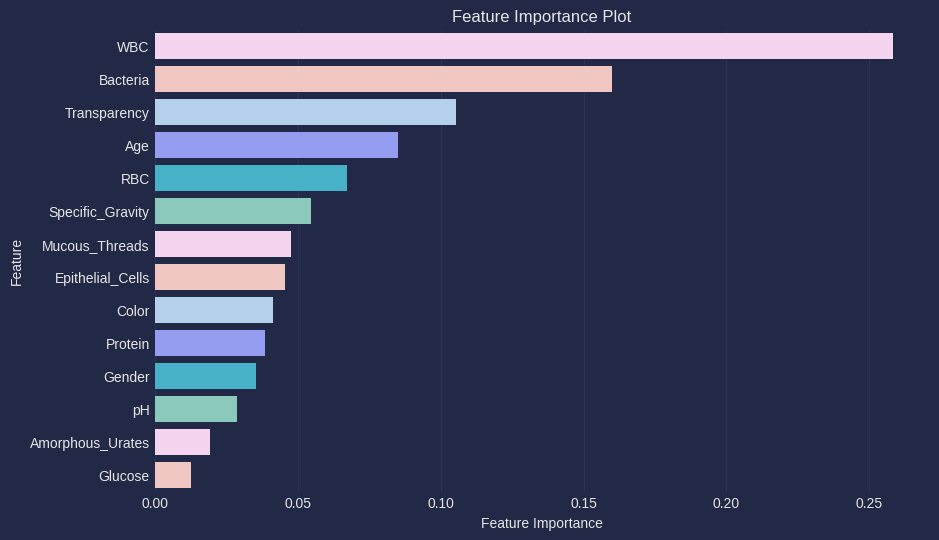

In [ ]:
feature_importances = RFmodel.feature_importances_

df_feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

<ipython-input-16-5986f21d97e2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
<ipython-input-16-5986f21d97e2>:8: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))


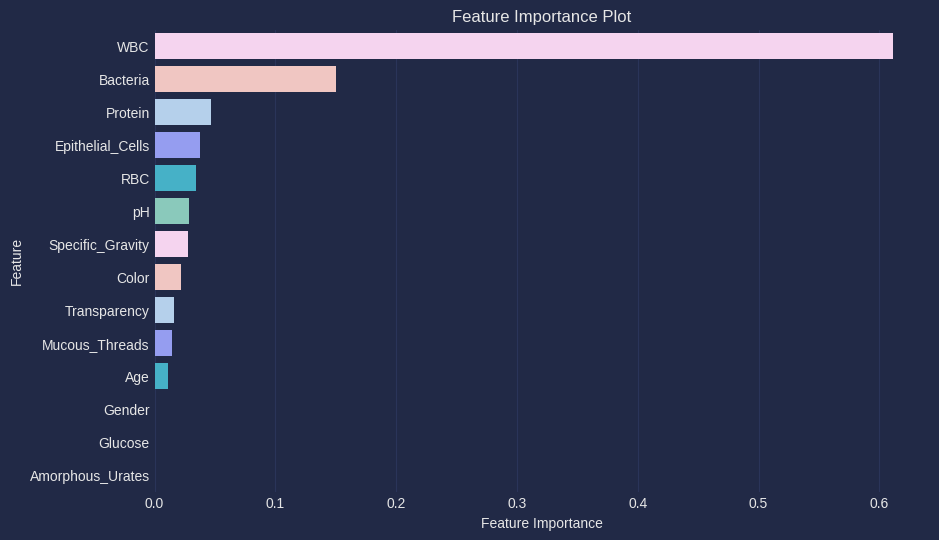

In [ ]:
feature_importances = XGmodel.feature_importances_

df_feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

<ipython-input-17-4b429ea151d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
<ipython-input-17-4b429ea151d9>:8: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))


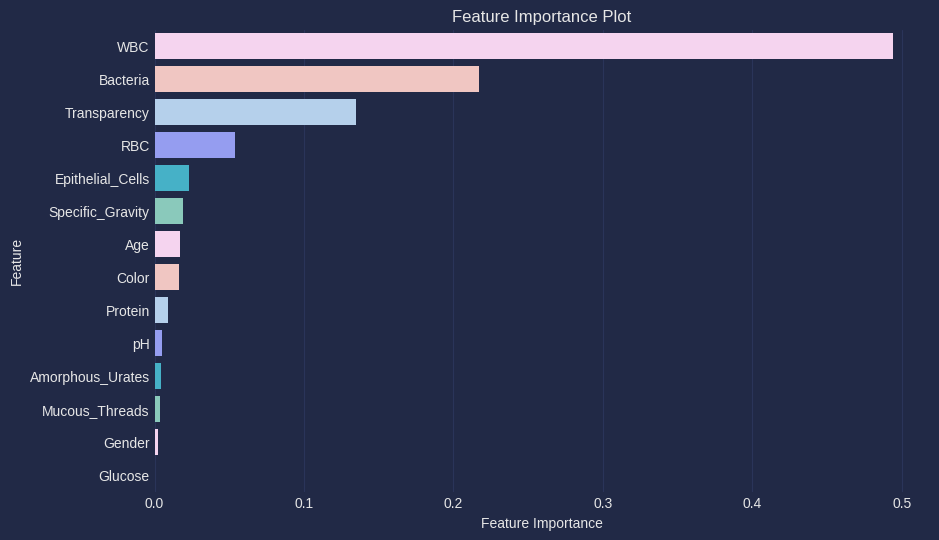

In [ ]:
feature_importances = GBmodel.feature_importances_

df_feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

<ipython-input-14-68e361a336d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
<ipython-input-14-68e361a336d8>:8: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))


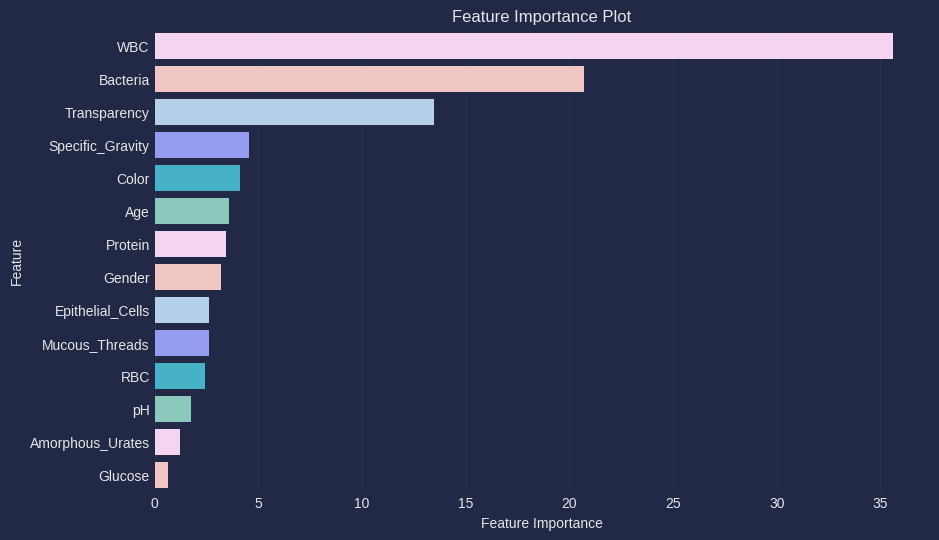

In [ ]:
feature_importances = CBmodel.feature_importances_

df_feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances, palette=sns.blend_palette(vapeplot.palette('mallsoft')))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## Hard Voting vs Soft Voting

In [ ]:
classifiers = [
    ('random_forest', RandomForestClassifier(
      class_weight={0: 1, 1: 3},
      random_state=42,
      n_estimators=80,
      max_depth=20,
      min_samples_split=5,
      min_samples_leaf=1,
      max_features='sqrt')),
    ('xgboost', XGBClassifier(
      objective='binary:logistic',
      random_state=42,
      reg_alpha=0.3069059937405213,
      n_estimators=700,
      max_depth=6,
      learning_rate=0.0009902885160053942,
      gamma=0.08145843854983292,
      reg_lambda=1.6551035395467457,
      alpha=1.499811272697868)),
    ('gradient_boosting', GradientBoostingClassifier(
      n_estimators=59,
      learning_rate=0.00942960365477529,
      max_depth=4,
      min_samples_split=13,
      min_samples_leaf=4,
      subsample=0.9662391695759919,
      max_features=0.6489569238642884)),
    ('catboost', CatBoostClassifier(
    iterations=42,
    depth=6,
    learning_rate=0.015592556206349632,
    l2_leaf_reg=0.025419689599191234,
    border_count=160,
    random_state=42))
]

In [ ]:
voting_hard = VotingClassifier(estimators=classifiers, voting='hard')
voting_hard.fit(x_train, y_train)

y_pred_train = voting_hard.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = voting_hard.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

0:	learn: 0.6828472	total: 764us	remaining: 31.3ms
1:	learn: 0.6745491	total: 2.05ms	remaining: 41.1ms
2:	learn: 0.6663776	total: 2.6ms	remaining: 33.9ms
3:	learn: 0.6584055	total: 3.28ms	remaining: 31.2ms
4:	learn: 0.6504114	total: 4.1ms	remaining: 30.3ms
5:	learn: 0.6420009	total: 4.9ms	remaining: 29.4ms
6:	learn: 0.6353680	total: 5.67ms	remaining: 28.4ms
7:	learn: 0.6275593	total: 6.46ms	remaining: 27.4ms
8:	learn: 0.6194795	total: 7.26ms	remaining: 26.6ms
9:	learn: 0.6124311	total: 8.03ms	remaining: 25.7ms
10:	learn: 0.6053798	total: 8.79ms	remaining: 24.8ms
11:	learn: 0.6004631	total: 9.44ms	remaining: 23.6ms
12:	learn: 0.5934587	total: 10.2ms	remaining: 22.8ms
13:	learn: 0.5864471	total: 11ms	remaining: 22ms
14:	learn: 0.5799341	total: 11.8ms	remaining: 21.2ms
15:	learn: 0.5734579	total: 12.6ms	remaining: 20.4ms
16:	learn: 0.5667294	total: 13.4ms	remaining: 19.6ms
17:	learn: 0.5614595	total: 13.9ms	remaining: 18.5ms
18:	learn: 0.5549158	total: 14.7ms	remaining: 17.7ms
19:	learn: 

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8087478559176672

In [ ]:
voting_soft = VotingClassifier(estimators=classifiers, voting='soft')
voting_soft.fit(x_train, y_train)

y_pred_train = voting_soft.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = voting_soft.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

0:	learn: 0.6828472	total: 648us	remaining: 26.6ms
1:	learn: 0.6745491	total: 1.23ms	remaining: 24.7ms
2:	learn: 0.6663776	total: 1.87ms	remaining: 24.3ms
3:	learn: 0.6584055	total: 2.48ms	remaining: 23.6ms
4:	learn: 0.6504114	total: 3.13ms	remaining: 23.1ms
5:	learn: 0.6420009	total: 3.69ms	remaining: 22.1ms
6:	learn: 0.6353680	total: 4.47ms	remaining: 22.3ms
7:	learn: 0.6275593	total: 5.26ms	remaining: 22.3ms
8:	learn: 0.6194795	total: 6.05ms	remaining: 22.2ms
9:	learn: 0.6124311	total: 6.82ms	remaining: 21.8ms
10:	learn: 0.6053798	total: 7.6ms	remaining: 21.4ms
11:	learn: 0.6004631	total: 8.23ms	remaining: 20.6ms
12:	learn: 0.5934587	total: 8.99ms	remaining: 20.1ms
13:	learn: 0.5864471	total: 9.77ms	remaining: 19.5ms
14:	learn: 0.5799341	total: 10.5ms	remaining: 19ms
15:	learn: 0.5734579	total: 11.4ms	remaining: 18.5ms
16:	learn: 0.5667294	total: 12.2ms	remaining: 17.9ms
17:	learn: 0.5614595	total: 12.7ms	remaining: 17ms
18:	learn: 0.5549158	total: 13.5ms	remaining: 16.4ms
19:	learn

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8087478559176672